# Import Data dan Package

In [1]:
from cleaning import clean
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
raw_data = pd.read_csv("GooglePlaystore_ALL.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (2,3,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
raw_data.drop(columns = ['Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Last Updated', 'Minimum Version', 'Latest Version'])

App Name            Category  \
0                                DoorDash - Food Delivery      FOOD_AND_DRINK   
1       TripAdvisor Hotels Flights Restaurants Attract...    TRAVEL_AND_LOCAL   
2                                                  Peapod            SHOPPING   
3                         foodpanda - Local Food Delivery      FOOD_AND_DRINK   
4                               My CookBook Pro (Ad Free)      FOOD_AND_DRINK   
...                                                   ...                 ...   
267047                               Community Healthplex  HEALTH_AND_FITNESS   
267048                                Pet ads: Buy & Sell            BUSINESS   
267049                      Collectors Market: Buy & Sell            BUSINESS   
267050                             Car Market, Buy & Sell            BUSINESS   
267051                          Selfie with Ariana Grande         PHOTOGRAPHY   

             Rating      Reviews      Installs                Size  Price  \
0       4.548561573       305034    5,000,000+  Varies with device      0   
1       4.400671482  1.20792e+06  100,000,000+  Varies with device      0   
2       3.656329393         1967      100,000+                1.4M      0   
3       4.107232571       389154   10,000,000+                 16M      0   
4       4.647752285         2291       10,000+  Varies with device  $5.99   
...             ...          ...           ...                 ...    ...   
267047            5            1          100+                4.2M      0   
267048          2.6            5          500+                8.4M      0   
267049      3.28571            7        1,000+                7.9M      0   
267050            5            1        1,000+                8.2M      0   
267051      4.61111           18        1,000+                7.8M      0   

       Content Rating  
0            Everyone  
1            Everyone  
2            Everyone  
3            Everyone  
4            Everyone  
...               ...  
267047       Everyone  
267048       Everyone  
267049       Everyone  
267050       Everyone  
267051       Everyone  

[267052 rows x 8 columns]

In [4]:
raw_data.replace({'Size': {'Varies with device': '0'}},inplace=True)

In [5]:
raw_data.replace({'Size': {',': ''}},inplace=True)
raw_data.replace({'Rating': {',': '.'}},inplace=True)
#raw_data.replace({'Size': {',': ''}},inplace=True)

In [6]:
df = clean(raw_data)

ValueError: could not convert string to float: '1,015'

In [6]:
df.head(40)

age_rating  app_rating                                           category  \
0          4+         5.0        \n                  Books\n                   
1          4+         4.7    \n                  Education\n                   
2          4+         1.0  \n                  Entertainment\n           ...   
3          4+         2.0      \n                  Finance\n                   
4          4+         1.0     \n                  Business\n                   
5          4+         1.0  \n                  Food & Drink\n            ...   
6         17+         4.4        \n                  Games\n                   
7          4+         2.0  \n                  Health & Fitness\n        ...   
8          4+         4.3    \n                  Lifestyle\n                   
9          4+         4.2         \n                  News\n                   
10        17+         3.0      \n                  Medical\n                   
11         4+         0.0        \n                  Music\n                   
12         4+         5.0   \n                  Navigation\n                   
13         4+         4.4         \n                  News\n                   
14        12+         4.5  \n                  Photo & Video\n           ...   
15        17+         5.0  \n                  Productivity\n            ...   
16         4+         3.0    \n                  Reference\n                   
17         4+         5.0    \n                  Reference\n                   
18        12+         5.0    \n                  Reference\n                   
19         4+         4.0    \n                  Reference\n                   
20        17+         3.4    \n                  Reference\n                   
21         4+         4.1    \n                  Reference\n                   
22         4+         1.0    \n                  Reference\n                   
23         4+         4.7    \n                  Reference\n                   
24         9+         3.8    \n                  Reference\n                   
25         4+         3.7    \n                  Reference\n                   
26         4+         4.4    \n                  Reference\n                   
27         4+         4.8    \n                  Reference\n                   
28         4+         3.0    \n                  Reference\n                   
29         4+         4.7    \n                  Reference\n                   
30         4+         3.7    \n                  Reference\n                   
31         4+         1.0    \n                  Reference\n                   
32        17+         1.0    \n                  Reference\n                   
33         4+         3.0    \n                  Reference\n                   
34         4+         0.0    \n                  Reference\n                   
35         4+         4.2    \n                  Reference\n                   
36         4+         3.7    \n                  Reference\n                   
37         4+         5.0    \n                  Reference\n                   
38         4+         5.0    \n                  Reference\n                   
39         4+         4.7    \n                  Reference\n                   

                                        compatibility  \
0   Requires iOS 9.0 or later. Compatible with iPh...   
1   Requires iOS 8.0 or later. Compatible with iPh...   
2   Requires iOS 7.1 or later. Compatible with iPh...   
3   Requires iOS 9.2 or later. Compatible with iPh...   
4   Requires iOS 11.0 or later. Compatible with iP...   
5   Requires iOS 12.0 or later. Compatible with iP...   
6   Requires iOS 5.1.1 or later. Compatible with i...   
7   Requires iOS 8.0 or later. Compatible with iPh...   
8   Requires iOS 11.0 or later. Compatible with iP...   
9   Requires iOS 9.0 or later. Compatible with iPh...   
10  Requires iOS 9.0 or later. Compatible with iPh...   
11  Requires iOS 9.0 or later. Compati

In [5]:
df['price'] = df['price'].apply(lambda x:x.replace('$', ' '))

In [6]:
df["category"] = df["category"].astype(str)
df["category"] = df["category"].apply(lambda x:x.replace('\n', ""))


In [7]:
df['age_rating'] = df['age_rating'].apply(lambda x:x.replace("\d+",x)[0])

In [8]:
df['size'] = df['size'].astype(float)

In [9]:
df['price'] = df['price'].apply(lambda x:x.replace(',', ''))
df['price']= df['price'].apply(float)

In [6]:
raw_data.Category.unique()

array(['FOOD_AND_DRINK', 'TRAVEL_AND_LOCAL', 'SHOPPING', 'LIFESTYLE',
       'GAME_ACTION', 'GAME_CASUAL', 'GAME_ROLE_PLAYING', 'GAME_PUZZLE',
       'GAME_RACING', 'GAME_ADVENTURE', 'GAME_ARCADE', 'GAME_STRATEGY',
       'GAME_SPORTS', 'GAME_SIMULATION', 'GAME_MUSIC', 'MUSIC_AND_AUDIO',
       'FINANCE', 'EVENTS', 'ENTERTAINMENT', 'EDUCATION',
       'GAME_EDUCATIONAL', 'BOOKS_AND_REFERENCE', 'NEWS_AND_MAGAZINES',
       'PHOTOGRAPHY', 'VIDEO_PLAYERS', 'GAME_WORD', 'ART_AND_DESIGN',
       'GAME_TRIVIA', 'GAME_BOARD', 'BUSINESS', 'PRODUCTIVITY',
       'COMMUNICATION', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME', 'SOCIAL',
       'BEAUTY', 'GAME_CASINO', 'MAPS_AND_NAVIGATION', 'PERSONALIZATION',
       'GAME_CARD', 'TOOLS', 'SPORTS', 'AUTO_AND_VEHICLES',
       'LIBRARIES_AND_DEMO', 'COMICS', 'PARENTING', 'DATING', 'WEATHER',
       'MEDICAL', ' Podcasts', ')', ' Channel 2 News', nan,
       ' Breaking News', '6', 'Gate ALARM', ' Alfabe �?ren',
       ' T�rk Alfabesi', ' not notified you f

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267052 entries, 0 to 267051
Data columns (total 15 columns):
App Name           267051 non-null object
Category           267051 non-null object
Rating             267052 non-null object
Reviews            267051 non-null object
Installs           267052 non-null object
Size               267052 non-null object
Price              267052 non-null object
Content Rating     267052 non-null object
Last Updated       267052 non-null object
Minimum Version    267051 non-null object
Latest Version     267049 non-null object
Unnamed: 11        18 non-null object
Unnamed: 12        3 non-null object
Unnamed: 13        2 non-null object
Unnamed: 14        1 non-null float64
dtypes: float64(1), object(14)
memory usage: 30.6+ MB


# Pengecekan Distribusi Data

In [11]:
df.cov()

app_rating        price          rank  rating_count  \
app_rating         0.613755     0.027078 -5.850923e+00  4.262220e+04   
price              0.027078     1.232754 -6.980117e+00 -6.316178e+03   
rank              -5.850923    -6.980117  3.268128e+03 -7.066057e+06   
rating_count   42622.201905 -6316.178123 -7.066057e+06  1.930511e+11   
size              15.647308     3.721630 -9.412545e+02  4.795939e+06   
num_languages      0.679173     0.075188 -7.324297e+01  5.627699e+05   
boolean_rank       0.064430     0.033148  0.000000e+00  2.973637e+04   
free_or_not        0.000000     0.000000  0.000000e+00  0.000000e+00   

                       size  num_languages  boolean_rank  free_or_not  
app_rating     1.564731e+01       0.679173      0.064430          0.0  
price          3.721630e+00       0.075188      0.033148          0.0  
rank          -9.412545e+02     -73.242974      0.000000          0.0  
rating_count   4.795939e+06  562769.908604  29736.365133          0.0  
size           1.076532e+04     145.996642      8.866814          0.0  
num_languages  1.459966e+02     117.122838      0.452151          0.0  
boolean_rank   8.866814e+00       0.452151      0.241159          0.0  
free_or_not    0.000000e+00       0.000000      0.000000          0.0

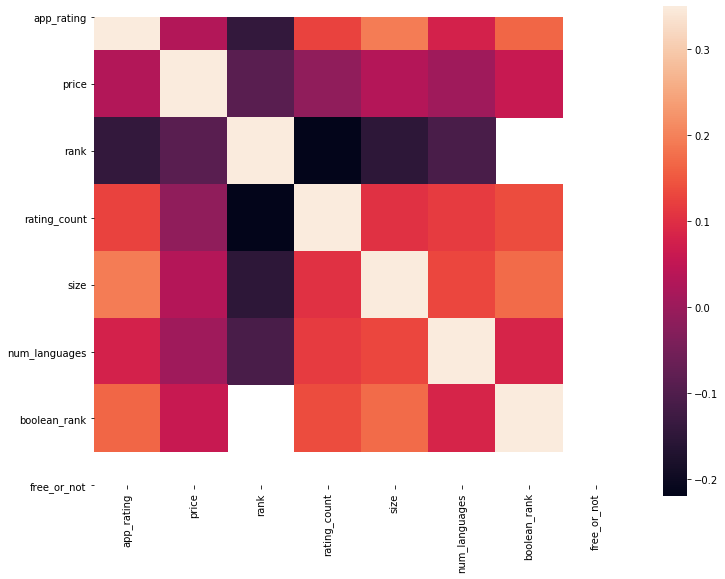

In [12]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=0.35, square=True);

In [13]:
df.corr()

app_rating     price      rank  rating_count      size  \
app_rating       1.000000  0.031130 -0.142907      0.126425  0.192499   
price            0.031130  1.000000 -0.086716     -0.012938  0.032306   
rank            -0.142907 -0.086716  1.000000     -0.219392 -0.150744   
rating_count     0.126425 -0.012938 -0.219392      1.000000  0.105184   
size             0.192499  0.032306 -0.150744      0.105184  1.000000   
num_languages    0.080106  0.006257 -0.108681      0.118583  0.130020   
boolean_rank     0.167470  0.060794       NaN      0.137853  0.174021   
free_or_not           NaN       NaN       NaN           NaN       NaN   

               num_languages  boolean_rank  free_or_not  
app_rating          0.080106      0.167470          NaN  
price               0.006257      0.060794          NaN  
rank               -0.108681           NaN          NaN  
rating_count        0.118583      0.137853          NaN  
size                0.130020      0.174021          NaN  
num_languages       1.000000      0.085077          NaN  
boolean_rank        0.085077      1.000000          NaN  
free_or_not              NaN           NaN          NaN

Text(0.5, 1.0, 'Total app in each category')

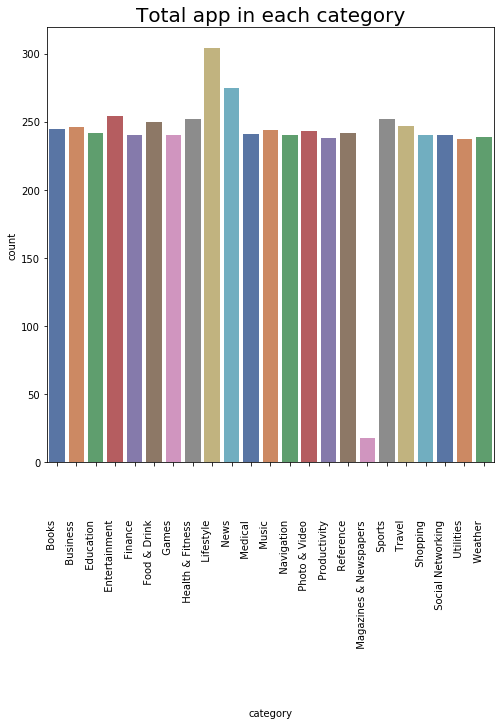

In [14]:
#distribution of app each category
plt.figure(figsize=(8,8))
g = sns.countplot(x="category",data=df, palette = "deep")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")

plt.title('Total app in each category',size = 20)

Text(0.5, 1.0, 'Total app in each price category')

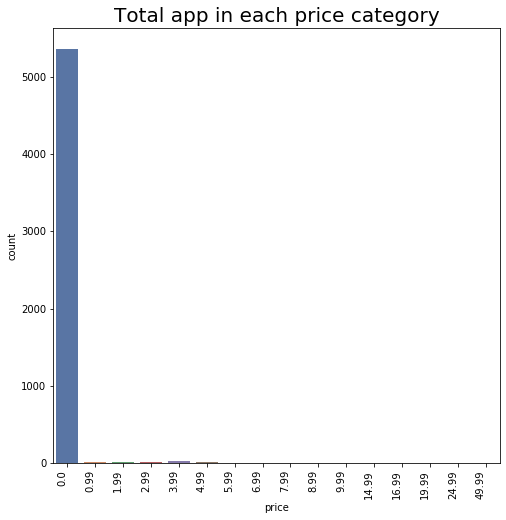

In [15]:
#distribution of app prices each category
plt.figure(figsize=(8,8))
g = sns.countplot(x="price",data=df, palette = "deep")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Total app in each price category',size = 20)

Text(0.5, 0, 'Size (MB)')

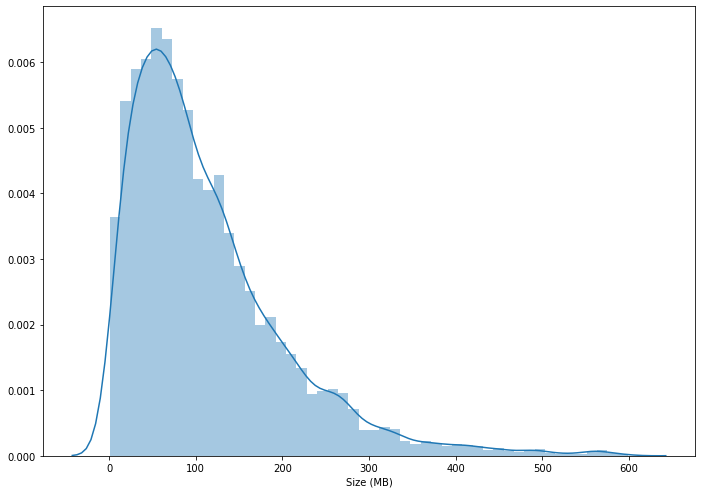

In [16]:
#distribution of apps size in the apps store.
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.distplot(df[df['size']<600]['size']).set_xlabel('Size (MB)')


(0, 500)

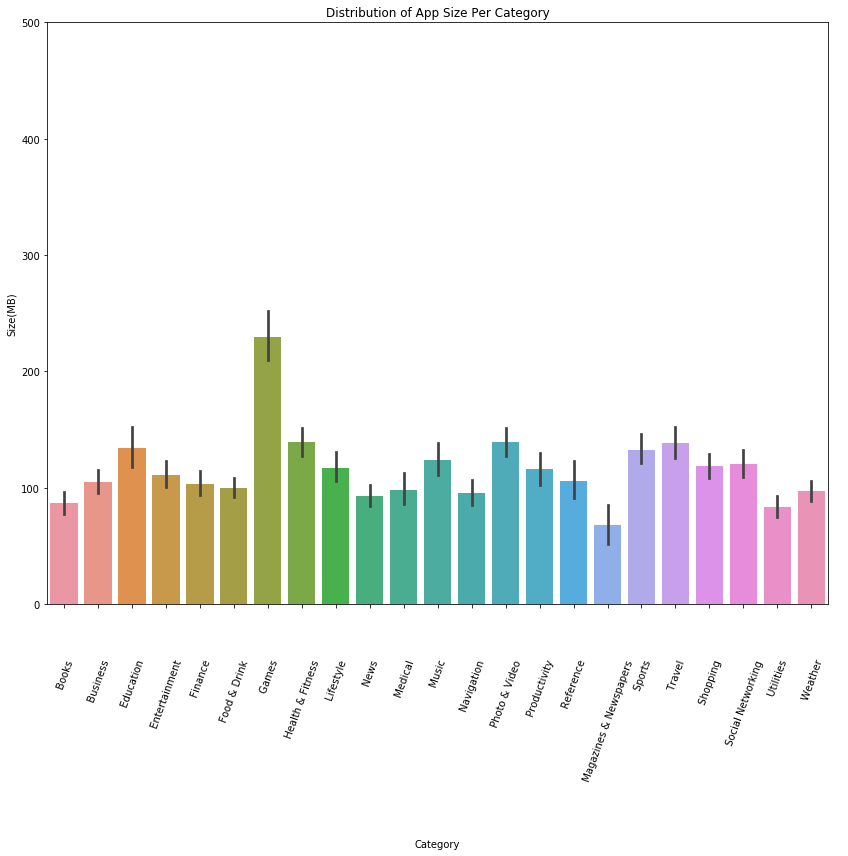

In [17]:
#distribution of apps size per category.

a4_dims = (14, 10.7)
fig, ax = pyplot.subplots(figsize=a4_dims)
plot =sns.barplot(data = df, x ='category',y='size',ax = ax )

plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Distribution of App Size Per Category')
ax.set_ylabel('Size(MB)')
ax.set_xlabel('Category')
plt.ylim(0,500)


(0, 100000)

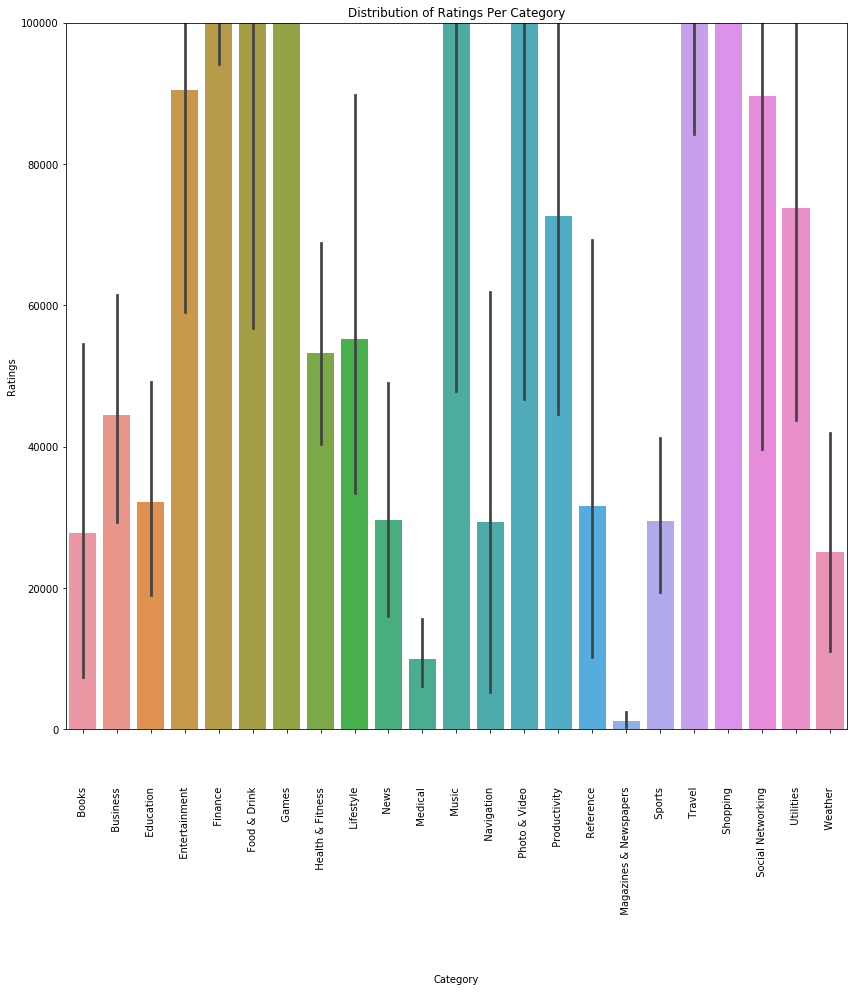

In [18]:
a4_dims = (14, 13)
fig, ax = pyplot.subplots(figsize=a4_dims)
plot =sns.barplot(data = df[df['rating_count']!=0], x ='category',y='rating_count',ax = ax )

plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Distribution of Ratings Per Category')
ax.set_ylabel('Ratings')
ax.set_xlabel('Category')
plt.ylim(0,100000)



In [19]:
df['free_or_not']=df['price']== 0

Text(336.9714285714286, 0.5, 'App Rating')

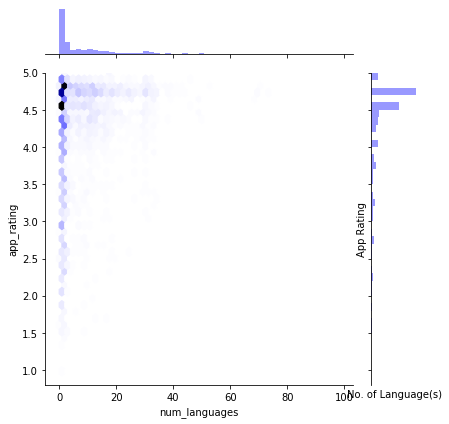

In [20]:

sns.jointplot('num_languages','app_rating',data=df,kind ="hex",space=0.4,color="blue")
plt.ylim(0.8,5)
plt.xlabel("No. of Language(s)")
plt.ylabel("App Rating")


In [21]:
app_rating_per_age= df.groupby('age_rating').agg({'app_rating':'mean'}).reset_index().sort_values(by='app_rating')

In [22]:
app_rating_per_age

age_rating  app_rating
1          4    4.182837
0          1    4.240716
2          9    4.307200

In [23]:
df.groupby('age_rating').agg({'rating_count':'sum'})

rating_count
age_rating              
1            166593757.0
4            277252177.0
9              7925427.0

In [24]:
avg_app_rating_df =df.groupby('category').agg({'app_rating':'mean'}).sort_values(by='app_rating').reset_index()

In [25]:
avg_app_rating_df.head(5)

category  app_rating
0                    Magazines & Newspapers      ...    3.855556
1                            Weather                    3.917155
2                         Navigation                    3.983750
3                             Sports                    4.008730
4                           Business                    4.017073

Text(0.5, 0, 'Category')

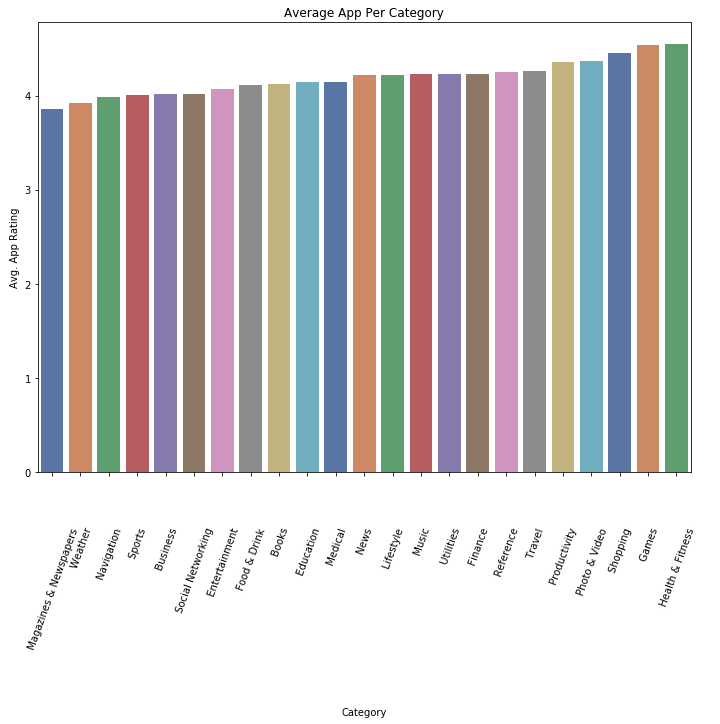

In [26]:
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data=avg_app_rating_df, y='app_rating',x='category',palette="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=70)
plot.set_title('Average App Per Category')
ax.set_ylabel('Avg. App Rating')
ax.set_xlabel('Category')

In [27]:
rating_count_per_age =df.sort_values(by='rating_count', ascending =False).groupby('age_rating').agg({'rating_count':'sum'}).reset_index() #the most ratings

In [28]:
rating_count_per_age

age_rating  rating_count
0          1   166593757.0
1          4   277252177.0
2          9     7925427.0

Text(0.5, 0, 'Age Rating')

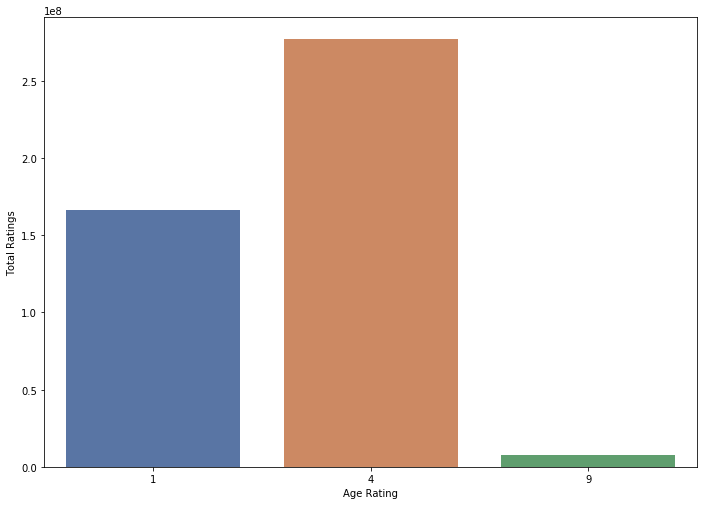

In [29]:
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(data= rating_count_per_age,x ='age_rating',y='rating_count',palette="deep")
plot.set_title('Total Ratings per Age Rating')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Age Rating')


In [30]:
df.sort_values(by='rank').groupby('rank')

Text(0.5, 0, 'App Store Rank')

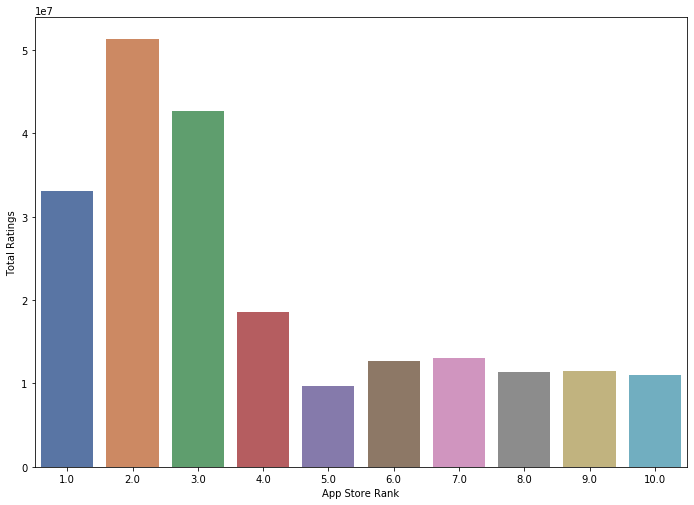

In [31]:
top_ratings_per_rank =df[df['rank']<=10].sort_values('rank').groupby('rank').agg({'rating_count':'sum'}).reset_index()
a2_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(data =top_ratings_per_rank,x='rank',y='rating_count',palette="deep")
plot.set_title('Total Ratings of Top 10 Ranked Apps')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('App Store Rank')






#apps with a top 5 rank

In [32]:
df.assign(free_boolean =df['price']=='Free').head(5)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


age_rating  app_rating                                         category  \
0          4         4.3                            Books                   
1          4         4.1                         Business                   
2          4         2.3                        Education                   
3          4         3.4                    Entertainment                   
4          4         3.6                          Finance                   

                                       compatibility  \
0  Requires iOS 6.0 or later. Compatible with iPh...   
1  Requires iOS 7.0 or later. Compatible with iPh...   
2  Requires iOS 8.0 or later. Compatible with iPh...   
3  Requires iOS 6.0 or later. Compatible with iPh...   
4  Requires iOS 8.0 or later. Compatible with iPh...   

                                           languages  \
0                                            English   
1                                            English   
2                                  English, Japanese   
3  English, Chinese, French, German, Italian, Jap...   
4  English, French, German, Italian, Portuguese, ...   

                                            name  price  rank  rating_count  \
0  القران الكريم | ماهر المعيقلي | المصحف الشريف    0.0   NaN          93.0   
1                                    TimeStation    0.0   NaN         282.0   
2                                Tadpoles Parent    0.0   NaN         299.0   
3                             Air Horn LOUD Free    0.0   NaN          65.0   
4                 Mortgage Calculator for iPhone    0.0   NaN         149.0   

   size  num_languages  boolean_rank  free_or_not  free_boolean  
0  21.9              1         False         True         False  
1   5.5              1         False         True         False  
2  52.4              2         False         True         False  
3  10.1              9         False         True         False  
4   6.3              7         False         True         False

In [33]:
rating_count_df= df.groupby('category').agg({'rating_count':'sum'}).reset_index().sort_values('rating_count',ascending =False)

In [34]:
rating_count_df

category  rating_count
6                               Games                    68261238.0
4                             Finance                    39830296.0
14                      Photo & Video                    39544877.0
20                             Travel                    36796184.0
17                           Shopping                    34088276.0
11                              Music                    32164603.0
5                        Food & Drink                    27878666.0
3                       Entertainment                    22808882.0
18                    Social Networking           ...    21428450.0
21                          Utilities                    17466603.0
15                       Productivity                    17301746.0
8                           Lifestyle                    16769442.0
7                     Health & Fitness            ...    13405357.0
1                            Business                    10934736.0
13                               News                     8114101.0
2                           Education                     7766795.0
16                          Reference                     7637684.0
19                             Sports                     7328484.0
12                         Navigation                     7046780.0
0                               Books                     6780350.0
22                            Weather                     5982646.0
10                            Medical                     2413972.0
9                     Magazines & Newspapers      ...       21193.0

Text(0.5, 0, 'Category')

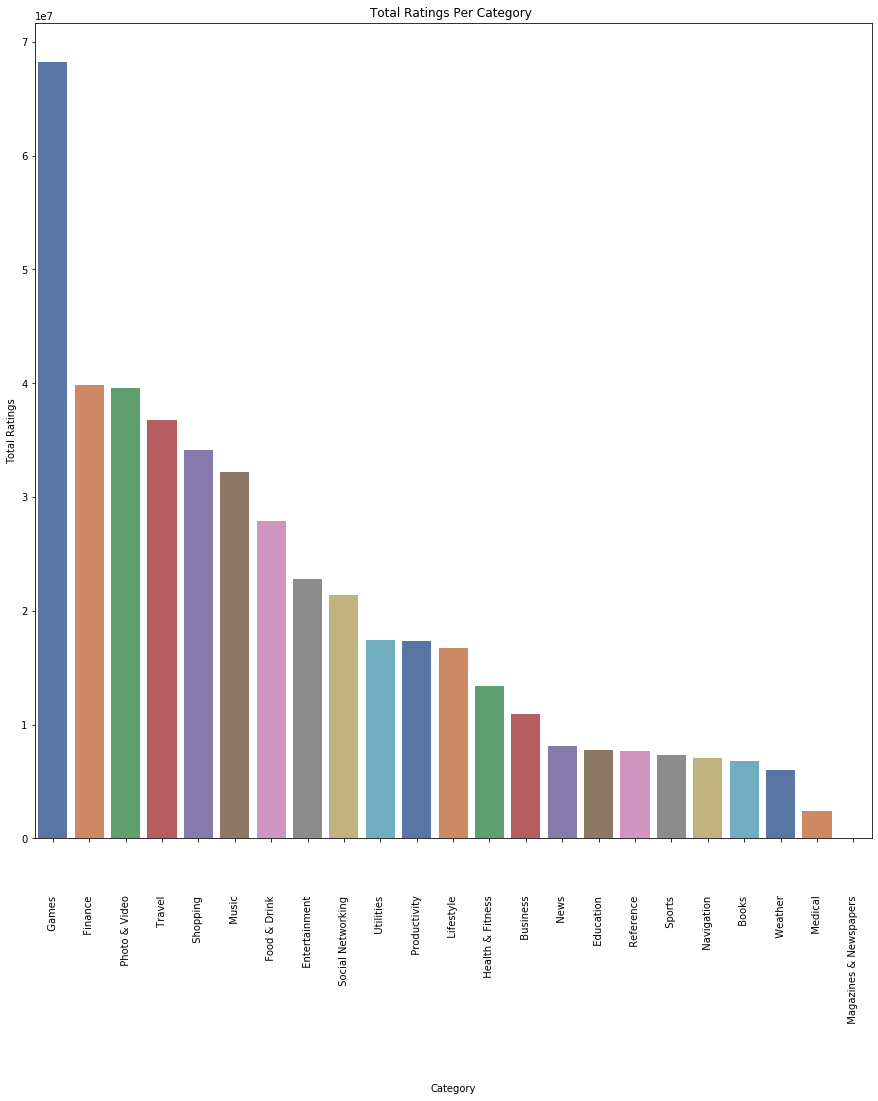

In [35]:
#Most Ratings Per Category


a2_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot= sns.barplot(x="category", y="rating_count", data=rating_count_df,palette ="deep")
plot.set_xticklabels(ax.get_xticklabels(),rotation=90)
plot.set_title('Total Ratings Per Category ')
ax.set_ylabel('Total Ratings')
ax.set_xlabel('Category')


(10, 650000)

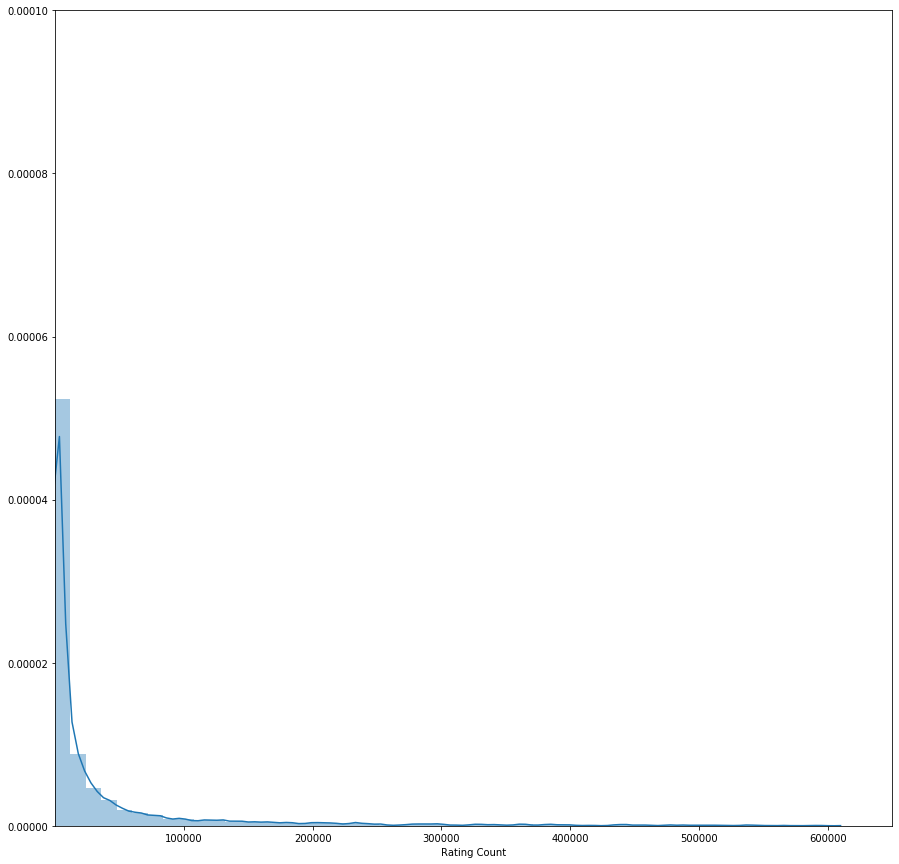

In [36]:
#Density of Rating Count

a2_dims = (15, 15)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.distplot(df[(df['rating_count']!=0)& (df['rating_count']< 600000)]['rating_count']).set_xlabel('rating count')

ax.set_xlabel('Rating Count')
plt.ylim(0,0.0001)
plt.xlim(10,650000)



In [37]:
df.head(25)

age_rating  app_rating                                           category  \
0           4         4.3                              Books                   
1           4         4.1                           Business                   
2           4         2.3                          Education                   
3           4         3.4                      Entertainment                   
4           4         3.6                            Finance                   
5           4         4.8                       Food & Drink                   
6           1         4.5                              Games                   
7           4         4.5                    Health & Fitness            ...   
8           4         3.2                          Lifestyle                   
9           1         4.5                               News                   
10          1         4.7                            Medical                   
11          1         4.7                              Music                   
12          4         4.6                         Navigation                   
13          1         3.0                               News                   
14          4         4.1                      Photo & Video                   
15          1         4.6                       Productivity                   
16          4         3.5                          Reference                   
17          4         3.8                          Reference                   
18          1         3.1                          Reference                   
19          4         3.9                          Reference                   
20          4         3.9                          Reference                   
21          4         4.8                          Reference                   
22          4         4.5                          Reference                   
23          4         2.3                          Reference                   
24          4         4.4                          Reference                   

                                        compatibility  \
0   Requires iOS 6.0 or later. Compatible with iPh...   
1   Requires iOS 7.0 or later. Compatible with iPh...   
2   Requires iOS 8.0 or later. Compatible with iPh...   
3   Requires iOS 6.0 or later. Compatible with iPh...   
4   Requires iOS 8.0 or later. Compatible with iPh...   
5   Requires iOS 11.0 or later. Compatible with iP...   
6   Requires iOS 9.0 or later. Compatible with iPh...   
7   Requires iOS 10.0 or later. Compatible with iP...   
8   Requires iOS 11.0 or later. Compatible with iP...   
9   Requires iOS 10.0 or later. Compatible with iP...   
10  Requires iOS 11.0 or later. Compatible with iP...   
11  Requires iOS 9.0 or later. Compatible with iPh...   
12  Requires iOS 9.3 or later. Compatible with iPh...   
13  Requires iOS 9.0 or later. Compatible with iPh...   
14  Requires iOS 8.0 or later. Compatible with iPh...   
15  Requires iOS 11.0 or later. Compatible with iP...   
16  Requires iOS 9.0 or later. Compatible with iPh...   
17  Requires iOS 10.0 or later. Compatible with iP...   
18  Requires iOS 5.1.1 or later. Compatible with i...   
19  Requires iOS 9.3 or later. Compatible with iPh...   
20  Requires iOS 8.0 or later. Compatible with iPh...   
21  Requires iOS 12.0 or later. Compatible with iP...   
22  Requires iOS 11.2 or later. Compatible with iP...   
23  Requires iOS 10.0 or later. Compatible with iP...   
24  Requires iOS 11.0 or later. Compatible with iP...   

                                            languages  \
0                                             English   
1                                             English   
2                                   English, Japanese   
3   English, Chinese, French, German, Italian, Jap...   
4   English, French, German, Italian, Portuguese, ...   
5                                             English   
6                                       

# TOP PAID AND TOP FREE EDA

## Disini dijabarkan mengenai hasil cross-column antara category dengan rating tertentu untuk mencari pattern pada masing-masing data


In [38]:
df.category.unique()

array(['                  Books                ',
       '                  Business                ',
       '                  Education                ',
       '                  Entertainment                ',
       '                  Finance                ',
       '                  Food & Drink                ',
       '                  Games                ',
       '                  Health & Fitness                ',
       '                  Lifestyle                ',
       '                  News                ',
       '                  Medical                ',
       '                  Music                ',
       '                  Navigation                ',
       '                  Photo & Video                ',
       '                  Productivity                ',
       '                  Reference                ',
       '                  Magazines & Newspapers                ',
       '                  Sports                ',
       '          

In [39]:
df[(df["category"])].astype(float)

KeyError: "None of [Index(['                  Books                ',\n       '                  Business                ',\n       '                  Education                ',\n       '                  Entertainment                ',\n       '                  Finance                ',\n       '                  Food & Drink                ',\n       '                  Games                ',\n       '                  Health & Fitness                ',\n       '                  Lifestyle                ',\n       '                  News                ',\n       ...\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                ',\n       '                  Shopping                '],\n      dtype='object', length=5469)] are in the [columns]"

In [40]:
#Top Paid Games
   
top_paid_games = df[(df["category"] ==        '                  Games                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_games.head(20)


age_rating  app_rating                                 category  \
2540          9         4.4                    Games                   
2444          1         4.8                    Games                   
2368          4         4.7                    Games                   
2480          4         4.1                    Games                   
2411          4         4.2                    Games                   

                                          compatibility  \
2540  Requires iOS 8.0 or later. Compatible with iPh...   
2444  Requires iOS 8.0 or later. Compatible with iPh...   
2368  Requires iOS 8.0 or later. Compatible with iPh...   
2480  Requires iOS 7.0 or later. Compatible with iPh...   
2411  Requires iOS 8.0 or later. Compatible with iPh...   

                                              languages                 name  \
2540  English, French, German, Italian, Japanese, Ko...            Minecraft   
2444                                   English, Spanish            Heads Up!   
2368   English, Dutch, French, German, Italian, Spanish           Tiny Wings   
2480  English, Arabic, French, German, Indonesian, I...  Fruit Ninja Classic   
2411                                            English          Doodle Jump   

      price  rank  rating_count   size  num_languages  boolean_rank  \
2540   6.99   1.0      252600.0  288.6             11          True   
2444   0.99   1.0       79600.0  187.9              2          True   
2368   1.99   5.0        3400.0   29.2              6          True   
2480   1.99  33.0         940.0  114.3             16          True   
2411   0.99  18.0         453.0   61.4              1          True   

      free_or_not  
2540        False  
2444        False  
2368        False  
2480        False  
2411        False

Text(0.5, 0, '')

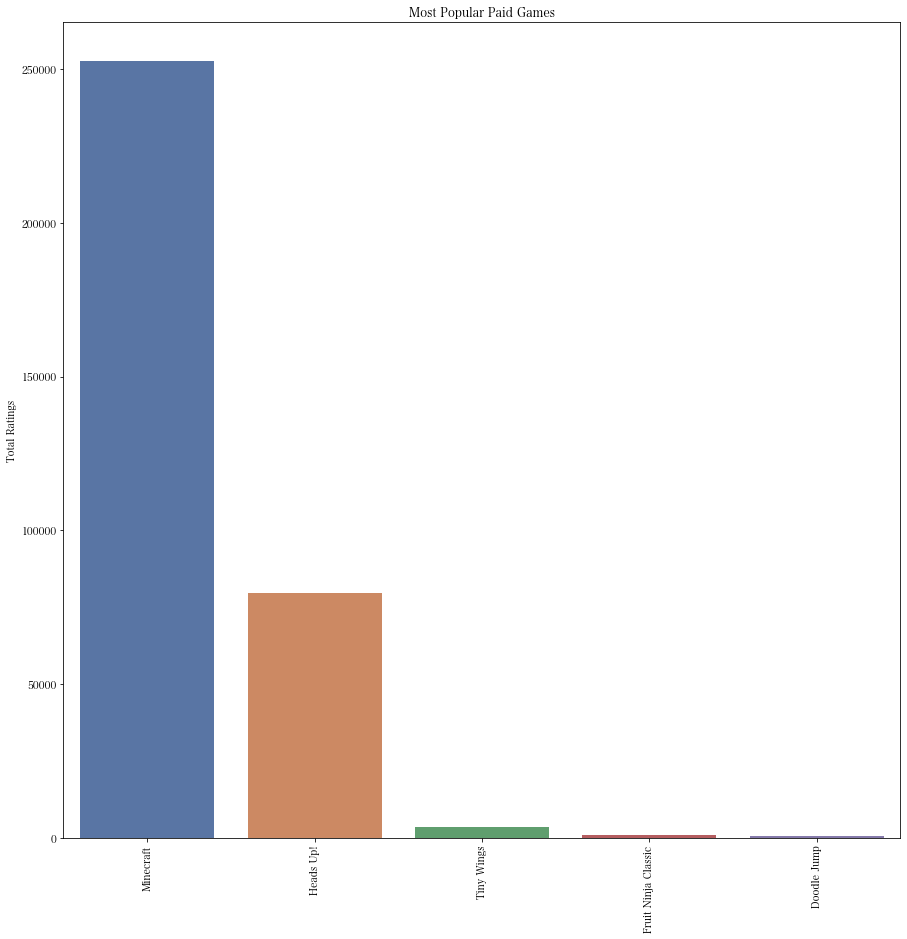

In [41]:
#Top Paid Games

fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_games.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Games')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')


In [42]:
top_free_games = df[(df["category"] ==        '                  Games                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_games.head(5)

age_rating  app_rating                                 category  \
2592          1         4.6                    Games                   
2589          1         4.6                    Games                   
2580          1         4.8                    Games                   
2586          1         4.7                    Games                   
2471          4         4.5                    Games                   

                                          compatibility  \
2592  Requires iOS 11.0 or later. Compatible with iP...   
2589  Requires iOS 8.0 or later. Compatible with iPh...   
2580  Requires iOS 9.0 or later. Compatible with iPh...   
2586  Requires iOS 8.0 or later. Compatible with iPh...   
2471  Requires iOS 9.0 or later. Compatible with iPh...   

                                              languages  \
2592  English, Arabic, French, German, Italian, Japa...   
2589  English, French, German, Indonesian, Italian, ...   
2580                                            English   
2586                                            English   
2471  English, Arabic, French, German, Indonesian, I...   

                               name  price  rank  rating_count   size  \
2592                       Fortnite    0.0   3.0     5000000.0  222.6   
2589                         Roblox    0.0   2.0     1900000.0  187.4   
2580  Sniper 3D: Gun Shooting Games    0.0   9.0     1900000.0  300.6   
2586    Episode - Choose Your Story    0.0   2.0     1700000.0  184.6   
2471                     Golf Clash    0.0  50.0     1600000.0  153.0   

      num_languages  boolean_rank  free_or_not  
2592             14          True         True  
2589             15          True         True  
2580              1          True         True  
2586              1          True         True  
2471             16          True         True

Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8902 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8902 missing from current font.
  font.set_text(s, 0, flags=flags)


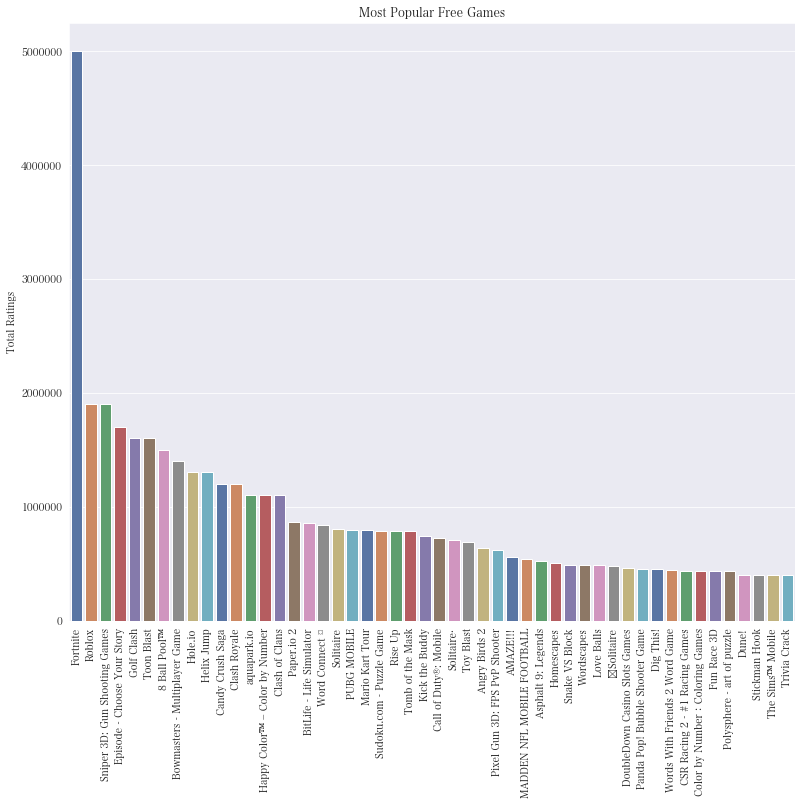

In [43]:
#topfreegames
a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_games.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Games')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [44]:
#top paid books
top_paid_books = df[(df["category"] ==        '                  Books                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_books.head(20)

age_rating  app_rating                                 category  \
3879          4         4.9                    Books                   
3936          4         4.4                    Books                   
3820          4         4.5                    Books                   
3815          4         4.9                    Books                   
3916          4         4.5                    Books                   
3937          1         3.1                    Books                   
3931          1         2.9                    Books                   

                                          compatibility         languages  \
3879  Requires iOS 9.3 or later. Compatible with iPh...  English, Spanish   
3936  Requires iOS 10.0 or later. Compatible with iP...           English   
3820  Requires iOS 10.0 or later. Compatible with iP...           English   
3815  Requires iOS 9.1 or later. Compatible with iPh...           English   
3916  Requires iOS 8.0 or later. Compatible with iPh...           English   
3937  Requires iOS 7.0 or later. Compatible with iPh...           English   
3931  Requires iOS 8.0 or later. Compatible with iPh...           English   

                                                   name  price   rank  \
3879                                          NIV Bible   5.99    5.0   
3936                           Jesus Calling Devotional   9.99    1.0   
3820                          A Charlie Brown Christmas   4.99  113.0   
3815                               Self Help Classics .   4.99   71.0   
3916                          The Monster at the End...   4.99   34.0   
3937  Free Books - 23,469 Classics For Less Than A C...   0.99  135.0   
3931        Audiobooks - 5,239 Classics Ready to Listen   1.99  136.0   

      rating_count   size  num_languages  boolean_rank  free_or_not  
3879        2800.0  114.7              2          True        False  
3936         465.0  168.4              1          True        False  
3820         228.0  149.7              1          True        False  
3815          87.0   53.6              1          True        False  
3916          43.0  216.7              1          True        False  
3937          41.0   75.1              1          True        False  
3931          10.0  118.9              1          True        False

Text(0.5, 0, '')

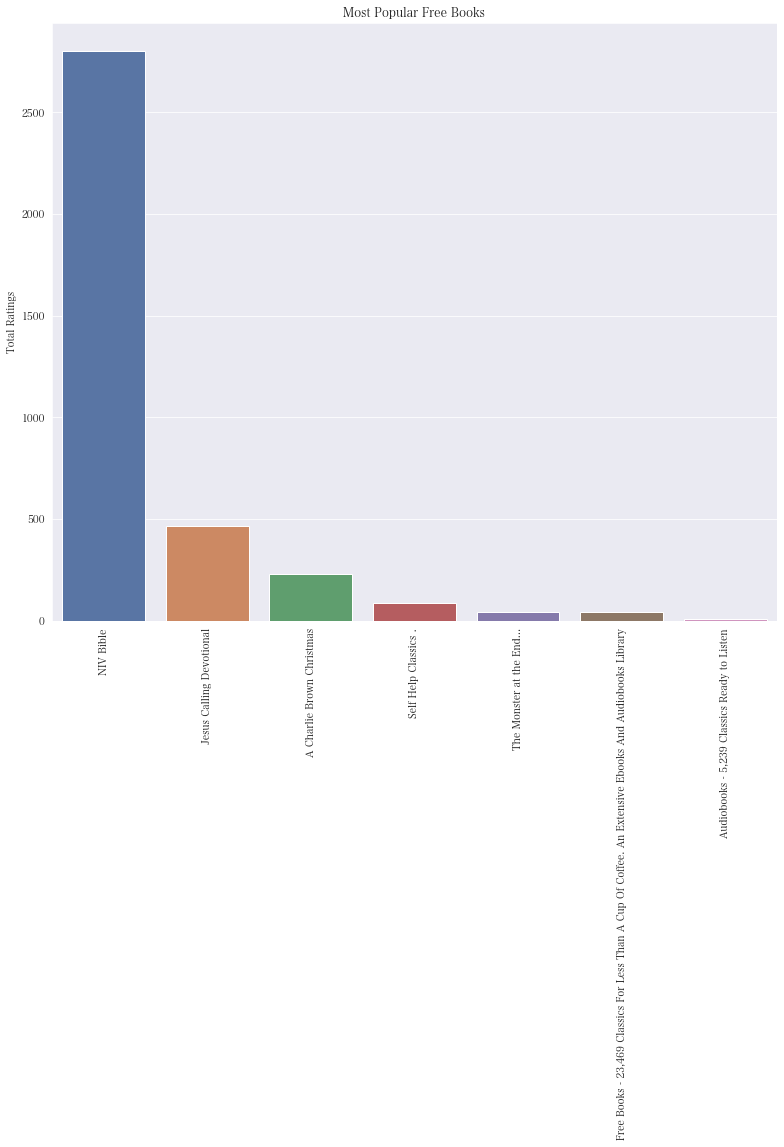

In [45]:
#top paid books
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_books.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Books')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [46]:
#top free books
top_free_books = df[(df["category"] ==        '                  Books                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_books.head(5)

age_rating  app_rating                                 category  \
4031          4         4.9                    Books                   
4032          4         4.8                    Books                   
4024          4         4.8                    Books                   
4028          4         4.8                    Books                   
4033          1         4.7                    Books                   

                                          compatibility  \
4031  Requires iOS 12.0 and watchOS 5.0 or later. Co...   
4032  Requires iOS 12.0 or later. Compatible with iP...   
4024  Requires iOS 9.0 or later. Compatible with iPh...   
4028  Requires iOS 11.0 or later. Compatible with iP...   
4033  Requires iOS 10.0 or later. Compatible with iP...   

                                              languages  \
4031  English, French, German, Italian, Japanese, Sp...   
4032  English, Dutch, French, German, Italian, Japan...   
4024                                            English   
4028                                   English, Italian   
4033  English, Arabic, Czech, Danish, Dutch, Filipin...   

                                name  price  rank  rating_count   size  \
4031  Audible audiobooks & originals    0.0   2.0     2500000.0   96.8   
4032                   Amazon Kindle    0.0   3.0     1700000.0  135.8   
4024             Libby, by OverDrive    0.0   6.0      698400.0   18.1   
4028         Goodreads: Book Reviews    0.0   8.0      329200.0  101.5   
4033                         Wattpad    0.0   5.0      297900.0  156.5   

      num_languages  boolean_rank  free_or_not  
4031              6          True         True  
4032             10          True         True  
4024              1          True         True  
4028              2          True         True  
4033             26          True         True

Text(0.5, 0, '')

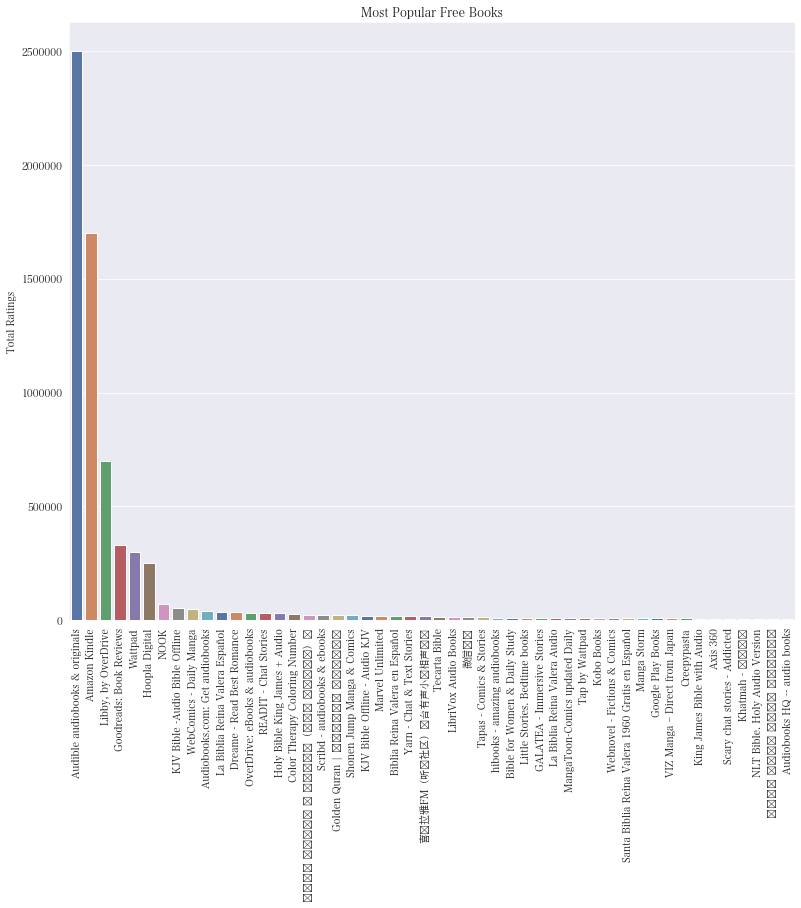

In [48]:
#top free books
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_books.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 8})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Books')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [49]:
#top paid social network

top_paid_social_network = df[(df["category"] ==        '                  Social Networking                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_social_network.head(5)

age_rating  app_rating  \
5071          1         4.5   
5009          4         3.0   
5041          4         4.1   

                                               category  \
5071                    Social Networking           ...   
5009                    Social Networking           ...   
5041                    Social Networking           ...   

                                          compatibility  \
5071  Requires iOS 9.0 or later. Compatible with iPh...   
5009   Requires iOS 5.0 or later. Compatible with iPad.   
5041  Requires iOS 7.1 or later. Compatible with iPh...   

                                              languages  \
5071  English, Czech, Dutch, French, German, Hungari...   
5009  English, Chinese, Dutch, French, German, Itali...   
5041  English, Arabic, French, German, Italian, Japa...   

                                              name  price  rank  rating_count  \
5071                    Friendly Plus for Facebook   1.99  31.0        2800.0   
5009    MyPad+ - for Facebook, Instagram & Twitter   0.99   NaN          86.0   
5041  Facely HD for Facebook + Social Apps Browser   2.99  87.0          13.0   

      size  num_languages  boolean_rank  free_or_not  
5071  65.2             12          True        False  
5009  28.2              9         False        False  
5041  20.8             13          True        False

Text(0.5, 0, '')

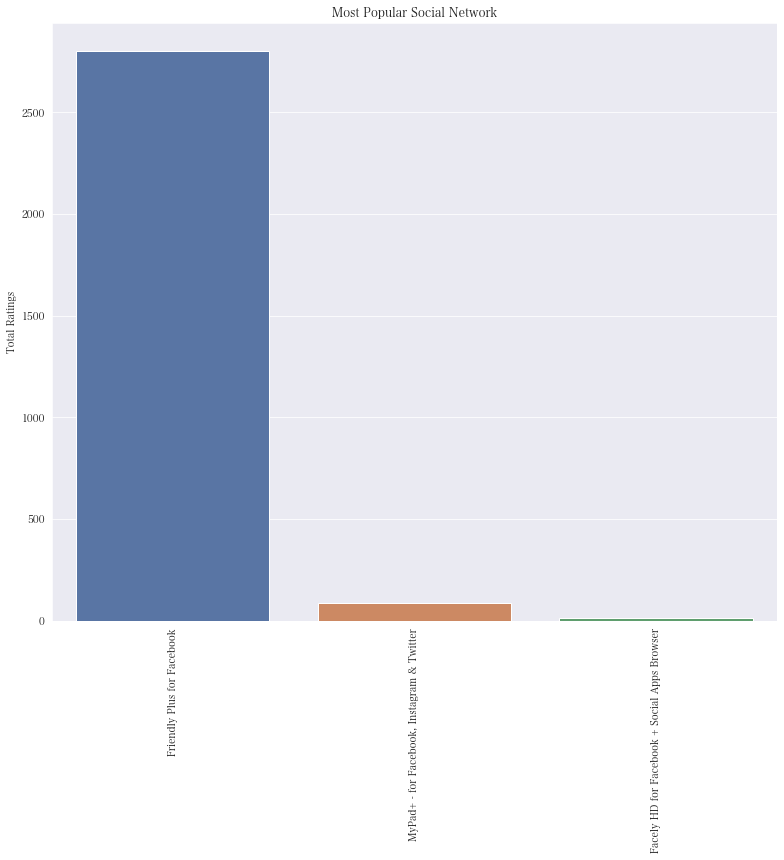

In [50]:
#top paid social network
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_social_network.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Social Network')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [51]:
#top free social network
top_free_social_network = df[(df["category"] ==        '                  Social Networking                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_social_network.head(5)

age_rating  app_rating  \
5235          1         4.7   
5237          1         4.8   
5225          4         4.8   
5234          4         4.7   
5239          1         4.3   

                                               category  \
5235                    Social Networking           ...   
5237                    Social Networking           ...   
5225                    Social Networking           ...   
5234                    Social Networking           ...   
5239                    Social Networking           ...   

                                          compatibility  \
5235  Requires iOS 8.0 or later. Compatible with iPh...   
5237  Requires iOS 9.0 or later. Compatible with iPh...   
5225  Requires iOS 11.0 or later. Compatible with iP...   
5234  Requires iOS 11.0 or later. Compatible with iP...   
5239  Requires iOS 9.0 and watchOS 4.0 or later. Com...   

                                              languages  \
5235  English, Arabic, Bengali, Catalan, Croatian, C...   
5237  English, Czech, Danish, Dutch, Filipino, Finni...   
5225                                            English   
5234  English, Dutch, French, German, Indonesian, It...   
5239  English, Croatian, Czech, Danish, Dutch, Finni...   

                            name  price  rank  rating_count   size  \
5235          WhatsApp Messenger    0.0   3.0     6500000.0  143.3   
5237                   Pinterest    0.0   4.0     3000000.0  202.9   
5225  Marco Polo - Stay In Touch    0.0  35.0     1400000.0  134.9   
5234                     GroupMe    0.0  12.0     1100000.0   66.3   
5239                   Messenger    0.0   1.0     1000000.0  280.3   

      num_languages  boolean_rank  free_or_not  
5235             39          True         True  
5237             30          True         True  
5225              1          True         True  
5234             14          True         True  
5239             27          True         True

Text(0.5, 0, '')

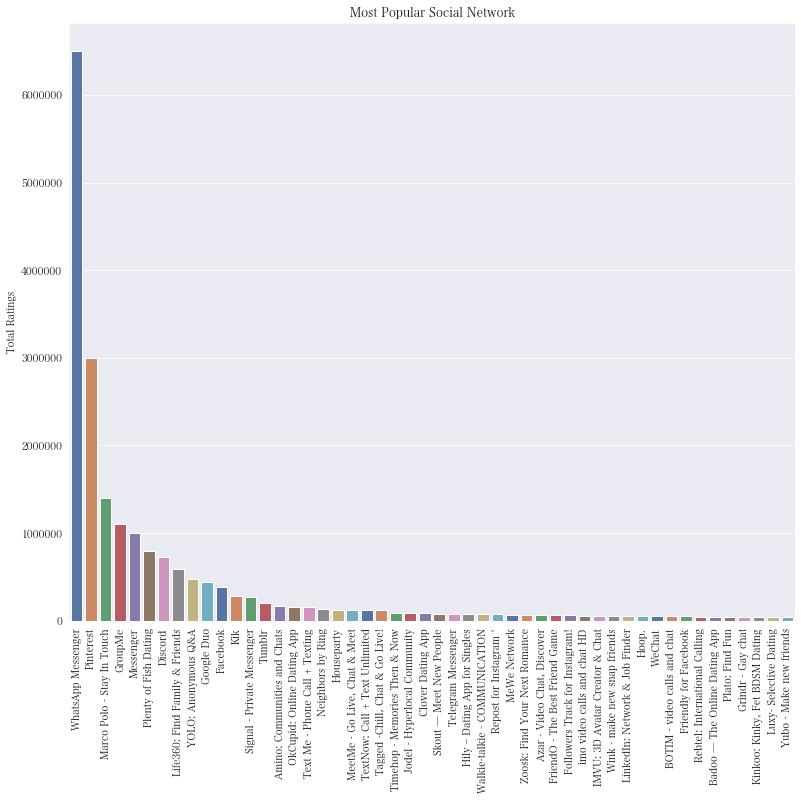

In [52]:
#top free social network
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_social_network.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Social Network')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [53]:
#top_paid_productivity
   
top_paid_productivity = df[(df["category"] ==        '                  Productivity                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_productivity.head(20)



age_rating  app_rating                                        category  \
408          4         4.8                    Productivity                   
319          4         4.8                    Productivity                   
266          4         3.5                    Productivity                   

                                         compatibility  \
408  Requires iOS 11.0 or later. Compatible with iP...   
319  Requires iOS 9.0 or later. Compatible with iPh...   
266  Requires iOS 4.3 or later. Compatible with iPh...   

                                             languages  \
408  English, Dutch, French, German, Italian, Japan...   
319                                            English   
266                                            English   

                                  name  price  rank  rating_count   size  \
408                         Notability   8.99   3.0       47900.0  264.1   
319     Tips & Tricks Pro - for iPhone   2.99   NaN        2400.0  152.6   
266  Alarm Clock - Best Alarm Clock HD   0.99   NaN         204.0   20.2   

     num_languages  boolean_rank  free_or_not  
408             15          True        False  
319              1         False        False  
266              1         False        False

Text(0.5, 0, '')

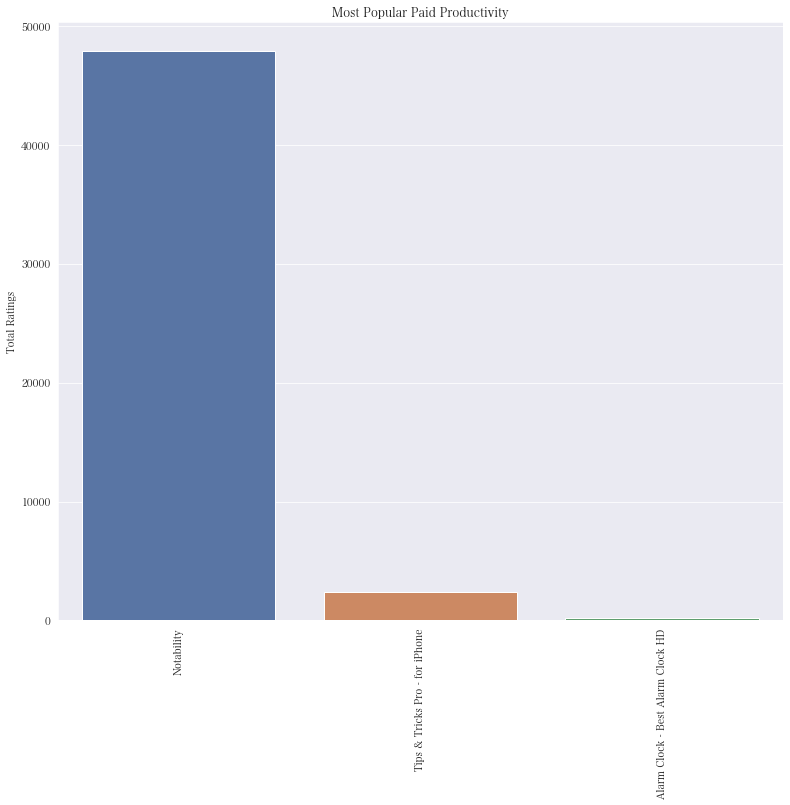

In [54]:
#top_paid_productivity
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_productivity.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Productivity')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [55]:
#top_free_productivity
top_free_productivity = df[(df["category"] ==        '                  Productivity                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_productivity.head(20)


age_rating  app_rating                                        category  \
488          4         4.8                    Productivity                   
484          4         4.6                    Productivity                   
485          4         4.7                    Productivity                   
487          4         4.8                    Productivity                   
471          4         4.8                    Productivity                   
482          4         4.8                    Productivity                   
483          4         4.7                    Productivity                   
465          4         4.6                    Productivity                   
478          4         4.7                    Productivity                   
469          4         4.7                    Productivity                   
476          4         4.7                    Productivity                   
470          4         4.8                    Productivity                   
459          4         4.7                    Productivity                   
464          4         4.5                    Productivity                   
475          4         4.7                    Productivity                   
463          1         4.8                    Productivity                   
402          4         4.9                    Productivity                   
452          4         4.7                    Productivity                   
441          4         4.8                    Productivity                   
462          4         4.7                    Productivity                   

                                         compatibility  \
488  Requires iOS 11.0 or later. Compatible with iP...   
484  Requires iOS 11.0 or later. Compatible with iP...   
485  Requires iOS 12.0 and watchOS 4.0 or later. Co...   
487  Requires iOS 11.0 or later. Compatible with iP...   
471  Requires iOS 11.0 or later. Compatible with iP...   
482  Requires iOS 11.0 or later. Compatible with iP...   
483  Requires iOS 12.0 or later. Compatible with iP...   
465  Requires iOS 9.0 or later. Compatible with iPh...   
478  Requires iOS 12.0 or later. Compatible with iP...   
469  Requires iOS 12.0 and watchOS 5.0 or later. Co...   
476  Requires iOS 10.0 and watchOS 3.0 or later. Co...   
470  Requires iOS 11.0 or later. Compatible with iP...   
459  Requires iOS 10.0 or later. Compatible with iP...   
464  Requires iOS 9.0 or later. Compatible with iPh...   
475  Requires iOS 11.3 or later. Compatible with iP...   
463  Requires iOS 11.0 or later. Compatible with iP...   
402  Requires iOS 9.3 or later. Compatible with iPh...   
452  Requires iOS 9.0 or later. Compatible with iPh...   
441  Requires iOS 10.0 or later. Compatible with iP...   
462  Requires iOS 9.3 or later. Compatible with iPh...   

                                             languages  \
488  English, Afrikaans, Amharic, Arabic, Armenian,...   
484  English, Arabic, Bengali, Bulgarian, Catalan, ...   
485  English, Afrikaans, Albanian, Amharic, Arabic,...   
487  English, Afrikaans, Albanian, Amharic, Arabic,...   
471  English, Czech, Danish, Dutch, Finnish, French...   
482  English, Afrikaans, Albanian, Amharic, Arabic,...   
483  English, Arabic, Catalan, Croatian, Czech, Dan...   
465  English, Arabic, French, Indonesian, Persian, ...   
478  English, Arabic, Catalan, Croatian, Czech, Dan...   
469  English, Arabic, Catalan, Croatian, Czech, Dan...   
476  English, Arabic, Danish, Dutch, Finnish, Frenc...   
470  English, Arabic, French, German, Italian, Japa...   
459                                            English   
464  English, Danish, French, German, Indonesian, I...   
475  English, Catalan, Croatian, Czech, Danish, Dut...   
463  English, French, German, Italian, Japanese, Po...   
402  English, Danish, Dutch, Finnish, French, Germa...   
452                                            English   
441                                         

Text(0.5, 0, '')

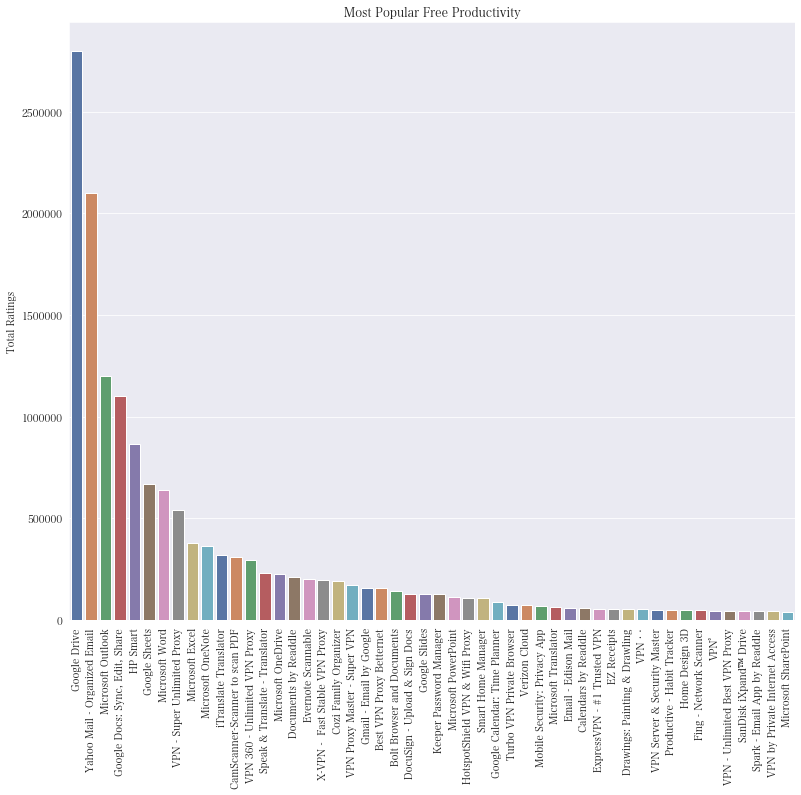

In [56]:
#top_free_productivity
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_productivity.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Productivity')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [57]:
#top paid news
top_paid_news = df[(df["category"] ==        '                  News                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_news.head(5)

age_rating  app_rating                                category  \
889          9         4.7                    News                   
730          4         4.2                    News                   
830          1         3.8                    News                   

                                         compatibility  \
889  Requires iOS 8.0 or later. Compatible with iPh...   
730  Requires iOS 11.4 and watchOS 4.3 or later. Co...   
830  Requires iOS 3.1.2 or later. Compatible with i...   

                                             languages  \
889  English, Catalan, Czech, Danish, Dutch, Finnis...   
730                                            English   
830                                            English   

                                 name  price  rank  rating_count  size  \
889      5-0 Radio Pro Police Scanner   4.99   1.0       23400.0  37.4   
730                          Downcast   2.99   7.0        1600.0  36.8   
830  Emergency Radio (Police Scanner)   0.99  34.0         438.0   5.3   

     num_languages  boolean_rank  free_or_not  
889             26          True        False  
730              1          True        False  
830              1          True        False

Text(0.5, 0, '')

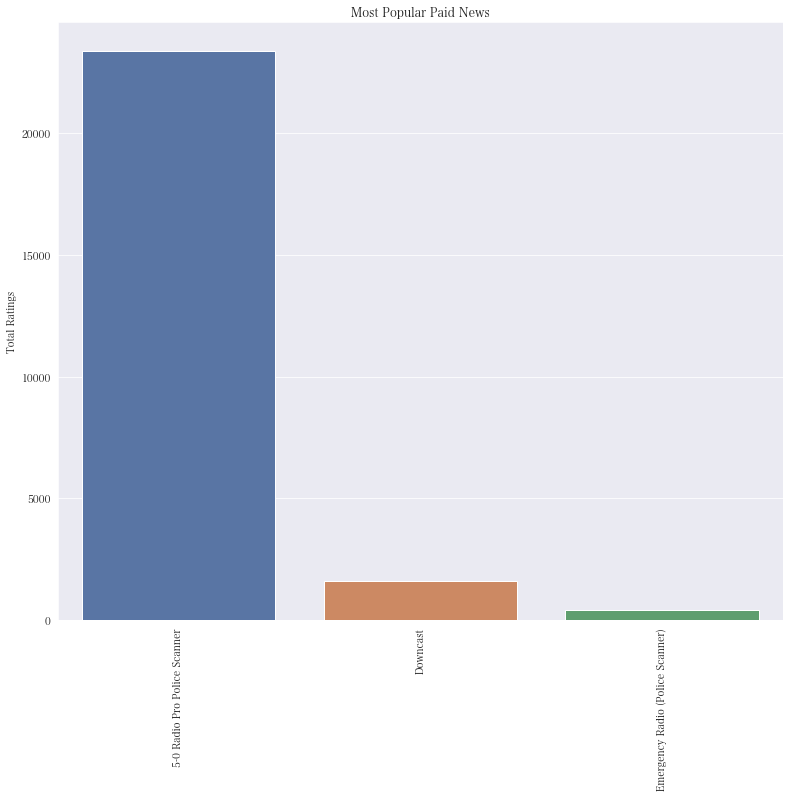

In [58]:
#top paid news
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_news.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid News')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [59]:
#top free news
top_free_news = df[(df["category"] ==        '                  News                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_news.head(5)

age_rating  app_rating                                category  \
935          1         4.7                    News                   
933          1         4.9                    News                   
932          1         4.7                    News                   
934          1         4.7                    News                   
914          4         4.7                    News                   

                                         compatibility  \
935  Requires iOS 11.0 or later. Compatible with iP...   
933  Requires iOS 11.0 or later. Compatible with iP...   
932  Requires iOS 11.4 or later. Compatible with iP...   
934  Requires iOS 11.0 and watchOS 3.0 or later. Co...   
914  Requires iOS 12.0 or later. Compatible with iP...   

                                             languages  \
935  English, Arabic, Catalan, Croatian, Czech, Dan...   
933                                            English   
932  English, Catalan, Danish, Dutch, French, Germa...   
934                                            English   
914                                            English   

                              name  price  rank  rating_count   size  \
935                        Twitter    0.0   1.0     1900000.0  122.1   
933                         Reddit    0.0   3.0     1000000.0   80.9   
932   Nextdoor: Local Neighborhood    0.0   4.0      384100.0   65.3   
934  CNN: Breaking US & World News    0.0  10.0      369100.0  138.8   
914  CNBC: Stock Market & Business    0.0  47.0      300300.0  123.7   

     num_languages  boolean_rank  free_or_not  
935             33          True         True  
933              1          True         True  
932             10          True         True  
934              1          True         True  
914              1          True         True

Text(0.5, 0, '')

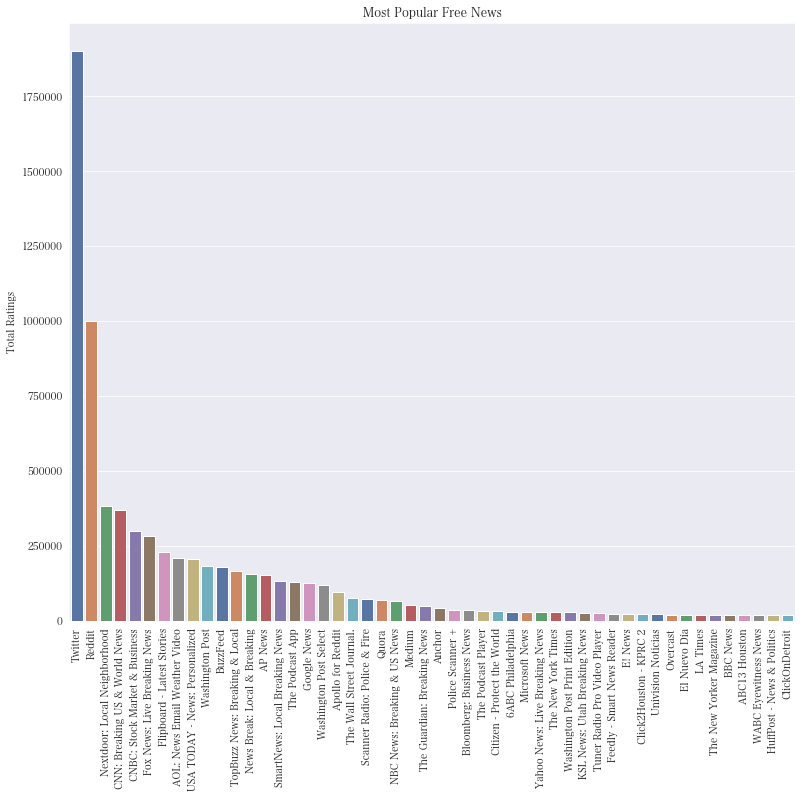

In [60]:
#top free news
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_news.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free News')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [61]:
#top paid fitness
top_paid_fitness_apps = df[(df["category"] ==        '                  Health & Fitness                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_fitness_apps.head(10)

age_rating  app_rating  \
2169          1         4.9   
2181          4         4.7   
2160          4         4.8   
2165          4         4.8   
2190          4         4.4   
2141          1         4.9   
2250          4         4.6   
2154          4         4.5   

                                               category  \
2169                    Health & Fitness            ...   
2181                    Health & Fitness            ...   
2160                    Health & Fitness            ...   
2165                    Health & Fitness            ...   
2190                    Health & Fitness            ...   
2141                    Health & Fitness            ...   
2250                    Health & Fitness            ...   
2154                    Health & Fitness            ...   

                                          compatibility  \
2169  Requires iOS 11.0 or later. Compatible with iP...   
2181  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
2160  Requires iOS 8.0 and watchOS 2.2 or later. Com...   
2165  Requires iOS 11.0 or later. Compatible with iP...   
2190  Requires iOS 8.1 or later. Compatible with iPh...   
2141  Requires iOS 9.0 and watchOS 3.1 or later. Com...   
2250  Requires iOS 8.0 and watchOS 2.0 or later. Com...   
2154  Requires iOS 9.0 and watchOS 2.0 or later. Com...   

                                              languages  \
2169  English, Danish, Dutch, French, German, Indone...   
2181  English, Dutch, French, German, Italian, Japan...   
2160                           English, French, Spanish   
2165  English, Arabic, Catalan, Czech, Danish, Dutch...   
2190  English, Danish, Dutch, Finnish, French, Germa...   
2141  English, Dutch, French, German, Italian, Japan...   
2250  English, Danish, Dutch, French, German, Italia...   
2154                                            English   

                                         name  price   rank  rating_count  \
2169                         The Wonder Weeks   3.99    2.0       57800.0   
2181           AutoSleep Track Sleep on Watch   2.99    1.0       23500.0   
2160                              White Noise   0.99   21.0       23400.0   
2165           Fitness Buddy+ Gym Workout Log   3.99  175.0        9500.0   
2190  Full Fitness : Exercise Workout Trainer   3.99    6.0        5300.0   
2141                    Period Tracker Deluxe   9.99    NaN        5000.0   
2250               7 Minute Workout Challenge   3.99   48.0        3300.0   
2154              Couch to 5K® - Run training   2.99    8.0        2600.0   

       size  num_languages  boolean_rank  free_or_not  
2169  193.6             14          True        False  
2181   27.7             13          True        False  
2160   47.8              3          True        False  
2165  212.8             31          True        False  
2190  104.8             11          True        False  
2141   61.6             15         False        False  
2250  166.8             17          True        False  
2154  181.3              1          True        False

Text(0.5, 0, '')

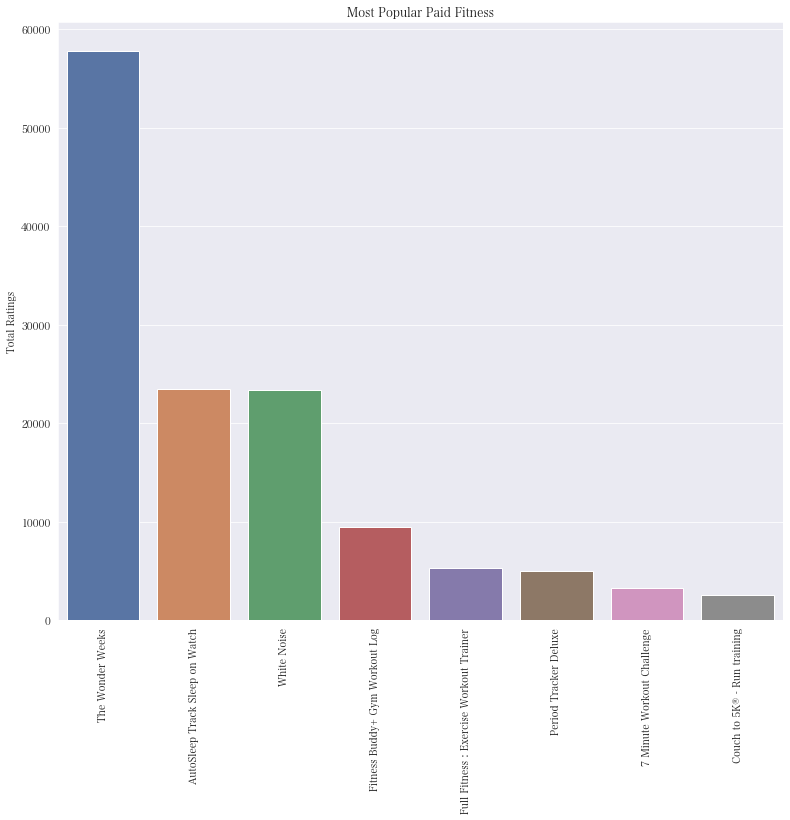

In [62]:
#top paid fitness
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_fitness_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Fitness')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [63]:
#top free fitness
top_free_fitness_apps = df[(df["category"] ==        '                  Health & Fitness                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_fitness_apps.head(10)

age_rating  app_rating  \
2358          1         4.8   
2364          4         4.7   
2362          4         4.8   
2359          4         4.9   
2357          1         4.8   
2322          4         4.8   
2361          4         4.7   
2355          4         4.8   
2349          9         4.9   
2360          4         4.8   

                                               category  \
2358                    Health & Fitness            ...   
2364                    Health & Fitness            ...   
2362                    Health & Fitness            ...   
2359                    Health & Fitness            ...   
2357                    Health & Fitness            ...   
2322                    Health & Fitness            ...   
2361                    Health & Fitness            ...   
2355                    Health & Fitness            ...   
2349                    Health & Fitness            ...   
2360                    Health & Fitness            ...   

                                          compatibility  \
2358  Requires iOS 10.0 and watchOS 4.0 or later. Co...   
2364  Requires iOS 11.0 and watchOS 2.0 or later. Co...   
2362  Requires iOS 10.0 and watchOS 6.0 or later. Co...   
2359  Requires iOS 11.0 and watchOS 6.0 or later. Co...   
2357  Requires iOS 11.0 and watchOS 2.0 or later. Co...   
2322  Requires iOS 10.0 and watchOS 4.0 or later. Co...   
2361  Requires iOS 11.0 and watchOS 2.0 or later. Co...   
2355  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
2349  Requires iOS 10.0 and watchOS 3.0 or later. Co...   
2360  Requires iOS 11.0 and watchOS 4.3 or later. Co...   

                                              languages  \
2358  English, Dutch, French, German, Portuguese, Sw...   
2364  English, Danish, Dutch, Filipino, French, Germ...   
2362  English, French, German, Korean, Portuguese, S...   
2359       English, French, German, Portuguese, Spanish   
2357  English, Danish, Finnish, French, German, Hind...   
2322                                            English   
2361  English, Arabic, Burmese, Cambodian, Chinese, ...   
2355  English, French, German, Indonesian, Italian, ...   
2349                   English, French, German, Spanish   
2360  English, Dutch, French, German, Indonesian, It...   

                                name  price  rank  rating_count   size  \
2358            WW (Weight Watchers)    0.0  16.0      924300.0  236.8   
2364                    MyFitnessPal    0.0   6.0      869400.0  212.7   
2362                            Calm    0.0   2.0      669300.0  155.8   
2359   Headspace: Meditation & Sleep    0.0  13.0      598700.0  125.0   
2357  FLO Period & Ovulation Tracker    0.0   5.0      533600.0  172.9   
2322     Carb Manager: Keto Diet App    0.0  15.0      382100.0   43.7   
2361      Lose It! – Calorie Counter    0.0  19.0      361300.0  226.8   
2355      Map My Run by Under Armour    0.0  42.0      343600.0  398.4   
2349     AllTrails: Hike, Bike & Run    0.0  27.0      298300.0  231.2   
2360                   Nike Run Club    0.0  24.0      292600.0  304.5   

      num_languages  boolean_rank  free_or_not  
2358              6          True         True  
2364             20          True         True  
2362              6          True         True  
2359              5          True         True  
2357             21          True         True  
2322              1          True         True  
2361             30          True         True  
2355             12          True         True  
2349              4          True         True  
2360             16          True         True

Text(0.5, 0, '')

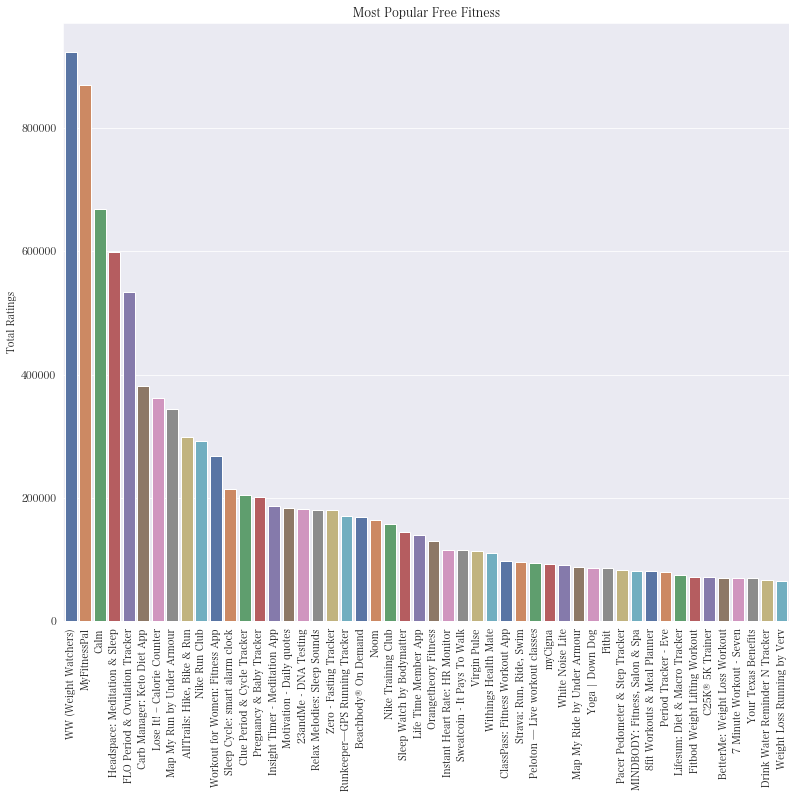

In [64]:
#top free fitness
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_fitness_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Fitness')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [65]:
#top paid shopping
top_paid_shopping_apps = df[(df["category"] ==        '                  Shopping                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_shopping_apps.head(10)


Empty DataFrame
Columns: [age_rating, app_rating, category, compatibility, languages, name, price, rank, rating_count, size, num_languages, boolean_rank, free_or_not]
Index: []

ValueError: min() arg is an empty sequence

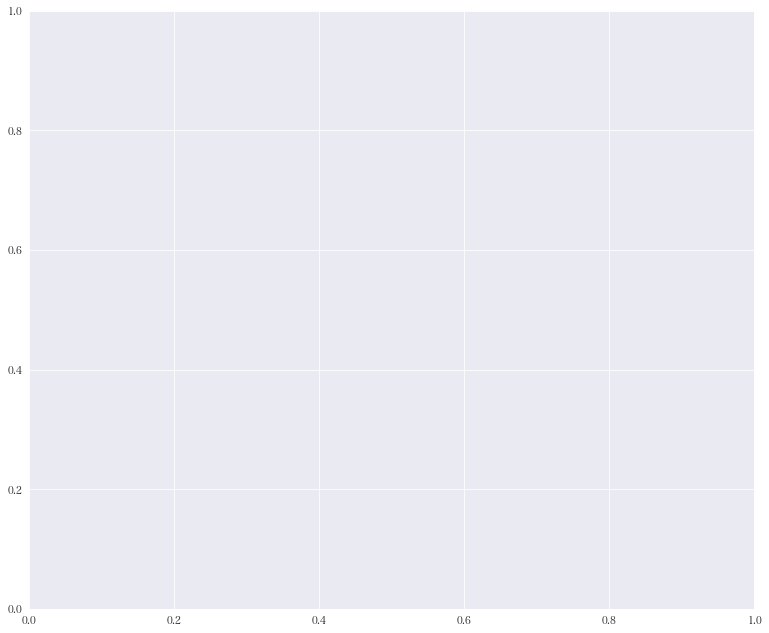

In [66]:
#top paid shopping
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_shopping_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Shopping')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [67]:
#top free shopping
top_free_shopping_apps = df[(df["category"] ==        '                  Shopping                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_shopping_apps.head(10)



age_rating  app_rating                                    category  \
4044          4         4.8                    Shopping                   
4039          1         4.8                    Shopping                   
4040          4         4.9                    Shopping                   
5466          1         4.7                    Shopping                   
5465          1         4.8                    Shopping                   
5456          4         4.8                    Shopping                   
4037          1         4.8                    Shopping                   
5464          4         4.7                    Shopping                   
4035          4         4.8                    Shopping                   
4046          1         4.4                    Shopping                   

                                          compatibility  \
4044  Requires iOS 10.0 or later. Compatible with iP...   
4039  Requires iOS 11.0 and watchOS 3.0 or later. Co...   
4040  Requires iOS 11.0 or later. Compatible with iP...   
5466  Requires iOS 10.3 or later. Compatible with iP...   
5465  Requires iOS 11.0 or later. Compatible with iP...   
5456  Requires iOS 10.0 or later. Compatible with iP...   
4037  Requires iOS 12.0 or later. Compatible with iP...   
5464  Requires iOS 11.0 or later. Compatible with iP...   
4035  Requires iOS 11.0 or later. Compatible with iP...   
4046  Requires iOS 10.0 or later. Compatible with iP...   

                                              languages  \
4044                                            English   
4039                                            English   
4040                                            English   
5466  English, Albanian, Arabic, Azerbaijani, Belaru...   
5465  English, Dutch, French, German, Italian, Polis...   
5456                                            English   
4037                                            English   
5464                                            English   
4035                            English, French, German   
4046  English, Dutch, Finnish, French, German, Greek...   

                                name  price  rank  rating_count   size  \
4044    OfferUp - Buy. Sell. Simple.    0.0  10.0     3000000.0  201.2   
4039                       Walgreens    0.0  23.0     2400000.0  308.2   
4040                          Target    0.0   5.0     1900000.0  113.8   
5466        Wish - Shopping Made Fun    0.0   4.0     1400000.0  119.9   
5465    eBay Shopping - Buy and Sell    0.0   8.0     1300000.0  211.5   
5456                          Macy's    0.0  33.0     1000000.0  344.1   
4037   Ibotta: Save & Earn Cash Back    0.0  21.0      803200.0  145.0   
5464   Walmart - Save Time and Money    0.0   3.0      787500.0  240.4   
4035  Wayfair – Shop All Things Home    0.0   9.0      651500.0  277.3   
4046    letgo: Sell & Buy Used Stuff    0.0  13.0      630400.0  205.7   

      num_languages  boolean_rank  free_or_not  
4044              1          True         True  
4039              1          True         True  
4040              1          True         True  
5466             42          True         True  
5465             11          True         True  
5456              1          True         True  
4037              1          True         True  
5464              1          True         True  
4035              3          True         True  
4046             16          True         True

Text(0.5, 0, '')

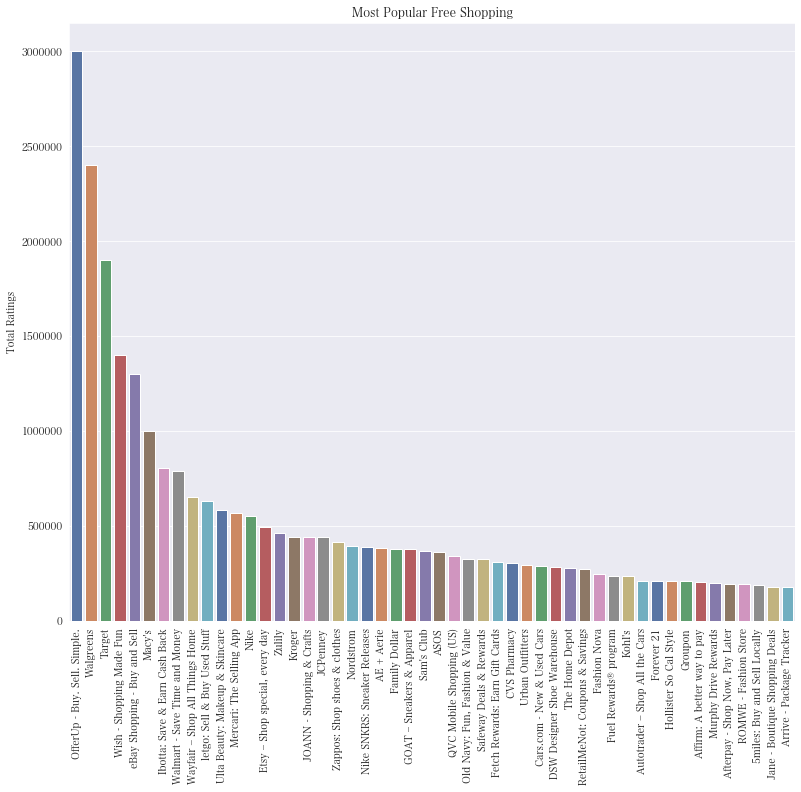

In [68]:
#top free shopping
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_shopping_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Shopping')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [69]:
#top paid medical
top_paid_medical_apps = df[(df["category"] ==        '                  Medical                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_medical_apps.head(10)



age_rating  app_rating                                   category  \
1458          1         4.8                    Medical                   
1480          1         4.8                    Medical                   
1414          4         3.9                    Medical                   
1510          4         4.7                    Medical                   
1427          1         3.7                    Medical                   
1482          1         3.6                    Medical                   
1420          1         3.5                    Medical                   
1419          1         4.0                    Medical                   
1424          4         4.6                    Medical                   

                                          compatibility  \
1458  Requires iOS 9.0 or later. Compatible with iPh...   
1480  Requires iOS 12.0 or later. Compatible with iP...   
1414  Requires iOS 9.0 or later. Compatible with iPh...   
1510  Requires iOS 8.0 and watchOS 2.2 or later. Com...   
1427  Requires iOS 11.0 or later. Compatible with iP...   
1482  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
1420  Requires iOS 9.0 or later. Compatible with iPh...   
1419  Requires iOS 8.0 or later. Compatible with iPh...   
1424  Requires iOS 8.0 or later. Compatible with iPh...   

                                              languages  \
1458                                            English   
1480  English, French, German, Italian, Japanese, Si...   
1414              English, Italian, Portuguese, Spanish   
1510  English, Dutch, French, German, Italian, Japan...   
1427                           English, German, Spanish   
1482                                            English   
1420                                            English   
1419                                            English   
1424                                            English   

                                                name  price  rank  \
1458                             Essential Anatomy 5  14.99   5.0   
1480                        Human Anatomy Atlas 2020  24.99   4.0   
1414                      Hear My Baby Heartbeat App   4.99   1.0   
1510                     Baby Connect (Activity Log)   4.99   3.0   
1427                   Monash University FODMAP diet   7.99   2.0   
1482                    Instant ECG - Mastery of EKG   5.99  13.0   
1420                    Pill Identifier by Drugs.com   0.99  19.0   
1419                             Drugs & Medications   0.99   NaN   
1424  Sleep Sounds and SPA Music for Insomnia Relief   1.99   NaN   

      rating_count   size  num_languages  boolean_rank  free_or_not  
1458        8900.0  850.9              1          True        False  
1480        8100.0    1.5              7          True        False  
1414        4400.0   35.8              4          True        False  
1510        1200.0   30.9             14          True        False  
1427         322.0  285.4              3          True        False  
1482         288.0  224.3              1          True        False  
1420          70.0   53.5              1          True        False  
1419          36.0   78.5              1         False        False  
1424          19.0  483.7              1         False        False

Text(0.5, 0, '')

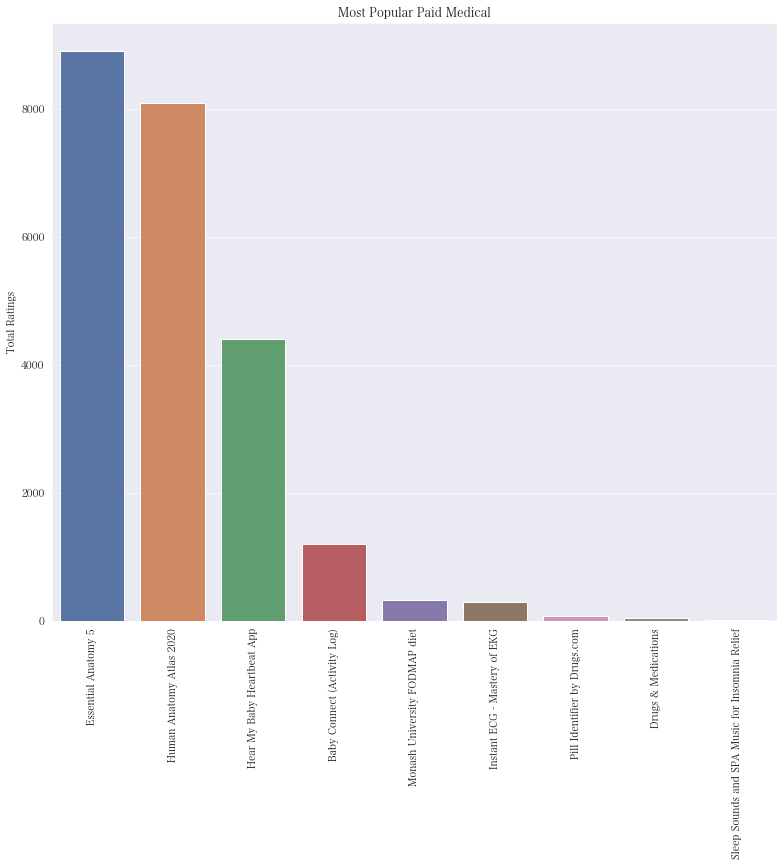

In [70]:
#top paid medical
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_medical_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Medical')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [71]:
#top free medical
top_free_medical_apps = df[(df["category"] ==        '                  Medical                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_medical_apps.head(10)




age_rating  app_rating                                   category  \
1652          1         4.8                    Medical                   
1646          1         4.8                    Medical                   
1638          1         4.8                    Medical                   
1649          1         4.9                    Medical                   
1634          4         4.8                    Medical                   
1640          1         4.9                    Medical                   
1651          1         4.7                    Medical                   
1622          1         4.8                    Medical                   
1584          1         4.6                    Medical                   
1637          1         4.9                    Medical                   

                                          compatibility  \
1652  Requires iOS 11.0 or later. Compatible with iP...   
1646  Requires iOS 11.0 or later. Compatible with iP...   
1638  Requires iOS 10.0 or later. Compatible with iP...   
1649  Requires iOS 11.0 or later. Compatible with iP...   
1634  Requires iOS 10.0 and watchOS 2.0 or later. Co...   
1640  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
1651  Requires iOS 10.0 or later. Compatible with iP...   
1622  Requires iOS 10.0 or later. Compatible with iP...   
1584  Requires iOS 10.0 or later. Compatible with iP...   
1637  Requires iOS 11.0 or later. Compatible with iP...   

                                              languages  \
1652                                   English, Spanish   
1646                                            English   
1638                                    English, French   
1649                                            English   
1634  English, Dutch, French, German, Italian, Japan...   
1640                                            English   
1651                                   English, Spanish   
1622                 English, French, Japanese, Spanish   
1584  English, Chinese, Czech, Danish, Dutch, Estoni...   
1637                                            English   

                                name  price  rank  rating_count   size  \
1652  GoodRx – Save On Prescriptions    0.0   1.0      511000.0   83.9   
1646       Leafly: Marijuana Reviews    0.0  13.0      187600.0  107.5   
1638                         Teladoc    0.0  11.0      169200.0   82.3   
1649  Weedmaps: Marijuana & Cannabis    0.0   6.0      133400.0  362.7   
1634      Baby Tracker - Newborn Log    0.0  23.0       88000.0   99.7   
1640                  1-800 Contacts    0.0  35.0       74700.0   84.1   
1651  WebMD: Symptoms, Doctors, & Rx    0.0  56.0       67000.0  135.9   
1622              PulsePoint Respond    0.0  26.0       66500.0   40.4   
1584                     DreamMapper    0.0  75.0       46400.0   32.8   
1637                Doctor On Demand    0.0  28.0       43300.0  179.3   

      num_languages  boolean_rank  free_or_not  
1652              2          True         True  
1646              1          True         True  
1638              2          True         True  
1649              1          True         True  
1634             13          True         True  
1640              1          True         True  
1651              2          True         True  
1622              4          True         True  
1584             18          True         True  
1637              1          True         True

Text(0.5, 0, '')

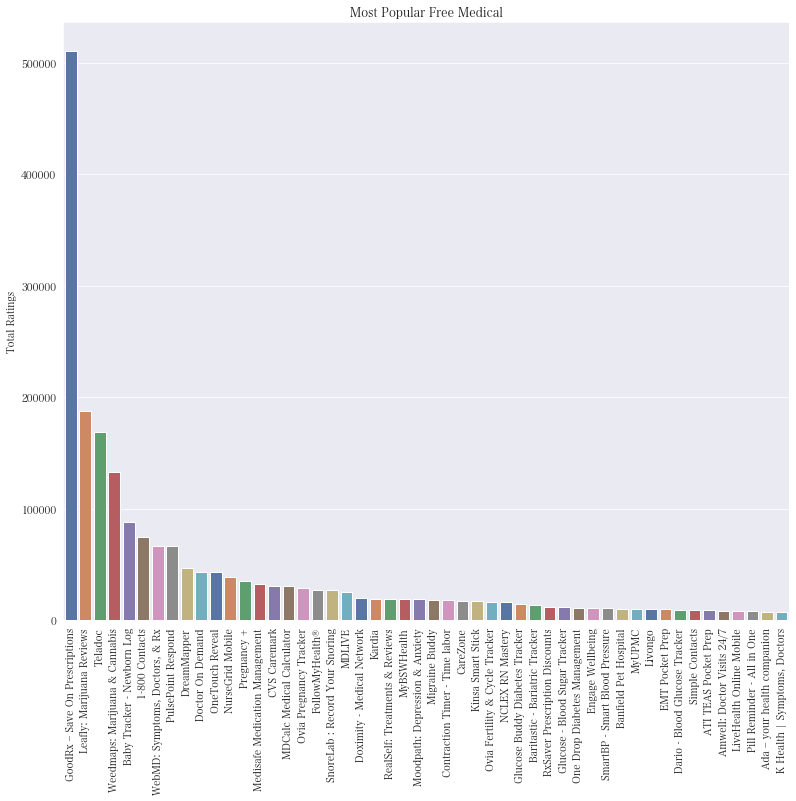

In [72]:
#top free medical
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_medical_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Medical')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [73]:
#top paid lifestyle
top_paid_lifestyle_apps =df[(df["category"] ==        '                  Lifestyle                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_lifestyle_apps.head(10)





Empty DataFrame
Columns: [age_rating, app_rating, category, compatibility, languages, name, price, rank, rating_count, size, num_languages, boolean_rank, free_or_not]
Index: []

ValueError: min() arg is an empty sequence

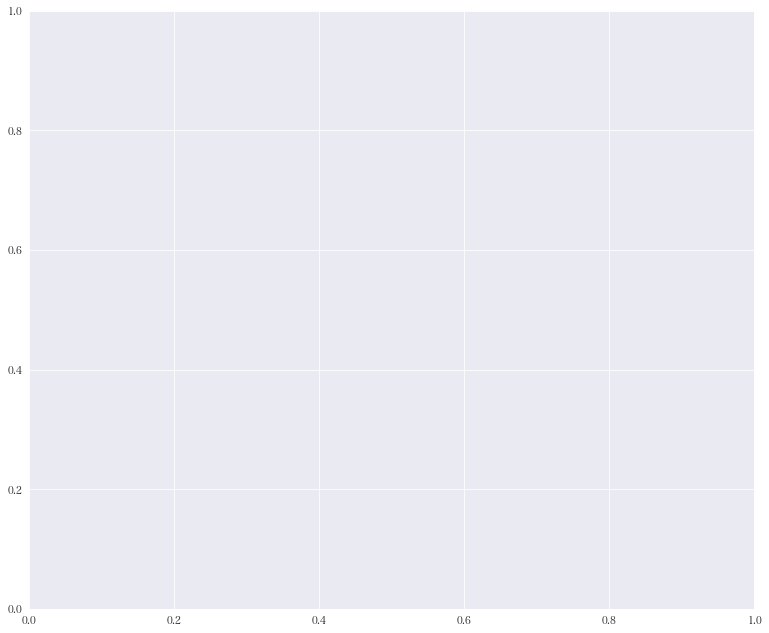

In [74]:
#top paid lifestyle
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_lifestyle_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Lifestyle')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [75]:
#top free lifestyle
top_free_lifestyle_apps =df[(df["category"] ==        '                  Lifestyle                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_lifestyle_apps.head(10)





age_rating  app_rating                                     category  \
2130          4         4.8                    Lifestyle                   
2126          1         4.0                    Lifestyle                   
2118          1         4.8                    Lifestyle                   
2120          4         4.8                    Lifestyle                   
2121          1         4.2                    Lifestyle                   
2088          4         4.8                    Lifestyle                   
2109          4         4.8                    Lifestyle                   
2091          4         4.8                    Lifestyle                   
2111          4         4.7                    Lifestyle                   
2086          4         4.8                    Lifestyle                   

                                          compatibility  \
2130  Requires iOS 11.0 or later. Compatible with iP...   
2126  Requires iOS 11.0 or later. Compatible with iP...   
2118  Requires iOS 12.0 or later. Compatible with iP...   
2120  Requires iOS 12.0 or later. Compatible with iP...   
2121  Requires iOS 12.0 or later. Compatible with iP...   
2088  Requires iOS 11.0 and watchOS 4.3 or later. Co...   
2109  Requires iOS 12.0 or later. Compatible with iP...   
2091  Requires iOS 12.0 or later. Compatible with iP...   
2111  Requires iOS 11.0 or later. Compatible with iP...   
2086  Requires iOS 11.0 and watchOS 4.2 or later. Co...   

                                              languages  \
2130                                            English   
2126  English, Afrikaans, Arabic, Bengali, Bulgarian...   
2118                                            English   
2120                                            English   
2121  English, Chinese, Danish, Dutch, Finnish, Fren...   
2088                                            English   
2109                                            English   
2091  English, German, Japanese, Polish, Simplified ...   
2111   English, Dutch, French, German, Italian, Spanish   
2086            English, Dutch, French, German, Spanish   

                                name  price   rank  rating_count   size  \
2130    Zillow Real Estate & Rentals    0.0    3.0     3900000.0  134.2   
2126                          Tinder    0.0    2.0      786900.0  123.0   
2118                     PINK Nation    0.0   33.0      760800.0   89.3   
2120  Trulia Real Estate: Find Homes    0.0   20.0      681400.0   86.6   
2121        Bumble - Meet New People    0.0    4.0      613600.0  119.2   
2088                     ADT Pulse ®    0.0  147.0      601300.0  138.5   
2109   Redfin Buy & Sell Real Estate    0.0   41.0      490300.0   93.0   
2091    Evite: Online & Text Invites    0.0   73.0      436200.0   57.3   
2111                            Nest    0.0   16.0      432500.0  359.4   
2086     MyQ Garage & Access Control    0.0   22.0      384300.0  298.1   

      num_languages  boolean_rank  free_or_not  
2130              1          True         True  
2126             53          True         True  
2118              1          True         True  
2120              1          True         True  
2121             18          True         True  
2088              1          True         True  
2109              1          True         True  
2091              6          True         True  
2111              6          True         True  
2086              5          True         True

Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 1588 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 1591 missing from current font.
  font.set_text(s, 0, flags=flags)


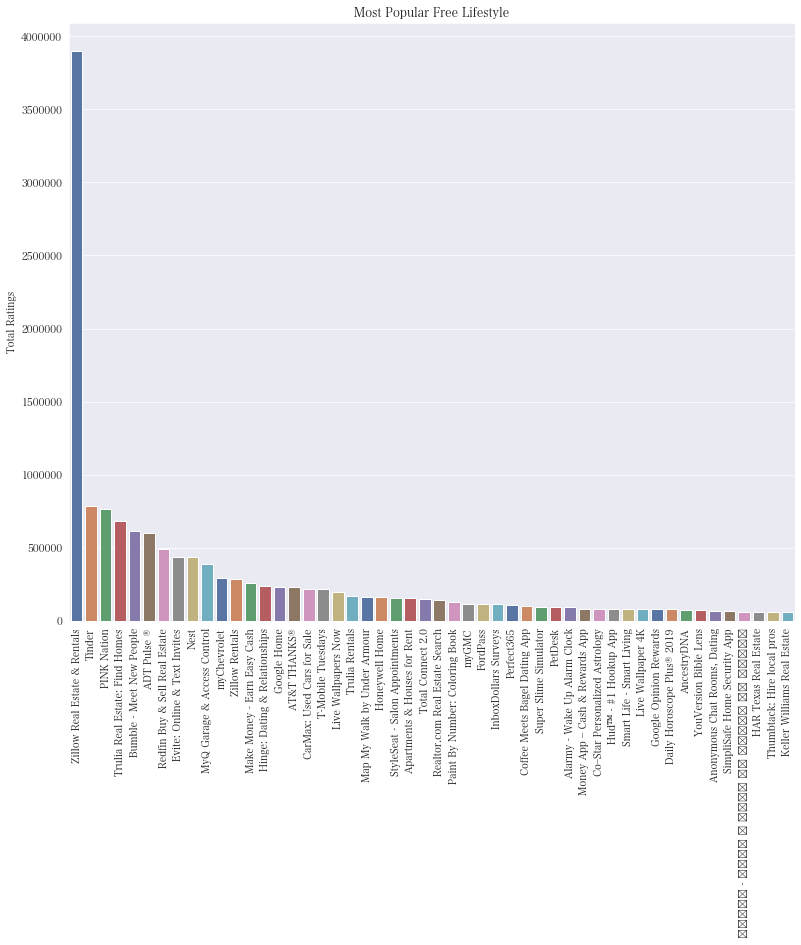

In [76]:
#top free lifestyle
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_lifestyle_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Lifestyle')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [77]:
#top paid travel
top_paid_travel_apps =df[(df["category"] ==        '                  Travel                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_travel_apps.head(10)




Empty DataFrame
Columns: [age_rating, app_rating, category, compatibility, languages, name, price, rank, rating_count, size, num_languages, boolean_rank, free_or_not]
Index: []

ValueError: min() arg is an empty sequence

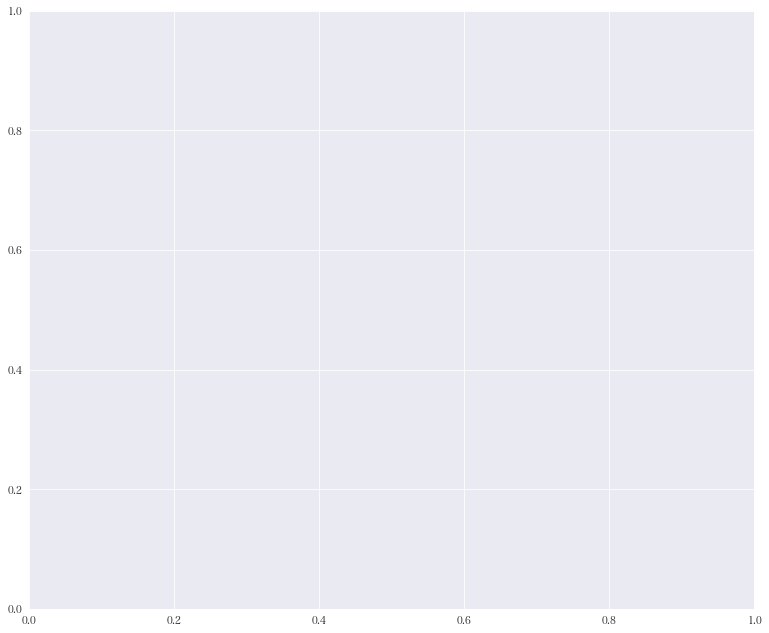

In [78]:
#top free travel
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_travel_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Travel')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [79]:
#top free travel
top_free_travel_apps =df[(df["category"] ==        '                  Travel                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_travel_apps.head(10)




age_rating  app_rating                                  category  \
4761          4         4.9                    Travel                   
4756          4         4.8                    Travel                   
4757          4         4.8                    Travel                   
4759          4         4.7                    Travel                   
4739          4         4.9                    Travel                   
4764          4         4.7                    Travel                   
4755          4         4.8                    Travel                   
4748          4         4.6                    Travel                   
4743          4         4.9                    Travel                   
4751          4         4.8                    Travel                   

                                          compatibility  \
4761  Requires iOS 11.0 or later. Compatible with iP...   
4756  Requires iOS 11.0 or later. Compatible with iP...   
4757  Requires iOS 11.0 and watchOS 2.2 or later. Co...   
4759  Requires iOS 10.0 and watchOS 2.0 or later. Co...   
4739  Requires iOS 10.0 or later. Compatible with iP...   
4764  Requires iOS 11.0 and watchOS 5.0 or later. Co...   
4755  Requires iOS 11.0 or later. Compatible with iP...   
4748  Requires iOS 12.0 or later. Compatible with iP...   
4743  Requires iOS 11.0 and watchOS 2.0 or later. Co...   
4751  Requires iOS 12.0 and watchOS 3.0 or later. Co...   

                                              languages  \
4761      English, Chinese, French, Portuguese, Spanish   
4756                                            English   
4757                                            English   
4759                                            English   
4739  English, Arabic, Bulgarian, Czech, Danish, Dut...   
4764  English, Arabic, Bulgarian, Croatian, Czech, D...   
4755  English, Danish, Dutch, Finnish, French, Germa...   
4748                                            English   
4743                                            English   
4751  English, Arabic, Chinese, Croatian, Czech, Dan...   

                                name  price  rank  rating_count   size  \
4761                            Lyft    0.0   2.0     7300000.0  282.1   
4756              Southwest Airlines    0.0   7.0     3400000.0  102.8   
4757                       Fly Delta    0.0  13.0     2900000.0  196.8   
4759                 United Airlines    0.0  11.0     2800000.0  231.1   
4739        Lime - Your Ride Anytime    0.0  22.0     1400000.0  172.2   
4764                            Uber    0.0   1.0     1200000.0  307.5   
4755  Expedia: Hotels, Flights & Car    0.0   8.0     1200000.0  110.2   
4748            My Disney Experience    0.0  14.0     1100000.0  288.9   
4743   JetBlue - Book & manage trips    0.0  32.0     1000000.0  125.0   
4751  Hotels.com: Book Hotels & More    0.0  20.0     1000000.0  132.7   

      num_languages  boolean_rank  free_or_not  
4761              5          True         True  
4756              1          True         True  
4757              1          True         True  
4759              1          True         True  
4739             24          True         True  
4764             37          True         True  
4755             18          True         True  
4748              1          True         True  
4743              1          True         True  
4751             34          True         True

Text(0.5, 0, '')

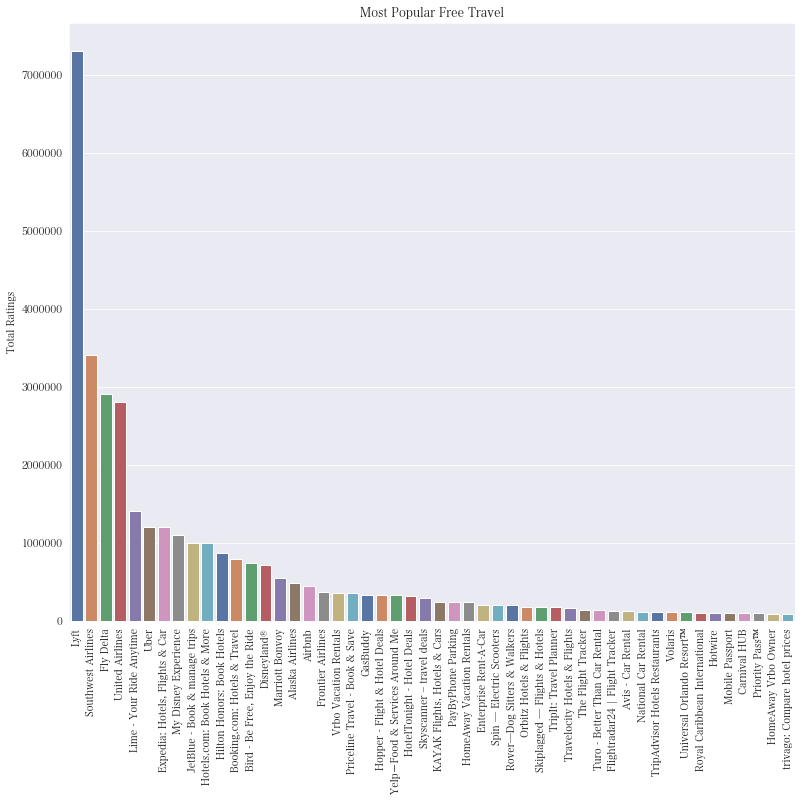

In [80]:
#top free travel
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_travel_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Travel')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [81]:
#top paid finance
top_paid_finance_apps =df[(df["category"] ==        '                  Finance                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_finance_apps.head(10)




Empty DataFrame
Columns: [age_rating, app_rating, category, compatibility, languages, name, price, rank, rating_count, size, num_languages, boolean_rank, free_or_not]
Index: []

ValueError: min() arg is an empty sequence

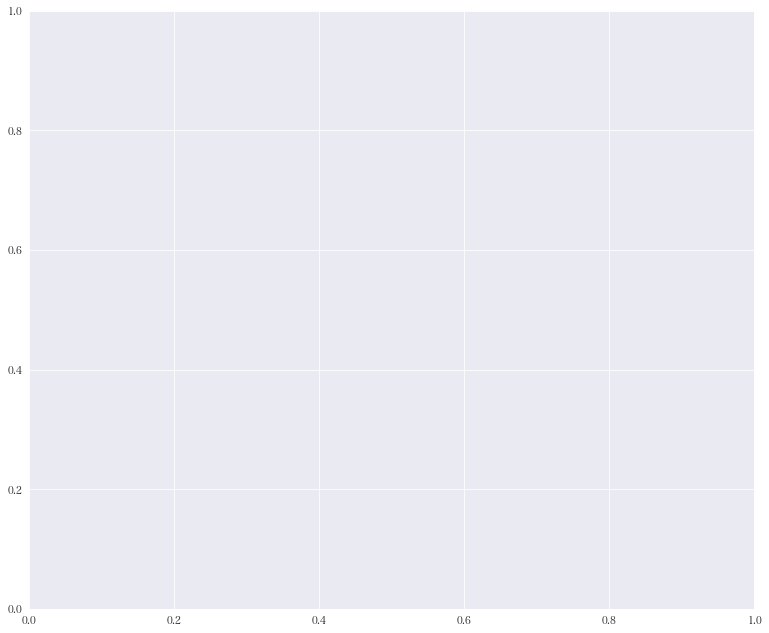

In [82]:
#top paid finance
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_finance_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Finance')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [83]:
#top free finance
top_free_finance_apps =df[(df["category"] ==        '                  Finance                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_finance_apps.head(10)




age_rating  app_rating                                   category  \
3080          4         4.9                    Finance                   
3073          4         4.8                    Finance                   
3079          4         4.8                    Finance                   
3067          4         4.8                    Finance                   
3077          4         4.8                    Finance                   
3070          4         4.8                    Finance                   
3076          4         4.8                    Finance                   
3071          4         4.9                    Finance                   
3069          4         4.9                    Finance                   
3065          4         4.8                    Finance                   

                                          compatibility  \
3080  Requires iOS 11.0 or later. Compatible with iP...   
3073  Requires iOS 11.0 or later. Compatible with iP...   
3079  Requires iOS 11.0 or later. Compatible with iP...   
3067  Requires iOS 10.0 and watchOS 2.0 or later. Co...   
3077  Requires iOS 11.0 or later. Compatible with iP...   
3070  Requires iOS 11.0 or later. Compatible with iP...   
3076  Requires iOS 11.0 and watchOS 3.0 or later. Co...   
3071  Requires iOS 11.0 and watchOS 4.3 or later. Co...   
3069  Requires iOS 11.2 or later. Compatible with iP...   
3065  Requires iOS 11.0 and watchOS 4.0 or later. Co...   

                                              languages  \
3080                                            English   
3073                                   English, Spanish   
3079  English, Arabic, Chinese, Czech, Danish, Dutch...   
3067                                            English   
3077                                   English, Spanish   
3070                                            English   
3076                                   English, Spanish   
3071                                            English   
3069                                            English   
3065                                            English   

                                name  price  rank  rating_count   size  \
3080                           Venmo    0.0   2.0     7400000.0  113.6   
3073              Wells Fargo Mobile    0.0  13.0     3500000.0  105.1   
3079             PayPal: Mobile Cash    0.0   3.0     2800000.0  173.6   
3067                 Discover Mobile    0.0  24.0     2500000.0  153.8   
3077                   Chase Mobile®    0.0   7.0     2200000.0  225.8   
3070    GEICO Mobile - Car Insurance    0.0  17.0     1900000.0  166.2   
3076  Bank of America Mobile Banking    0.0   9.0     1700000.0  422.2   
3071                    Citi Mobile®    0.0  22.0     1600000.0  212.9   
3069                            Amex    0.0  28.0     1300000.0  164.5   
3065  Robinhood: Invest. Save. Earn.    0.0   9.0     1000000.0  173.0   

      num_languages  boolean_rank  free_or_not  
3080              1          True         True  
3073              2          True         True  
3079             25          True         True  
3067              1          True         True  
3077              2          True         True  
3070              1          True         True  
3076              2          True         True  
3071              1          True         True  
3069              1          True         True  
3065              1          True         True

Text(0.5, 0, '')

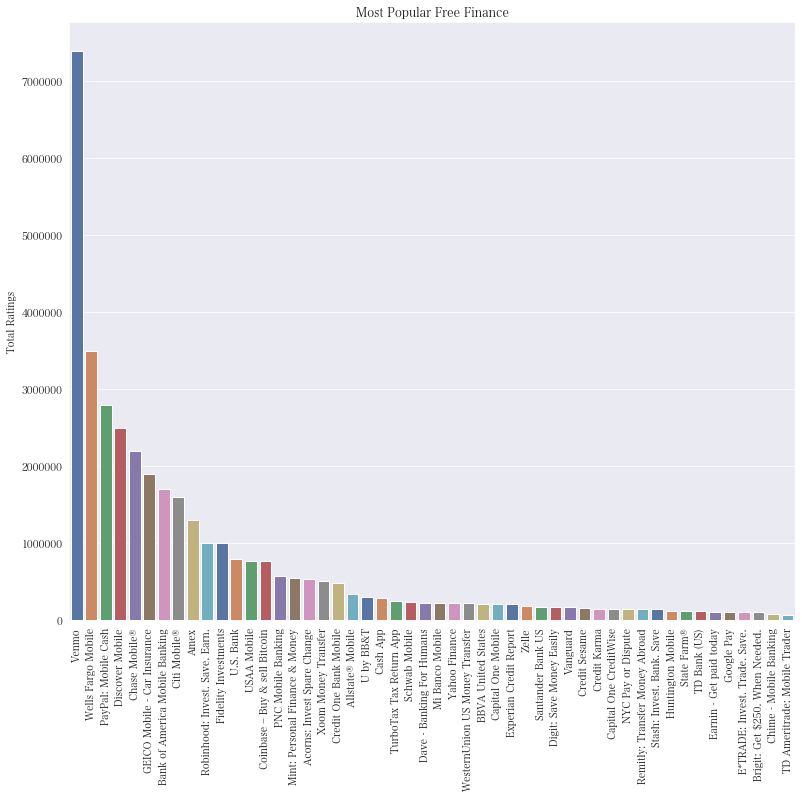

In [84]:
#top free finance
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_finance_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Finance')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [85]:
df.category.unique()

array(['                  Books                ',
       '                  Business                ',
       '                  Education                ',
       '                  Entertainment                ',
       '                  Finance                ',
       '                  Food & Drink                ',
       '                  Games                ',
       '                  Health & Fitness                ',
       '                  Lifestyle                ',
       '                  News                ',
       '                  Medical                ',
       '                  Music                ',
       '                  Navigation                ',
       '                  Photo & Video                ',
       '                  Productivity                ',
       '                  Reference                ',
       '                  Magazines & Newspapers                ',
       '                  Sports                ',
       '          

In [86]:
#top paid Entertainment
top_paid_entertainment_apps =df[(df["category"] ==        '                  Entertainment                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_entertainment_apps.head(10)





age_rating  app_rating                                         category  \
3103          4         4.5                    Entertainment                   
3222          9         4.2                    Entertainment                   
3128          1         3.9                    Entertainment                   

                                          compatibility  \
3103  Requires iOS 13.2 or later. Compatible with iPad.   
3222  Requires iOS 5.1.1 or later. Compatible with i...   
3128  Requires iOS 9.0 or later. Compatible with iPh...   

                                              languages          name  price  \
3103  English, Arabic, French, German, Italian, Japa...     Procreate   9.99   
3222                                            English    Pocket God   0.99   
3128  English, Arabic, Dutch, French, German, Hebrew...  Akinator VIP   3.99   

      rank  rating_count   size  num_languages  boolean_rank  free_or_not  
3103   NaN       11100.0  320.1             13         False        False  
3222   6.0        1800.0  145.3              1          True        False  
3128  15.0        1100.0  195.8             15          True        False

Text(0.5, 0, '')

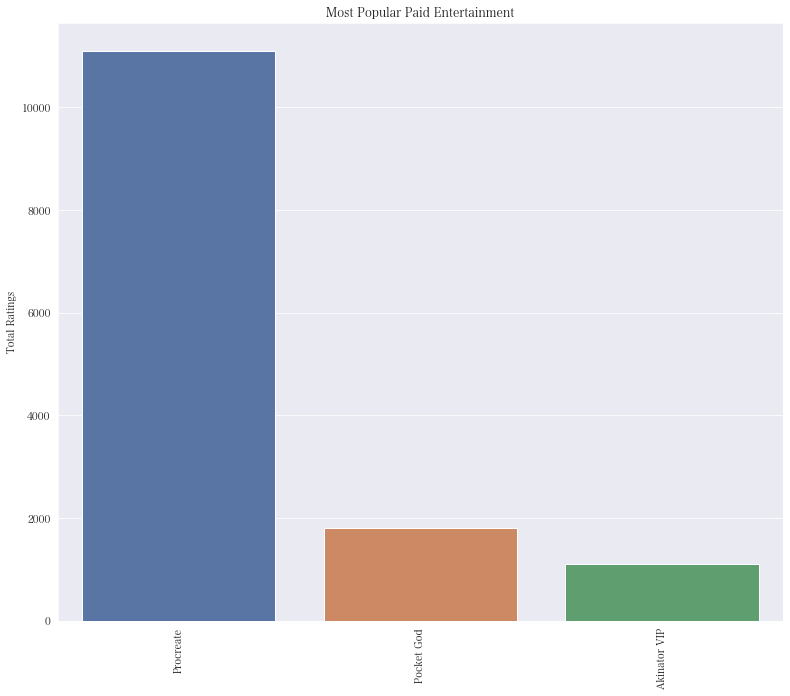

In [87]:
#top paid Entertainment
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_entertainment_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Entertainment')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [88]:
#top free Entertainment
top_free_entertainmet_apps =df[(df["category"] ==        '                  Entertainment                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_entertainmet_apps.head(10)





age_rating  app_rating                                         category  \
3318          1         4.8                    Entertainment                   
3313          4         4.8                    Entertainment                   
3315          1         4.8                    Entertainment                   
3311          4         4.7                    Entertainment                   
3316          1         4.7                    Entertainment                   
3287          4         4.8                    Entertainment                   
3297          4         4.7                    Entertainment                   
3302          4         4.7                    Entertainment                   
3238          4         4.7                    Entertainment                   
3300          1         4.7                    Entertainment                   

                                          compatibility  \
3318  Requires iOS 9.3 or later. Compatible with iPh...   
3313  Requires iOS 11.0 and watchOS 3.0 or later. Co...   
3315  Requires iOS 9.3 or later. Compatible with iPh...   
3311  Requires iOS 12.0 or later. Compatible with iP...   
3316  Requires iOS 12.0 or later. Compatible with iP...   
3287  Requires iOS 12.0 or later. Compatible with iP...   
3297  Requires iOS 10.0 or later. Compatible with iP...   
3302  Requires iOS 9.0 or later. Compatible with iPh...   
3238  Requires iOS 8.1 or later. Compatible with iPh...   
3300  Requires iOS 9.0 and watchOS 4.0 or later. Com...   

                                              languages  \
3318  English, Arabic, Bengali, Burmese, Cambodian, ...   
3313                                            English   
3315  English, Danish, Dutch, Finnish, French, Germa...   
3311                                    English, French   
3316                                            English   
3287  English, Dutch, French, German, Italian, Portu...   
3297                                            English   
3302  English, Afrikaans, Albanian, Amharic, Arabic,...   
3238  English, French, German, Italian, Portuguese, ...   
3300               English, French, Portuguese, Spanish   

                                name  price  rank  rating_count   size  \
3318          TikTok - Make Your Day    0.0   1.0     2800000.0  374.1   
3313  Fandango Movie Tickets & Times    0.0  26.0     1600000.0   63.2   
3315              Amazon Prime Video    0.0   5.0     1500000.0  187.3   
3311  Ticketmaster－Buy, Sell Tickets    0.0  11.0     1400000.0   94.6   
3316  Hulu: Stream TV shows & movies    0.0   4.0     1200000.0   79.3   
3287          StubHub: Event Tickets    0.0  65.0     1100000.0   95.2   
3297                         DIRECTV    0.0  35.0     1000000.0  203.6   
3302                    YouTube Kids    0.0  12.0      841600.0  226.3   
3238          Sandbox Pixel Coloring    0.0  84.0      750500.0   19.8   
3300                            Roku    0.0   6.0      715000.0  171.5   

      num_languages  boolean_rank  free_or_not  
3318             40          True         True  
3313              1          True         True  
3315             23          True         True  
3311              2          True         True  
3316              1          True         True  
3287              7          True         True  
3297              1          True         True  
3302             73          True         True  
3238              7          True         True  
3300              4          True         True

Text(0.5, 0, '')

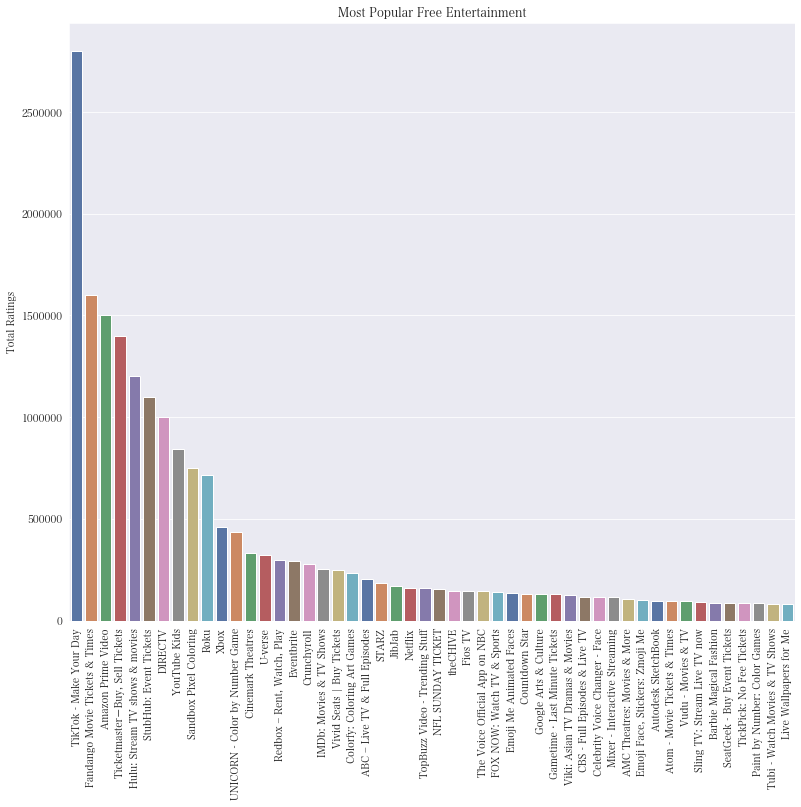

In [89]:
#top free Entertainment
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data = top_free_entertainmet_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Entertainment')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [90]:
#top paid Business
top_paid_business_apps =df[(df["category"] ==        '                  Business                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_business_apps.head(10)





age_rating  app_rating                                    category  \
3701          4         4.9                    Business                   
3697          4         4.9                    Business                   
3587          4         4.8                    Business                   
3728          4         4.7                    Business                   
3609          4         4.9                    Business                   
3599          4         4.0                    Business                   
3632          4         3.2                    Business                   

                                          compatibility  \
3701  Requires iOS 8.0 or later. Compatible with iPh...   
3697  Requires iOS 10.0 or later. Compatible with iP...   
3587  Requires iOS 11.0 or later. Compatible with iP...   
3728  Requires iOS 11.0 and watchOS 2.0 or later. Co...   
3609  Requires iOS 11.0 or later. Compatible with iP...   
3599  Requires iOS 4.3 or later. Compatible with iPh...   
3632  Requires iOS 9.0 or later. Compatible with iPh...   

                                              languages  \
3701  English, French, German, Italian, Japanese, Po...   
3697  English, French, German, Italian, Japanese, Po...   
3587  English, Dutch, French, German, Hindi, Italian...   
3728                                   English, Spanish   
3609  English, Dutch, French, German, Italian, Japan...   
3599                                            English   
3632  English, French, German, Italian, Portuguese, ...   

                                                   name  price   rank  \
3701                        TurboScan™ Pro: PDF scanner   5.99    5.0   
3697                       Scanner Pro: PDF Scanner App   3.99    2.0   
3587                         iScanner - PDF Scanner App  14.99   15.0   
3728                                       HotSchedules   2.99    1.0   
3609                             JotNot Scanner App Pro   6.99   14.0   
3599  Battery : Battery Power Battery Charge Battery...   0.99  183.0   
3632                                 Docs To Go Premium  16.99  187.0   

      rating_count   size  num_languages  boolean_rank  free_or_not  
3701      196000.0   26.2              9          True        False  
3697      102700.0  159.5              9          True        False  
3587       90400.0  116.2             14          True        False  
3728       66100.0   78.3              2          True        False  
3609       19700.0   49.9             12          True        False  
3599         239.0   12.0              1          True        False  
3632          69.0   88.2              6          True        False

Text(0.5, 0, '')

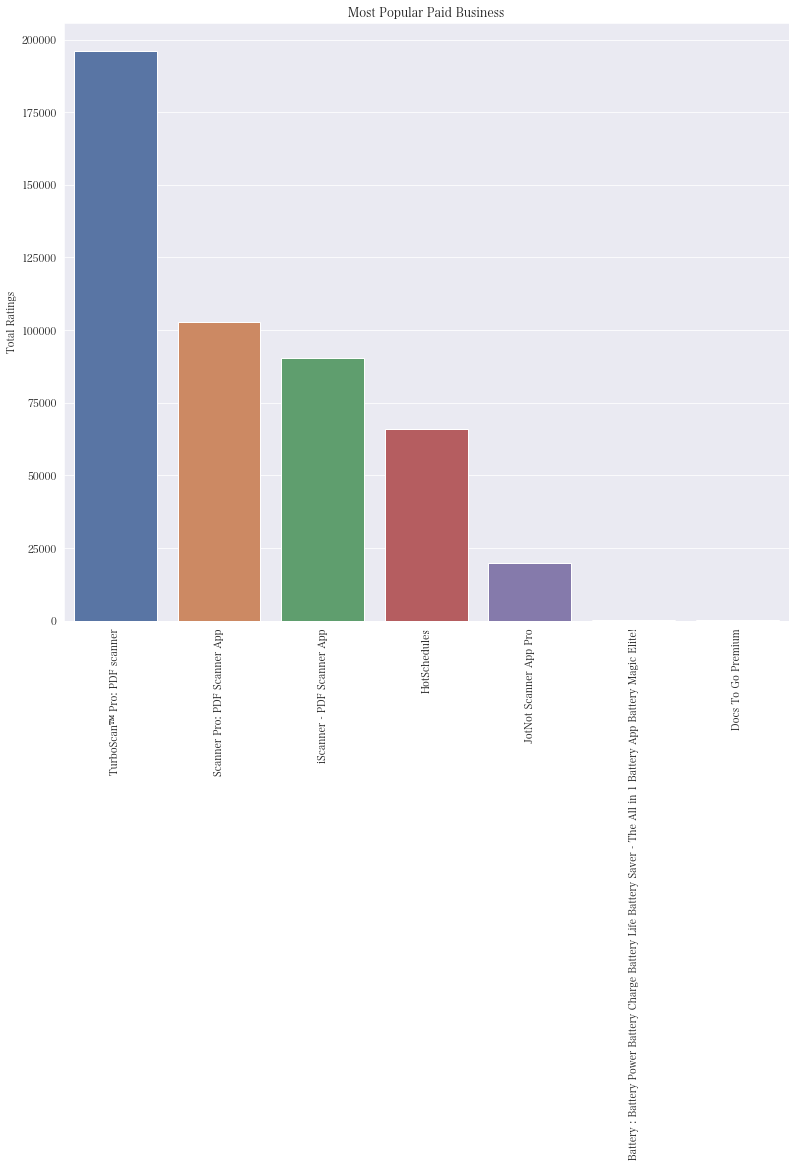

In [91]:
#top paid Business
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_business_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Business')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [92]:
#top free Business
top_free_business_apps =df[(df["category"] ==        '                  Business                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_business_apps.head(10)




age_rating  app_rating                                    category  \
3794          4         4.7                    Business                   
3792          4         4.7                    Business                   
3778          4         4.7                    Business                   
3784          4         4.7                    Business                   
3788          4         4.7                    Business                   
3783          4         4.7                    Business                   
3771          4         4.7                    Business                   
3780          4         4.9                    Business                   
3782          4         4.8                    Business                   
3729          4         4.7                    Business                   

                                          compatibility  \
3794  Requires iOS 11.0 or later. Compatible with iP...   
3792  Requires iOS 12.0 and watchOS 5.0 or later. Co...   
3778  Requires iOS 11.0 or later. Compatible with iP...   
3784  Requires iOS 11.0 or later. Compatible with iP...   
3788  Requires iOS 11.0 or later. Compatible with iP...   
3783  Requires iOS 11.0 or later. Compatible with iP...   
3771  Requires iOS 11.0 or later. Compatible with iP...   
3780  Requires iOS 12.2 or later. Compatible with iP...   
3782  Requires iOS 11.0 or later. Compatible with iP...   
3729  Requires iOS 10.0 or later. Compatible with iP...   

                                              languages  \
3794  English, Arabic, Czech, Danish, Dutch, Finnish...   
3792  English, Czech, Danish, Dutch, Finnish, French...   
3778  English, Bulgarian, Croatian, Czech, Danish, D...   
3784  English, Dutch, French, German, Hindi, Italian...   
3788  English, Arabic, Bulgarian, Cambodian, Croatia...   
3783  English, Dutch, French, German, Italian, Portu...   
3771  English, Arabic, Danish, Dutch, Finnish, Frenc...   
3780  English, Arabic, Danish, Dutch, French, German...   
3782                                            English   
3729                                   English, Spanish   

                                name  price  rank  rating_count   size  \
3794               Indeed Job Search    0.0   1.0     1100000.0   48.8   
3792            ADP Mobile Solutions    0.0   2.0     1100000.0   79.8   
3778                      SAP Concur    0.0  64.0      715700.0  293.9   
3784  Scanner App: PDF Document Scan    0.0  22.0      508800.0  144.1   
3788                     Uber Driver    0.0   5.0      495700.0  222.1   
3783     Glassdoor Jobs - Job Search    0.0  18.0      420100.0   95.0   
3771                         Workday    0.0  10.0      393900.0  179.2   
3780       Genius Scan - PDF Scanner    0.0  43.0      352900.0   49.8   
3782         ZipRecruiter Job Search    0.0   7.0      331900.0   91.0   
3729                          Paycom    0.0  36.0      293700.0  213.9   

      num_languages  boolean_rank  free_or_not  
3794             29          True         True  
3792             24          True         True  
3778             25          True         True  
3784             14          True         True  
3788             38          True         True  
3783              7          True         True  
3771             25          True         True  
3780             19          True         True  
3782              1          True         True  
3729              2          True         True

Text(0.5, 0, '')

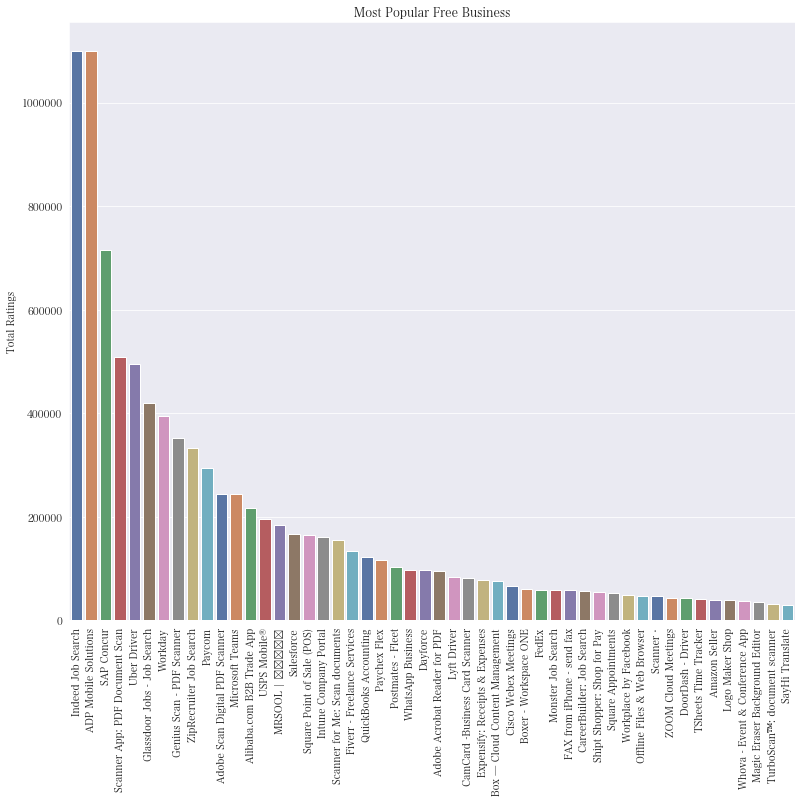

In [93]:
#top free Business
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_business_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Business')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [94]:
#top paid Education
top_paid_education_apps =df[(df["category"] ==        '                  Education                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_education_apps.head(10)






age_rating  app_rating                                     category  \
3401          4         4.6                    Education                   
3335          4         4.3                    Education                   
3354          4         4.2                    Education                   
3443          4         4.4                    Education                   
3449          4         4.1                    Education                   
3452          4         3.9                    Education                   

                                          compatibility  \
3401  Requires iOS 12.0 or later. Compatible with iP...   
3335  Requires iOS 7.0 or later. Compatible with iPh...   
3354  Requires iOS 6.0 or later. Compatible with iPh...   
3443  Requires iOS 6.0 or later. Compatible with iPh...   
3449  Requires iOS 6.0 or later. Compatible with iPh...   
3452  Requires iOS 8.0 or later. Compatible with iPh...   

                                              languages  \
3401                                            English   
3335  English, Danish, Finnish, French, German, Indo...   
3354  English, Danish, Finnish, French, German, Indo...   
3443                                            English   
3449  English, Danish, Finnish, French, German, Indo...   
3452                                            English   

                           name  price  rank  rating_count   size  \
3401                   SkyView®   1.99   2.0        2700.0   81.2   
3335          Toca Hair Salon 3   3.99   1.0        1600.0  129.8   
3354             Toca Kitchen 2   3.99   3.0        1200.0  111.8   
3443          Stack the States®   2.99  10.0        1000.0  132.6   
3449          Toca Hair Salon 2   3.99  50.0         691.0   92.6   
3452  Monkey Preschool Lunchbox   1.99  44.0         163.0  246.4   

      num_languages  boolean_rank  free_or_not  
3401              1          True        False  
3335             18          True        False  
3354             18          True        False  
3443              1          True        False  
3449             18          True        False  
3452              1          True        False

Text(0.5, 0, '')

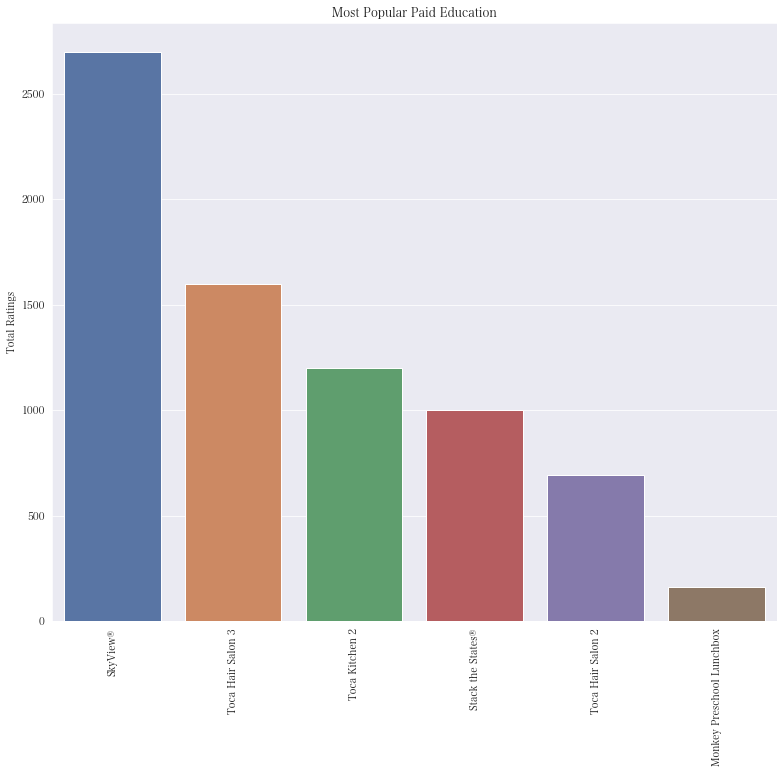

In [95]:
#top paid Education
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_education_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Education')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [96]:
#top free Education
top_free_education_apps =df[(df["category"] ==        '                  Education                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_education_apps.head(10)





age_rating  app_rating                                     category  \
3550          4         4.8                    Education                   
3549          4         4.7                    Education                   
3556          4         4.7                    Education                   
3555          4         4.8                    Education                   
3552          4         4.8                    Education                   
3530          4         4.6                    Education                   
3554          4         4.8                    Education                   
3543          4         4.5                    Education                   
3536          4         4.7                    Education                   
3540          4         4.8                    Education                   

                                          compatibility  \
3550  Requires iOS 11.0 or later. Compatible with iP...   
3549  Requires iOS 12.0 or later. Compatible with iP...   
3556  Requires iOS 11.0 or later. Compatible with iP...   
3555  Requires iOS 10.0 or later. Compatible with iP...   
3552  Requires iOS 11.0 or later. Compatible with iP...   
3530  Requires iOS 11.0 or later. Compatible with iP...   
3554  Requires iOS 10.0 or later. Compatible with iP...   
3543  Requires iOS 9.0 or later. Compatible with iPh...   
3536  Requires iOS 9.3 or later. Compatible with iPh...   
3540  Requires iOS 11.0 and watchOS 2.0 or later. Co...   

                                              languages  \
3550  English, Arabic, Bengali, Bulgarian, Catalan, ...   
3549  English, Arabic, Chinese, Danish, Dutch, Finni...   
3556  English, Arabic, Czech, Dutch, French, German,...   
3555  English, French, German, Portuguese, Simplifie...   
3552  English, Dutch, French, German, Indonesian, It...   
3530  English, Arabic, Bulgarian, Catalan, Czech, Da...   
3554  English, Arabic, Croatian, Czech, Danish, Dutc...   
3543                                            English   
3536  English, Hindi, Japanese, Korean, Simplified C...   
3540                                   English, Spanish   

                                name  price  rank  rating_count   size  \
3550                       ClassDojo    0.0  26.0     1100000.0  189.5   
3549                  Canvas Student    0.0  12.0     1100000.0  124.6   
3556                        Duolingo    0.0   1.0      674400.0  104.0   
3555    Remind: School Communication    0.0   6.0      392300.0  159.9   
3552                         Quizlet    0.0   9.0      297900.0  107.0   
3530                      Blackboard    0.0  30.0      236000.0  123.8   
3554                       Photomath    0.0   2.0      213100.0  101.4   
3543                    ABCmouse.com    0.0  34.0      185400.0  598.9   
3536  Epic! - Kids’ Books and Videos    0.0  20.0      172200.0  358.6   
3540        Elevate - Brain Training    0.0  15.0      153400.0  393.8   

      num_languages  boolean_rank  free_or_not  
3550             26          True         True  
3549             19          True         True  
3556             24          True         True  
3555              6          True         True  
3552             16          True         True  
3530             30          True         True  
3554             32          True         True  
3543              1          True         True  
3536              7          True         True  
3540              2          True         True

Text(0.5, 0, '')

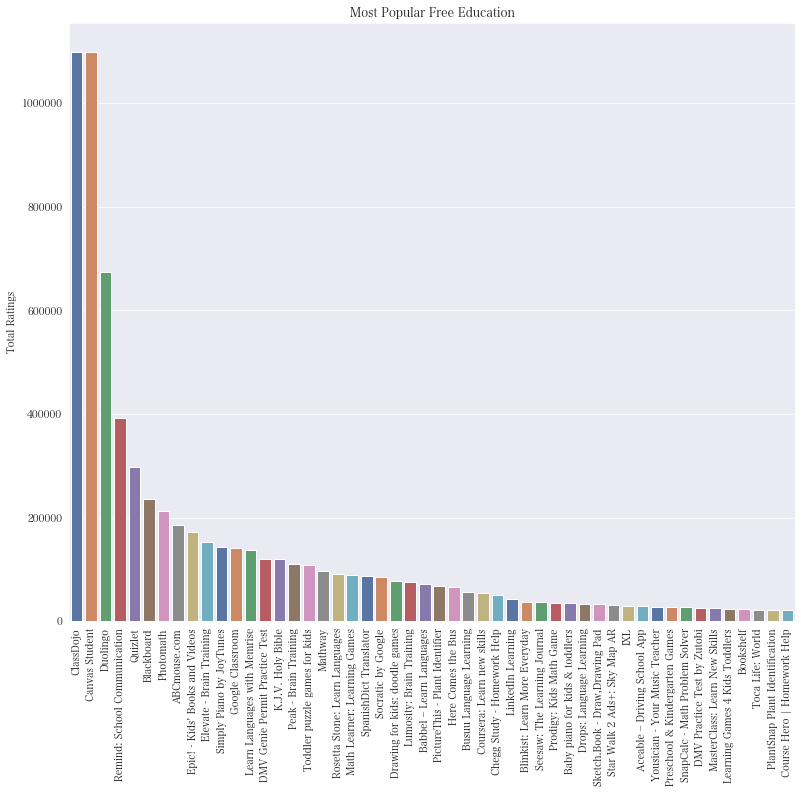

In [97]:
#top free Education
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_education_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Education')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [98]:
#top paid Food & Drink
top_paid_food_apps =df[(df["category"] ==        '                  Food & Drink                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_food_apps.head(10)







age_rating  app_rating                                        category  \
2614          4         4.9                    Food & Drink                   
2613          4         4.7                    Food & Drink                   
2661          1         3.1                    Food & Drink                   

                                          compatibility  \
2614  Requires iOS 12.0 and watchOS 5.0 or later. Co...   
2613  Requires iOS 10.0 or later. Compatible with iP...   
2661  Requires iOS 9.3 or later. Compatible with iPh...   

                        languages                                  name  \
2614             English, Spanish        Fit Men Cook - Healthy Recipes   
2613                      English           Forks Over Knives (Recipes)   
2661  English, French, Portuguese  Mixologist™ Drink & Cocktail Recipes   

      price  rank  rating_count   size  num_languages  boolean_rank  \
2614   3.99   3.0       10900.0  190.0              2          True   
2613   4.99   1.0         825.0  171.4              1          True   
2661   0.99  12.0          40.0   30.9              3          True   

      free_or_not  
2614        False  
2613        False  
2661        False

Text(0.5, 0, '')

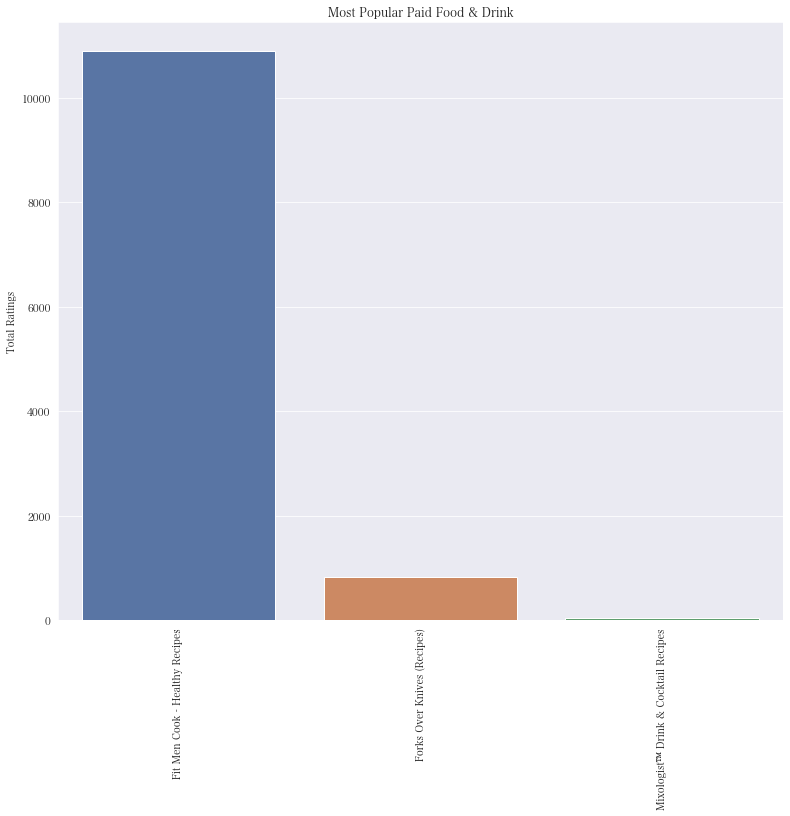

In [99]:
#top paid Food & Drink
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_food_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Food & Drink')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [100]:
#top free Food & Drink
top_free_food_apps =df[(df["category"] ==        '                  Food & Drink                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_food_apps.head(10)





age_rating  app_rating                                        category  \
2839          1         4.8                    Food & Drink                   
2837          4         4.8                    Food & Drink                   
2841          4         4.8                    Food & Drink                   
2840          4         4.8                    Food & Drink                   
2836          4         4.7                    Food & Drink                   
2833          4         4.9                    Food & Drink                   
2832          1         4.7                    Food & Drink                   
2835          4         4.9                    Food & Drink                   
2834          1         4.8                    Food & Drink                   
2827          4         4.9                    Food & Drink                   

                                          compatibility  \
2839  Requires iOS 11.0 or later. Compatible with iP...   
2837  Requires iOS 10.0 and watchOS 3.0 or later. Co...   
2841  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
2840  Requires iOS 11.0 or later. Compatible with iP...   
2836  Requires iOS 10.0 or later. Compatible with iP...   
2833  Requires iOS 12.0 or later. Compatible with iP...   
2832  Requires iOS 10.0 or later. Compatible with iP...   
2835  Requires iOS 11.0 or later. Compatible with iP...   
2834  Requires iOS 10.0 or later. Compatible with iP...   
2827  Requires iOS 10.0 or later. Compatible with iP...   

                                              languages  \
2839                           English, French, Spanish   
2837                                   English, Spanish   
2841                                    English, French   
2840  English, Arabic, Azerbaijani, Bulgarian, Croat...   
2836                                            English   
2833  English, Dutch, French, German, Italian, Japan...   
2832  English, Arabic, Burmese, Cambodian, Chinese, ...   
2835                                            English   
2834                                   English, Spanish   
2827                                            English   

                              name  price  rank  rating_count   size  \
2839      DoorDash - Food Delivery    0.0   1.0     5100000.0  258.5   
2837            Domino's Pizza USA    0.0   9.0     3900000.0  205.5   
2841                     Starbucks    0.0   4.0     3100000.0  182.6   
2840      Uber Eats: Food Delivery    0.0   2.0     1600000.0  192.9   
2836  Grubhub: Local Food Delivery    0.0   3.0     1600000.0  182.3   
2833                     OpenTable    0.0  21.0     1400000.0   81.0   
2832                     Pizza Hut    0.0  10.0     1300000.0   66.4   
2835                   Chick-fil-A    0.0   6.0      948100.0   46.6   
2834     Postmates - Food Delivery    0.0   7.0      847900.0  171.5   
2827                  Panera Bread    0.0  27.0      712400.0  147.0   

      num_languages  boolean_rank  free_or_not  
2839              3          True         True  
2837              2          True         True  
2841              2          True         True  
2840             34          True         True  
2836              1          True         True  
2833              7          True         True  
2832             30          True         True  
2835              1          True         True  
2834              2          True         True  
2827              1          True         True

Text(0.5, 0, '')

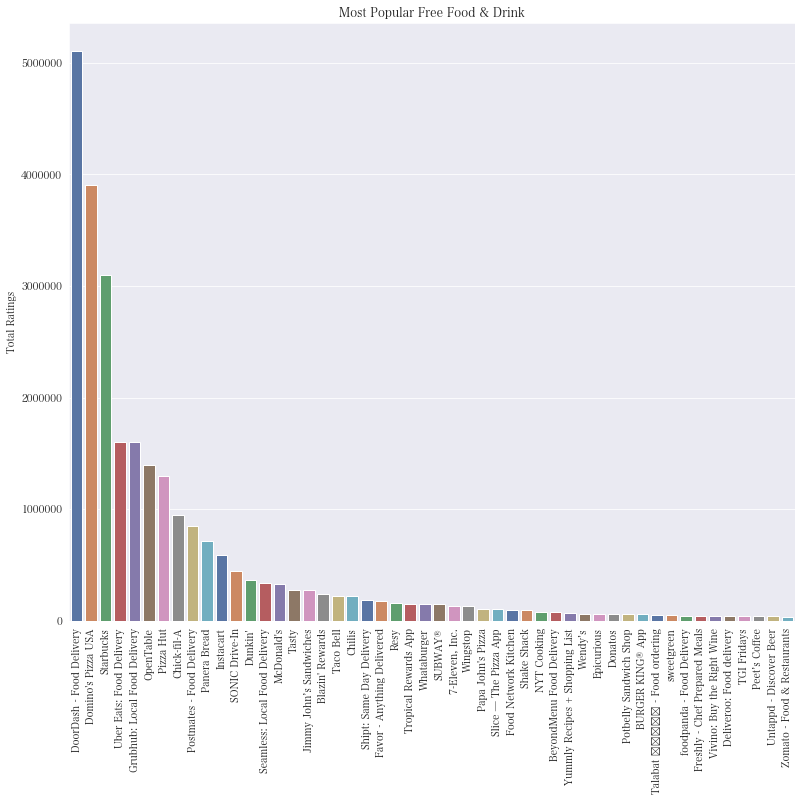

In [101]:
#top free Food & Drink
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_food_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Food & Drink')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [102]:
#top paid Magazines & Newspapers
top_paid_magazines_apps =df[(df["category"] ==        '                  Magazines & Newspapers                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_magazines_apps.head(10)







Empty DataFrame
Columns: [age_rating, app_rating, category, compatibility, languages, name, price, rank, rating_count, size, num_languages, boolean_rank, free_or_not]
Index: []

ValueError: min() arg is an empty sequence

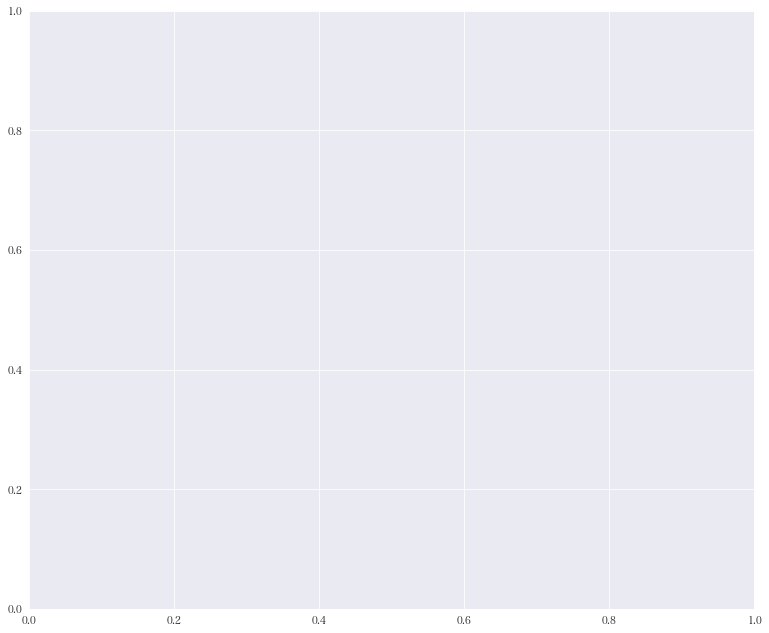

In [103]:
#top paid Magazines & Newspapers
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_magazines_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Magazines & Newspapers')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [104]:
#top free Magazines & Newspapers
top_free_magazines_apps =df[(df["category"] ==        '                  Magazines & Newspapers                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_magazines_apps.head(10)




age_rating  app_rating  \
1881          1         4.5   
1766          4         4.9   
1787          1         4.8   
1784          9         4.5   
1882          1         1.5   
1865          1         4.1   
1734          1         4.7   
1675          4         4.0   
1689          4         4.3   
1732          1         4.2   

                                               category  \
1881                    Magazines & Newspapers      ...   
1766                    Magazines & Newspapers      ...   
1787                    Magazines & Newspapers      ...   
1784                    Magazines & Newspapers      ...   
1882                    Magazines & Newspapers      ...   
1865                    Magazines & Newspapers      ...   
1734                    Magazines & Newspapers      ...   
1675                    Magazines & Newspapers      ...   
1689                    Magazines & Newspapers      ...   
1732                    Magazines & Newspapers      ...   

                                          compatibility  \
1881  Requires iOS 10.3 or later. Compatible with iP...   
1766  Requires iOS 10.0 or later. Compatible with iP...   
1787  Requires iOS 11.0 or later. Compatible with iP...   
1784  Requires iOS 11.0 or later. Compatible with iP...   
1882  Requires iOS 10.0 or later. Compatible with iP...   
1865  Requires iOS 9.1 or later. Compatible with iPh...   
1734  Requires iOS 11.0 and watchOS 6.0 or later. Co...   
1675  Requires iOS 11.0 or later. Compatible with iP...   
1689  Requires iOS 11.0 or later. Compatible with iP...   
1732  Requires iOS 9.1 or later. Compatible with iPh...   

                                              languages  \
1881  English, Catalan, Danish, Dutch, Finnish, Fren...   
1766                                            English   
1787           English, Dutch, German, Italian, Swedish   
1784                                            English   
1882                                            English   
1865  English, Danish, French, German, Hungarian, It...   
1734                                            English   
1675                                            English   
1689                                            English   
1732  English, Danish, French, German, Hungarian, It...   

                                name  price   rank  rating_count   size  \
1881      ZINIO - Magazine Newsstand    0.0   45.0        9600.0  143.0   
1766  The Word Among Us Mass Edition    0.0   22.0        5000.0   34.5   
1787                          Readly    0.0  168.0        2100.0   21.7   
1784               New York Magazine    0.0  182.0        1700.0   50.1   
1882             National Geographic    0.0   14.0         821.0  121.5   
1865      Lifestyle For Men Magazine    0.0    8.0         740.0   79.9   
1734    Curio: hear great journalism    0.0   26.0         471.0   66.7   
1675       Fast Company Magazine App    0.0  177.0         352.0   51.1   
1689                  InTouch Weekly    0.0    NaN         130.0   50.4   
1732     Swimsuits & Sports Magazine    0.0   29.0          89.0   69.1   

      num_languages  boolean_rank  free_or_not  
1881             17          True         True  
1766              1          True         True  
1787              5          True         True  
1784              1          True         True  
1882              1          True         True  
1865             11          True         True  
1734              1          True         True  
1675              1          True         True  
1689              1         False         True  
1732             11          True         True

Text(0.5, 0, '')

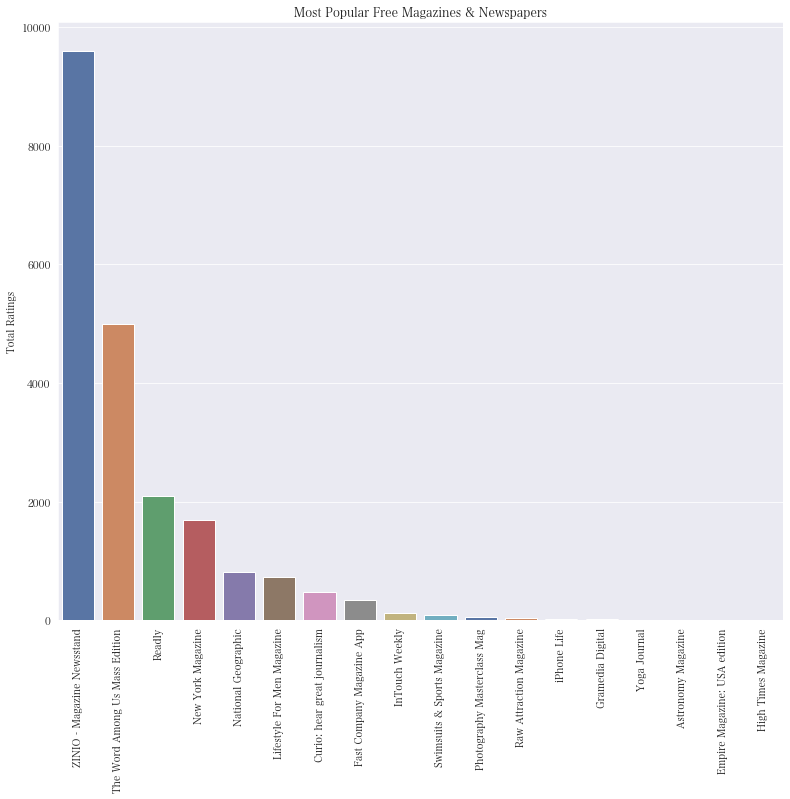

In [105]:
#top free Magazines & Newspapers
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_magazines_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Magazines & Newspapers')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [106]:
#top paid Music
top_paid_music_apps =df[(df["category"] ==        '                  Music                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_music_apps.head(10)







age_rating  app_rating                                 category  \
1343          1         4.7                    Music                   
1182          4         4.9                    Music                   
1222          9         4.9                    Music                   
1298          4         4.6                    Music                   
1211          4         4.0                    Music                   
1253          4         4.2                    Music                   
1255          4         3.9                    Music                   

                                          compatibility  \
1343  Requires iOS 10.3 and watchOS 3.2 or later. Co...   
1182  Requires iOS 10.0 and watchOS 3.0 or later. Co...   
1222  Requires iOS 12.0 and watchOS 5.0 or later. Co...   
1298  Requires iOS 8.0 or later. Compatible with iPh...   
1211  Requires iOS 9.0 or later. Compatible with iPh...   
1253  Requires iOS 9.0 or later. Compatible with iPh...   
1255  Requires iOS 6.0 or later. Compatible with iPh...   

                                              languages  \
1343  English, French, German, Italian, Japanese, Ko...   
1182  English, French, German, Italian, Japanese, Si...   
1222  English, Czech, Danish, Dutch, Finnish, French...   
1298                                            English   
1211  English, Chinese, Danish, Dutch, French, Germa...   
1253                                            English   
1255                          English, French, Japanese   

                                              name  price   rank  \
1343                   TuneIn Pro - Radio & Sports   9.99   13.0   
1182                 TonalEnergy Tuner & Metronome   3.99    1.0   
1222                 SoundHound∞ - Music Discovery   6.99    NaN   
1298                     Ringtone Designer Pro 2.0   0.99    NaN   
1211                                     Cleartune   3.99    8.0   
1253                  Tap DJ - Mix & Scratch Music   1.99  132.0   
1255  PocketGuitar - Virtual Guitar in Your Pocket   0.99    NaN   

      rating_count   size  num_languages  boolean_rank  free_or_not  
1343       36400.0  131.4             12          True        False  
1182       19300.0   97.5              8          True        False  
1222       10200.0   75.0             23         False        False  
1298        2600.0    1.2              1         False        False  
1211         627.0    9.8             10          True        False  
1253         173.0   32.0              1          True        False  
1255          14.0   10.5              3         False        False

Text(0.5, 0, '')

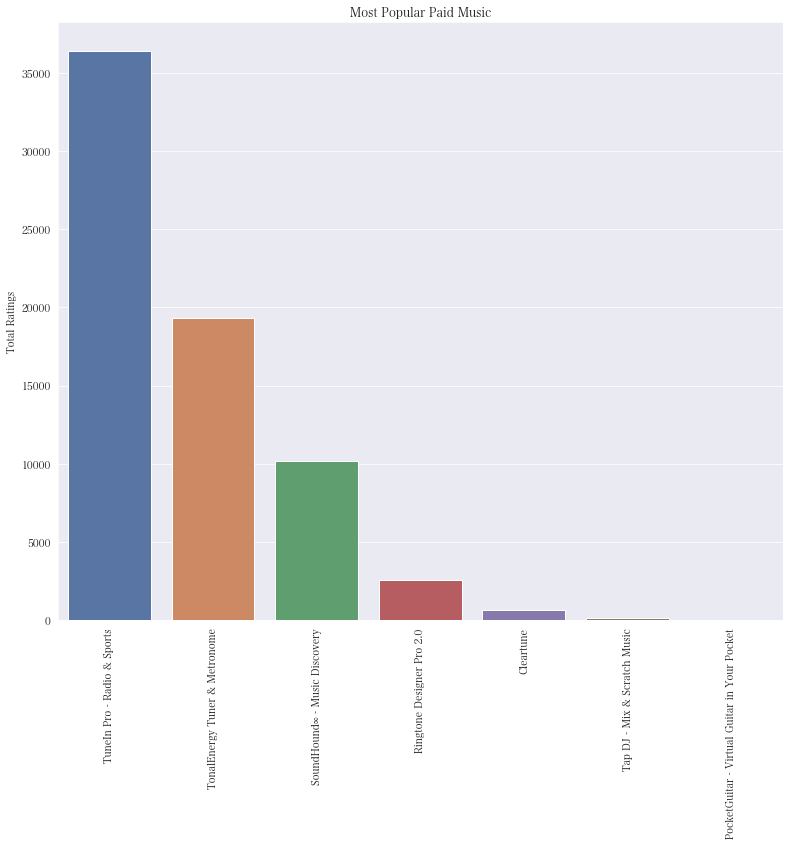

In [107]:
#top paid Music
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_music_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Music')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [108]:
#top free Music
top_free_music_apps =df[(df["category"] ==        '                  Music                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_music_apps.head(10)





age_rating  app_rating                                 category  \
1412          1         4.8                    Music                   
1413          1         4.8                    Music                   
1410          1         4.9                    Music                   
1399          1         4.8                    Music                   
1400          1         4.8                    Music                   
1405          4         4.7                    Music                   
1390          4         4.8                    Music                   
1358          4         4.8                    Music                   
1401          1         4.7                    Music                   
1382          1         4.9                    Music                   

                                          compatibility  \
1412  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
1413  Requires iOS 11.0 and watchOS 5.0 or later. Co...   
1410  Requires iOS 11.0 and watchOS 5.0 or later. Co...   
1399  Requires iOS 11.0 or later. Compatible with iP...   
1400  Requires iOS 9.0 or later. Compatible with iPh...   
1405  Requires iOS 11.0 or later. Compatible with iP...   
1390  Requires iOS 10.0 or later. Compatible with iP...   
1358  Requires iOS 11.0 and watchOS 2.0 or later. Co...   
1401  Requires iOS 10.3 and watchOS 3.2 or later. Co...   
1382  Requires iOS 9.0 or later. Compatible with iPh...   

                                              languages  \
1412  English, Arabic, Czech, Dutch, Finnish, French...   
1413                                            English   
1410  English, Czech, Dutch, French, German, Italian...   
1399                                            English   
1400                                    English, French   
1405  English, French, German, Italian, Japanese, Po...   
1390  English, Czech, Danish, Dutch, Finnish, French...   
1358                                            English   
1401  English, French, German, Italian, Japanese, Ko...   
1382  English, Arabic, Bengali, Bulgarian, Catalan, ...   

                                name  price  rank  rating_count   size  \
1412     Spotify: Music and Podcasts    0.0   1.0    10400000.0  110.0   
1413       Pandora: Music & Podcasts    0.0   4.0     6200000.0  239.6   
1410                          Shazam    0.0   8.0     4100000.0   57.6   
1399   Musi - Simple Music Streaming    0.0   7.0     1300000.0   32.1   
1400  SiriusXM-Music, Comedy, Sports    0.0  19.0     1300000.0  297.8   
1405                    Amazon Alexa    0.0   2.0     1000000.0  250.7   
1390                Sonos Controller    0.0  31.0      685100.0  152.1   
1358                     Radio Javan    0.0   NaN      501100.0   48.8   
1401   TuneIn - NFL Radio & Podcasts    0.0  23.0      456400.0  131.5   
1382                      TouchTunes    0.0  26.0      413400.0  119.1   

      num_languages  boolean_rank  free_or_not  
1412             23          True         True  
1413              1          True         True  
1410             16          True         True  
1399              1          True         True  
1400              2          True         True  
1405              7          True         True  
1390             16          True         True  
1358              1         False         True  
1401             12          True         True  
1382             46          True         True

Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1630 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 1630 missing from current font.
  font.set_text(s, 0, flags=flags)


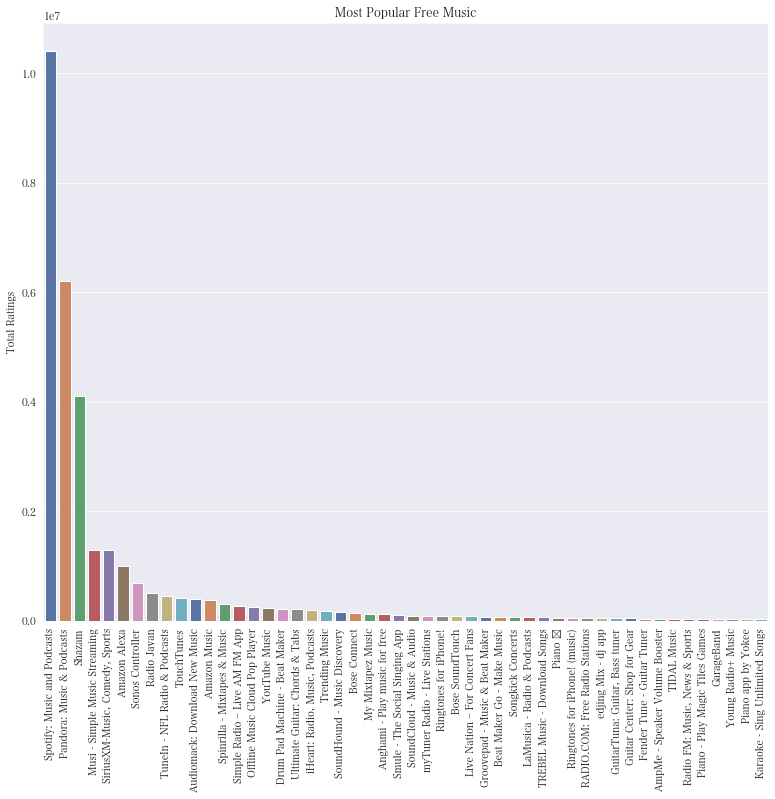

In [109]:
#top free Music
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_music_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Music')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [110]:
#top paid Navigation
top_paid_navigation_apps =df[(df["category"] ==        '                  Navigation                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_navigation_apps.head(10)







age_rating  app_rating                                      category  \
1046          4         4.8                    Navigation                   
1023          4         4.7                    Navigation                   
956           4         4.8                    Navigation                   
1129          4         4.3                    Navigation                   
1091          4         4.3                    Navigation                   
1073          4         3.1                    Navigation                   
957           4         2.8                    Navigation                   
955           4         3.7                    Navigation                   

                                          compatibility  \
1046  Requires iOS 9.3 or later. Compatible with iPh...   
1023  Requires iOS 8.2 or later. Compatible with iPh...   
956   Requires iOS 11.4 or later. Compatible with iP...   
1129  Requires iOS 11.0 and watchOS 3.0 or later. Co...   
1091  Requires iOS 9.3 and watchOS 4.2 or later. Com...   
1073  Requires iOS 9.0 or later. Compatible with iPh...   
957   Requires iOS 9.0 or later. Compatible with iPh...   
955   Requires iOS 8.0 and watchOS 2.0 or later. Com...   

                                              languages  \
1046  English, Danish, Dutch, French, German, Italia...   
1023  English, Dutch, French, German, Italian, Japan...   
956                                             English   
1129                                            English   
1091  English, Czech, French, German, Italian, Japan...   
1073          English, French, German, Italian, Spanish   
957   English, Danish, Dutch, French, German, Greek,...   
955                                             English   

                           name  price   rank  rating_count   size  \
1046     GoSkyWatch Planetarium   3.99   49.0        6100.0  102.9   
1023                   Spyglass   5.99   37.0        1900.0   22.7   
956                  Theodolite   7.99   10.0         697.0   31.4   
1129                MotionX GPS   1.99    6.0         560.0   64.3   
1091                 Ski Tracks   0.99    1.0         325.0   35.1   
1073                Boating USA  14.99    2.0         161.0  140.4   
957   Phone Tracker for iPhones   3.99   29.0          53.0   12.8   
955                  Tide Graph   1.99  122.0          18.0   15.5   

      num_languages  boolean_rank  free_or_not  
1046             10          True        False  
1023             10          True        False  
956               1          True        False  
1129              1          True        False  
1091              9          True        False  
1073              5          True        False  
957              18          True        False  
955               1          True        False

Text(0.5, 0, '')

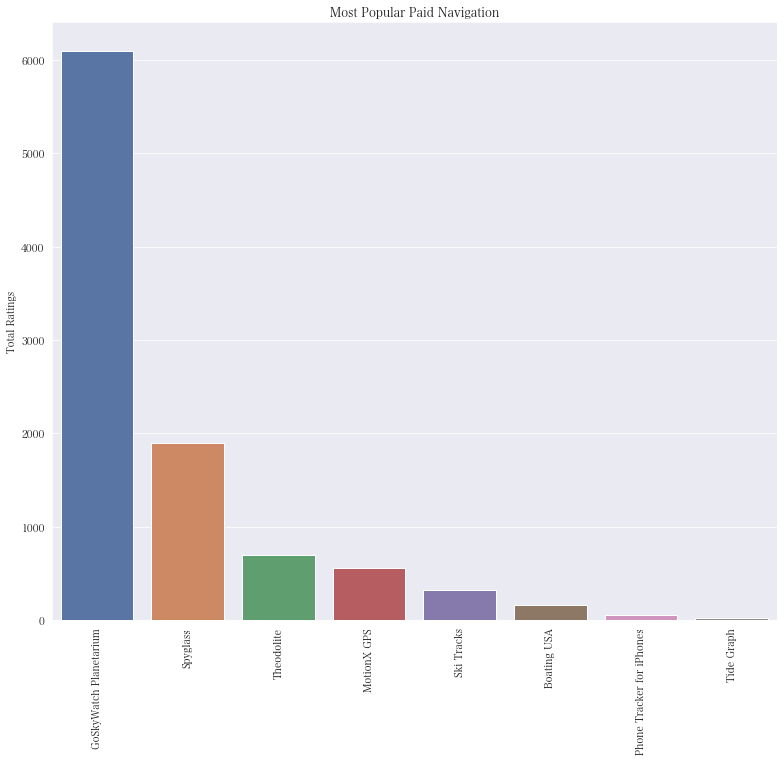

In [111]:
#top paid Navigation
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_navigation_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Navigation')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [112]:
#top free Navigation
top_free_navigation_apps =df[(df["category"] ==        '                  Navigation                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_navigation_apps.head(10)






age_rating  app_rating                                      category  \
1172          4         4.7                    Navigation                   
1174          4         4.8                    Navigation                   
1173          4         4.7                    Navigation                   
1139          4         4.6                    Navigation                   
1155          4         4.9                    Navigation                   
1168          4         4.6                    Navigation                   
1169          4         4.7                    Navigation                   
1146          4         4.8                    Navigation                   
1164          4         4.9                    Navigation                   
1141          4         4.8                    Navigation                   

                                          compatibility  \
1172  Requires iOS 10.0 or later. Compatible with iP...   
1174  Requires iOS 11.0 or later. Compatible with iP...   
1173  Requires iOS 11.0 or later. Compatible with iP...   
1139  Requires iOS 10.0 and watchOS 3.1 or later. Co...   
1155  Requires iOS 11.0 or later. Compatible with iP...   
1168  Requires iOS 10.0 and watchOS 2.0 or later. Co...   
1169  Requires iOS 10.0 and watchOS 6.1 or later. Co...   
1146  Requires iOS 11.0 or later. Compatible with iP...   
1164  Requires iOS 11.0 and watchOS 3.0 or later. Co...   
1141  Requires iOS 10.0 or later. Compatible with iP...   

                                              languages  \
1172  English, Arabic, Catalan, Chinese (Hong Kong),...   
1174  English, Afrikaans, Arabic, Bulgarian, Catalan...   
1173                                    English, German   
1139  English, Arabic, Basque, Catalan, Chinese, Cze...   
1155                                            English   
1168  English, French, German, Italian, Japanese, Ko...   
1169  English, French, German, Italian, Portuguese, ...   
1146                                            English   
1164                                            English   
1141                                            English   

                                name  price  rank  rating_count   size  \
1172    Google Maps - Transit & Food    0.0   1.0     2900000.0  247.6   
1174  Waze Navigation & Live Traffic    0.0   2.0     2200000.0  131.1   
1173       ParkMobile - Find Parking    0.0   3.0      657400.0   78.7   
1139  Radarbot Speed Camera Detector    0.0  20.0       72300.0   54.6   
1155       ParkWhiz - #1 Parking App    0.0  14.0       69900.0   87.2   
1168         New York Subway MTA Map    0.0  22.0       66300.0  114.0   
1169    Transit • Bus & Subway Times    0.0   6.0       65200.0  138.8   
1146            Exxon Mobil Rewards+    0.0  15.0       62900.0  105.3   
1164  SpotHero: #1 Rated Parking App    0.0   7.0       54100.0  109.2   
1141                    Trucker Path    0.0  32.0       49200.0  348.7   

      num_languages  boolean_rank  free_or_not  
1172             34          True         True  
1174             41          True         True  
1173              2          True         True  
1139             26          True         True  
1155              1          True         True  
1168              9          True         True  
1169              6          True         True  
1146              1          True         True  
1164              1          True         True  
1141              1          True         True

Text(0.5, 0, '')

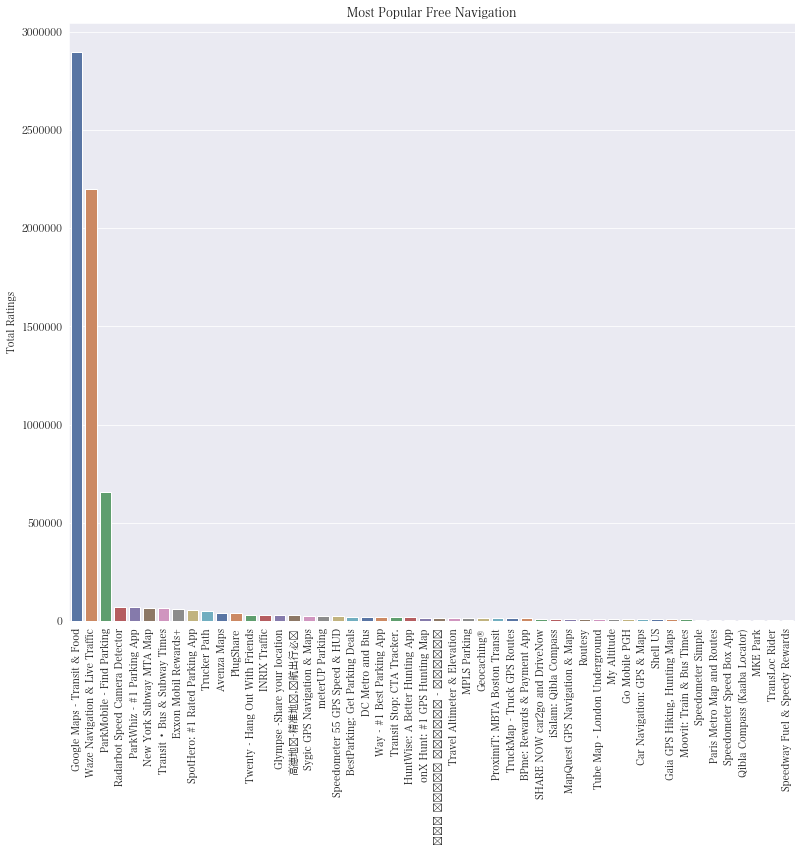

In [114]:
#top free Navigation
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_navigation_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Navigation')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [115]:
#top paid Photo & Video
top_paid_photo_apps =df[(df["category"] ==        '                  Photo & Video                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_photo_apps.head(10)







age_rating  app_rating                                         category  \
623          4         4.9                    Photo & Video                   
531          4         4.8                    Photo & Video                   
588          4         4.9                    Photo & Video                   
564          4         4.8                    Photo & Video                   
669          4         4.3                    Photo & Video                   
518          1         4.5                    Photo & Video                   

                                         compatibility  \
623  Requires iOS 9.0 or later. Compatible with iPh...   
531  Requires iOS 12.0 or later. Compatible with iP...   
588  Requires iOS 9.0 or later. Compatible with iPh...   
564  Requires iOS 10.0 or later. Compatible with iP...   
669  Requires iOS 12.1 and watchOS 2.0 or later. Co...   
518  Requires iOS 8.0 or later. Compatible with iPh...   

                                             languages                 name  \
623  English, French, German, Italian, Japanese, Ko...             Facetune   
531  English, Arabic, Czech, Dutch, French, German,...         TouchRetouch   
588                          English, French, Japanese         Color Splash   
564  English, Dutch, French, German, Indonesian, It...  Hipstamatic Classic   
669  English, French, German, Italian, Japanese, Ko...       Camera+ Legacy   
518  English, Chinese, Dutch, French, German, Itali...       Face Swap Live   

     price   rank  rating_count   size  num_languages  boolean_rank  \
623   3.99    2.0      116400.0   62.1             12          True   
531   1.99    1.0        9200.0   23.6             18          True   
588   0.99   75.0        4500.0   45.9              3          True   
564   2.99   65.0        3200.0  169.6             15          True   
669   2.99   48.0        2100.0   99.1             10          True   
518   0.99  103.0         780.0   95.5             13          True   

     free_or_not  
623        False  
531        False  
588        False  
564        False  
669        False  
518        False

Text(0.5, 0, '')

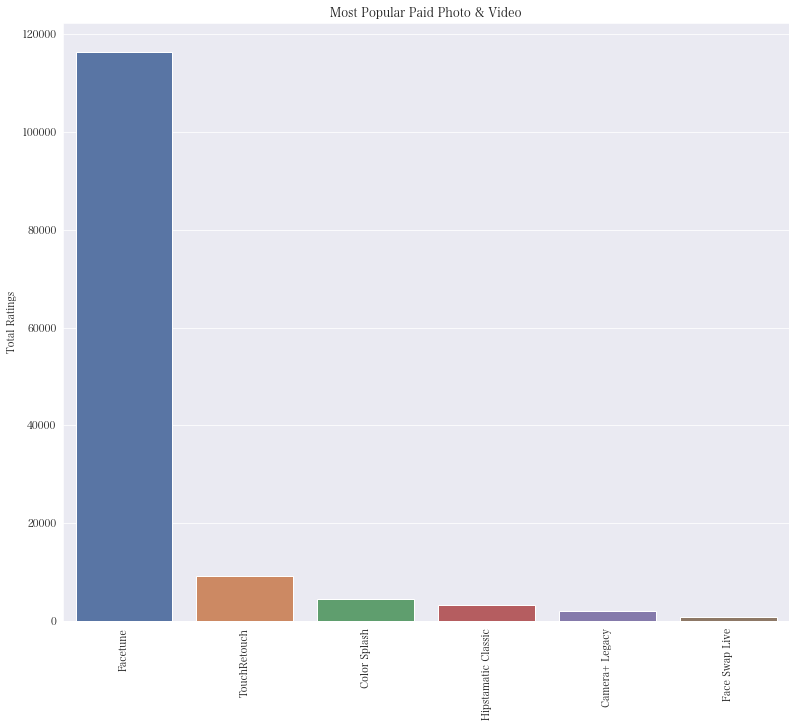

In [116]:
#top paid Photo & Video
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_photo_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Photo & Video')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [117]:
#top free Photo & Video
top_free_photo_apps =df[(df["category"] ==        '                  Photo & Video                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_photo_apps.head(10)







age_rating  app_rating                                         category  \
726          1         4.8                    Photo & Video                   
728          1         4.7                    Photo & Video                   
722          1         4.8                    Photo & Video                   
712          4         4.7                    Photo & Video                   
714          1         4.7                    Photo & Video                   
697          4         4.8                    Photo & Video                   
720          4         4.8                    Photo & Video                   
705          1         4.8                    Photo & Video                   
676          4         4.8                    Photo & Video                   
680          4         4.9                    Photo & Video                   

                                         compatibility  \
726  Requires iOS 11.0 or later. Compatible with iP...   
728  Requires iOS 11.0 or later. Compatible with iP...   
722  Requires iOS 10.3 or later. Compatible with iP...   
712  Requires iOS 11.0 or later. Compatible with iP...   
714  Requires iOS 11.4 or later. Compatible with iP...   
697  Requires iOS 10.0 or later. Compatible with iP...   
720  Requires iOS 11.2 or later. Compatible with iP...   
705  Requires iOS 11.0 or later. Compatible with iP...   
676  Requires iOS 9.0 or later. Compatible with iPh...   
680  Requires iOS 11.3 or later. Compatible with iP...   

                                             languages  \
726  English, Croatian, Czech, Danish, Dutch, Finni...   
728  English, Afrikaans, Albanian, Amharic, Arabic,...   
722  English, French, German, Italian, Japanese, Ko...   
712  English, Arabic, Dutch, French, German, Hebrew...   
714  English, Bulgarian, Czech, Danish, Dutch, Finn...   
697  English, Arabic, French, German, Indonesian, I...   
720  English, Czech, Danish, Dutch, Filipino, Finni...   
705  English, Arabic, Danish, French, German, Itali...   
676                                   English, Spanish   
680  English, Afrikaans, Albanian, Armenian, Azerba...   

                               name  price   rank  rating_count   size  \
726                       Instagram    0.0    3.0    15000000.0  123.8   
728  YouTube: Watch, Listen, Stream    0.0    2.0    11300000.0  205.3   
722  PicCollage Grid & Photo Editor    0.0   16.0      896900.0  267.1   
712        FaceApp - AI Face Editor    0.0   95.0      816500.0  133.0   
714     Twitch: Live Game Streaming    0.0   12.0      741700.0  156.9   
697           InShot - Video Editor    0.0   18.0      620500.0  113.2   
720  Photoshop Express Photo Editor    0.0   28.0      514900.0  265.6   
705  Private Photo Vault - Pic Safe    0.0  114.0      500600.0   89.0   
676   FreePrints – Photos Delivered    0.0   73.0      399500.0  261.1   
680  Canva - Graphic Design Creator    0.0   38.0      342300.0  308.8   

     num_languages  boolean_rank  free_or_not  
726             31          True         True  
728             73          True         True  
722             12          True         True  
712             22          True         True  
714             26          True         True  
697             16          True         True  
720             27          True         True  
705             12          True         True  
676              2          True         True  
680             47          True         True

Text(0.5, 0, '')

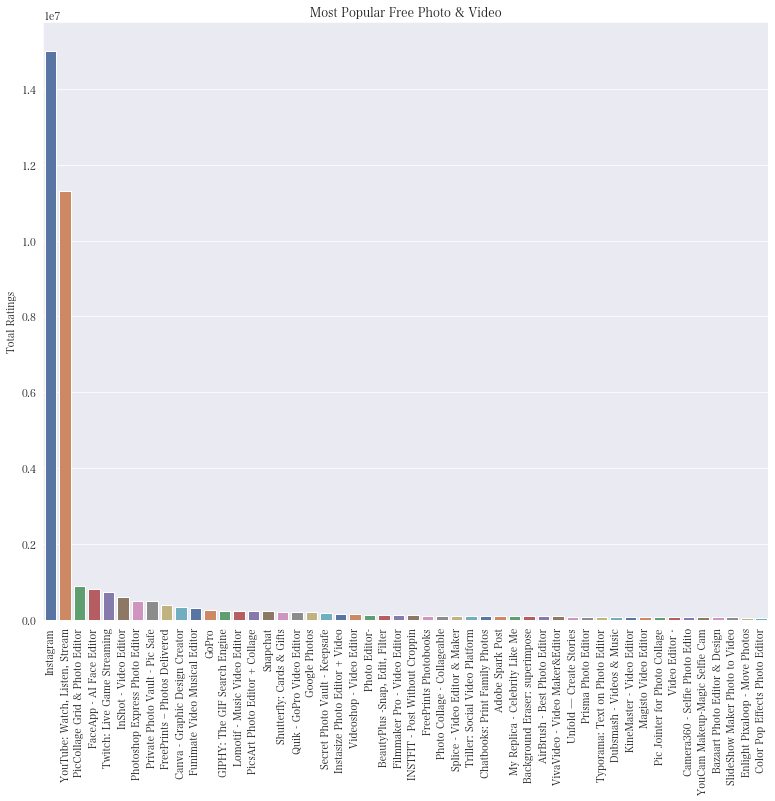

In [118]:
#top free Photo & Video
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_photo_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Photo & Video')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [119]:
#top paid Reference
top_paid_reference_apps =df[(df["category"] ==        '                  Reference                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_reference_apps.head(10)







age_rating  app_rating                                     category  \
232          4         4.9                    Reference                   
97           4         4.6                    Reference                   
52           4         4.7                    Reference                   
159          4         4.6                    Reference                   
218          9         4.1                    Reference                   
106          4         4.3                    Reference                   
78           9         4.7                    Reference                   
46           4         4.7                    Reference                   

                                         compatibility  \
232  Requires iOS 12.0 and watchOS 4.0 or later. Co...   
97   Requires iOS 9.0 and watchOS 2.0 or later. Com...   
52   Requires iOS 9.0 and watchOS 4.0 or later. Com...   
159  Requires iOS 8.0 and watchOS 2.0 or later. Com...   
218  Requires iOS 12.0 or later. Compatible with iP...   
106  Requires iOS 7.0 or later. Compatible with iPh...   
78   Requires iOS 7.0 or later. Compatible with iPh...   
46   Requires iOS 8.0 or later. Compatible with iPh...   

                                             languages  \
232  English, French, German, Italian, Japanese, Ko...   
97   English, Danish, French, German, Indonesian, I...   
52                                             English   
159                                            English   
218                                            English   
106  English, Dutch, French, German, Italian, Japan...   
78                                             English   
46                                             English   

                               name  price  rank  rating_count   size  \
232                       Sky Guide   2.99   1.0      169800.0  231.4   
97    Speak & Translate: Translator  19.99  89.0       23700.0   85.6   
52   Merriam-Webster Dictionary Pro   4.99   5.0        3200.0  223.5   
159  Dictionary.com Pro Learn Words   3.99  29.0        2200.0  154.2   
218                    WolframAlpha   2.99   4.0         684.0   24.9   
106           iHandy Translator Pro   2.99  19.0         524.0   30.4   
78              WordBook Dictionary   1.99   NaN         306.0   25.6   
46           World Factbook & Atlas   1.99   NaN          76.0  239.9   

     num_languages  boolean_rank  free_or_not  
232             11          True        False  
97              19          True        False  
52               1          True        False  
159              1          True        False  
218              1          True        False  
106             11          True        False  
78               1         False        False  
46               1         False        False

Text(0.5, 0, '')

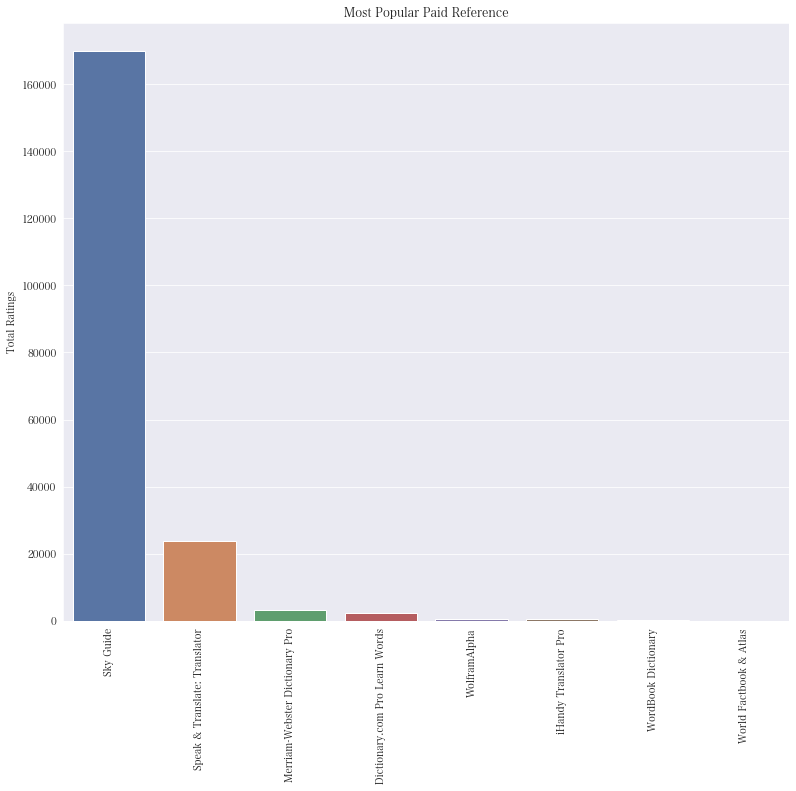

In [120]:
#top paid Reference
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_reference_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Reference')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [121]:
#top free Reference
top_free_reference_apps =df[(df["category"] ==        '                  Reference                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_reference_apps.head(10)





age_rating  app_rating                                     category  \
254          4         4.9                    Reference                   
237          1         4.8                    Reference                   
226          4         4.9                    Reference                   
228          4         4.9                    Reference                   
245          4         4.8                    Reference                   
244          4         4.7                    Reference                   
240          4         4.9                    Reference                   
248          4         4.6                    Reference                   
202          4         4.9                    Reference                   
236          4         4.9                    Reference                   

                                         compatibility  \
254  Requires iOS 11.0 and watchOS 2.0 or later. Co...   
237  Requires iOS 9.0 and watchOS 2.2 or later. Com...   
226  Requires iOS 8.0 or later. Compatible with iPh...   
228  Requires iOS 12.0 and watchOS 5.0 or later. Co...   
245  Requires iOS 12.0 or later. Compatible with iP...   
244  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
240  Requires iOS 8.0 or later. Compatible with iPh...   
248  Requires iOS 10.0 or later. Compatible with iP...   
202  Requires iOS 9.0 or later. Compatible with iPh...   
236  Requires iOS 12.0 or later. Compatible with iP...   

                                             languages  \
254  English, Afrikaans, Albanian, Arabic, Belarusi...   
237  English, Arabic, Azerbaijani, Bengali, Danish,...   
226                                            English   
228  English, Bulgarian, Chinese, Czech, Danish, Du...   
245               English, German, Portuguese, Spanish   
244  English, Arabic, Croatian, Czech, Danish, Dutc...   
240  English, Arabic, Dutch, French, Hebrew, Indone...   
248                                            English   
202                       English, Portuguese, Spanish   
236                           English, Korean, Spanish   

                               name  price  rank  rating_count   size  \
254                           Bible    0.0   2.0     4400000.0  139.7   
237  Muslim Pro: Azan, Quran, Qibla    0.0  22.0      253500.0  160.3   
226               Blue Letter Bible    0.0  34.0      175200.0   87.6   
228               FamilySearch Tree    0.0  26.0      164500.0  118.8   
245         Bible App by Olive Tree    0.0  52.0      130800.0  116.0   
244                       Night Sky    0.0  14.0      129500.0  983.7   
240         Bible.is - Audio Bibles    0.0  57.0      109300.0   46.2   
248        Whitepages People Search    0.0  33.0       98100.0   56.0   
202        #Bible: Verse of the Day    0.0   7.0       96600.0   12.7   
236        Daily Bible Inspirations    0.0  79.0       84200.0   46.2   

     num_languages  boolean_rank  free_or_not  
254             55          True         True  
237             22          True         True  
226              1          True         True  
228             26          True         True  
245              4          True         True  
244             31          True         True  
240             18          True         True  
248              1          True         True  
202              3          True         True  
236              3          True         True

Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1705 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1571 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 1705 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 1571 missing from current font.
  font.set_text(s, 0, flags=flags)


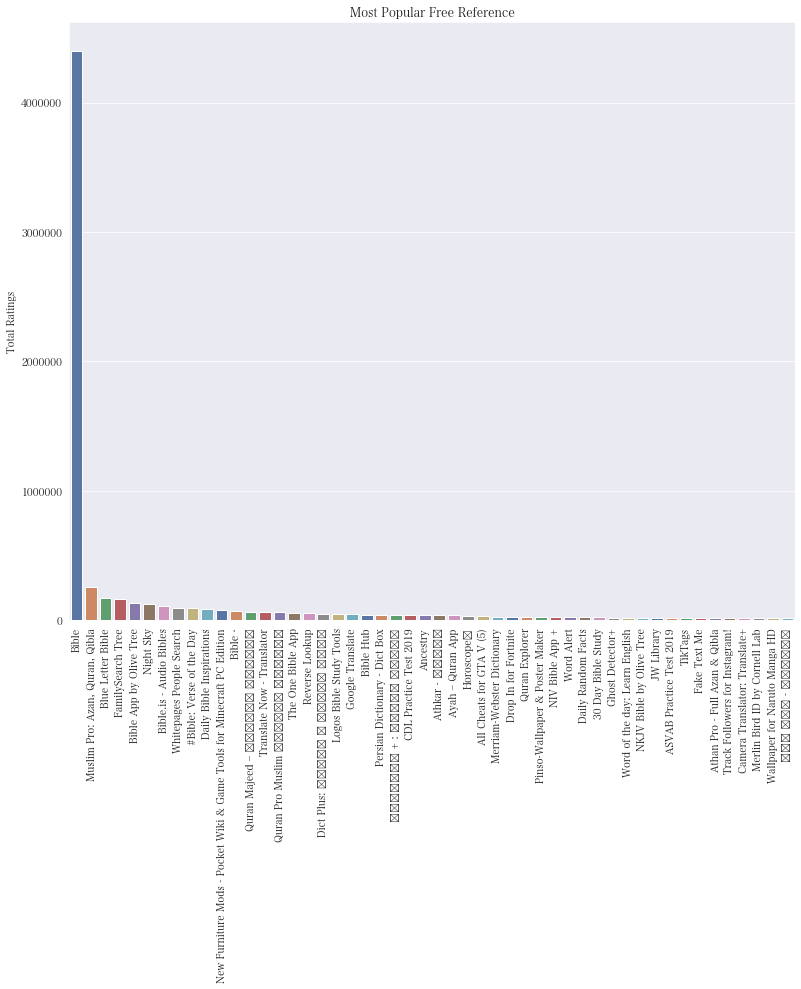

In [122]:
#top free Reference
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_reference_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Reference')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [123]:
#top paid Sports
top_paid_sports_apps =df[(df["category"] ==        '                  Sports                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_sports_apps.head(10)







age_rating  app_rating                                  category  \
4831          4         4.8                    Sports                   
4847          4         4.8                    Sports                   
4787          4         4.8                    Sports                   

                                          compatibility  \
4831  Requires iOS 10.0 and watchOS 2.0 or later. Co...   
4847  Requires iOS 11.4 and watchOS 4.3 or later. Co...   
4787  Requires iOS 10.0 or later. Compatible with iP...   

                                              languages  \
4831  English, Dutch, French, German, Italian, Japan...   
4847                                            English   
4787  English, French, Italian, Portuguese, Simplifi...   

                                name  price  rank  rating_count   size  \
4831    Golfshot Plus: Golf GPS + AR  49.99  80.0       10400.0  286.7   
4847    Coach's Eye - Video Analysis   4.99   4.0        5400.0  101.6   
4787  J23 - Release Dates & Restocks   1.99   2.0        3900.0    8.4   

      num_languages  boolean_rank  free_or_not  
4831             12          True        False  
4847              1          True        False  
4787              6          True        False

Text(0.5, 0, '')

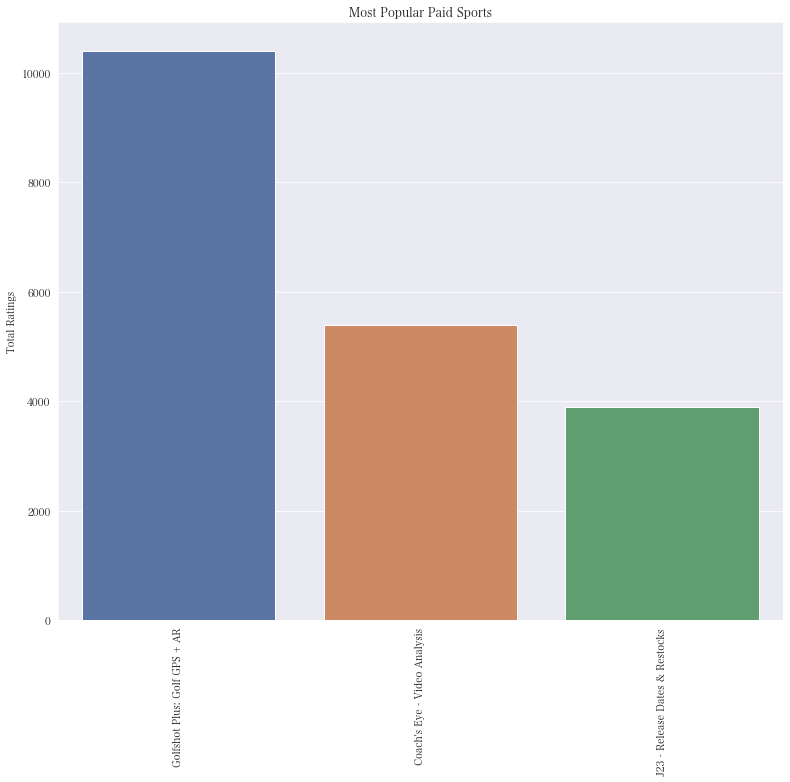

In [124]:
#top paid Sports
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_sports_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Sports')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [125]:
#top free Sports
top_free_sports_apps =df[(df["category"] ==        '                  Sports                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_sports_apps.head(10)




age_rating  app_rating                                  category  \
4998          1         4.7                    Sports                   
4977          4         4.8                    Sports                   
5000          4         4.6                    Sports                   
5001          4         4.4                    Sports                   
4986          1         4.8                    Sports                   
4997          4         4.7                    Sports                   
4995          4         4.8                    Sports                   
4984          1         4.9                    Sports                   
4985          4         4.6                    Sports                   
4989          1         4.7                    Sports                   

                                          compatibility  \
4998  Requires iOS 12.4 or later. Compatible with iP...   
4977  Requires iOS 11.0 or later. Compatible with iP...   
5000  Requires iOS 9.0 or later. Compatible with iPh...   
5001  Requires iOS 12.4 and watchOS 3.0 or later. Co...   
4986  Requires iOS 12.0 and watchOS 3.0 or later. Co...   
4997  Requires iOS 11.0 or later. Compatible with iP...   
4995  Requires iOS 12.0 and watchOS 5.0 or later. Co...   
4984  Requires iOS 11.0 and watchOS 3.0 or later. Co...   
4985  Requires iOS 10.0 or later. Compatible with iP...   
4989  Requires iOS 11.0 and watchOS 3.0 or later. Co...   

                                              languages  \
4998                                            English   
4977                                            English   
5000                                            English   
5001                       English, Portuguese, Spanish   
4986                                            English   
4997                                            English   
4995                                            English   
4984  English, Arabic, Danish, Dutch, French, German...   
4985                                            English   
4989                                            English   

                                name  price   rank  rating_count   size  \
4998             ESPN Fantasy Sports    0.0   47.0      875200.0   85.1   
4977   GameChanger Baseball Softball    0.0   88.0      479300.0  112.2   
5000                             NFL    0.0    1.0      385600.0   89.3   
5001      ESPN: Live Sports & Scores    0.0    3.0      364100.0  107.7   
4986  theScore: Sports News & Scores    0.0   17.0      340200.0  147.9   
4997    CBS Sports App Scores & News    0.0    4.0      337200.0  215.9   
4995         NCAA March Madness Live    0.0  136.0      288200.0  189.0   
4984     DraftKings Fantasy Football    0.0   18.0      282100.0  320.6   
4985            NFL Fantasy Football    0.0   28.0      229500.0   94.4   
4989    Bleacher Report: Sports News    0.0   20.0      218800.0  105.5   

      num_languages  boolean_rank  free_or_not  
4998              1          True         True  
4977              1          True         True  
5000              1          True         True  
5001              3          True         True  
4986              1          True         True  
4997              1          True         True  
4995              1          True         True  
4984             18          True         True  
4985              1          True         True  
4989              1          True         True

Text(0.5, 0, '')

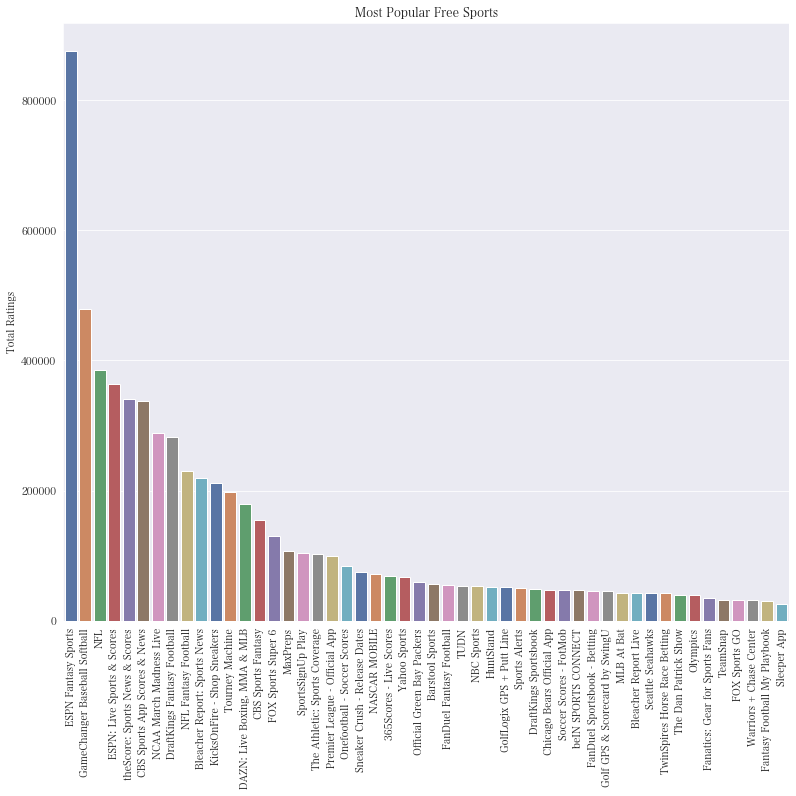

In [126]:
#top free Sports
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_sports_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Sports')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [127]:
#top paid Utilities
top_paid_utilities_apps =df[(df["category"] ==        '                  Utilities                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_utilities_apps.head(10)








age_rating  app_rating                                     category  \
4360          4         4.8                    Utilities                   
4426          4         3.4                    Utilities                   

                                          compatibility  \
4360  Requires iOS 8.0 or later. Compatible with iPh...   
4426  Requires iOS 6.0 or later. Compatible with iPh...   

                        languages             name  price   rank  \
4360                      English     Flashlight ®   1.99  159.0   
4426  English, Simplified Chinese  Alarm Clock Pro   0.99    NaN   

      rating_count  size  num_languages  boolean_rank  free_or_not  
4360       16300.0   8.1              1          True        False  
4426         706.0  40.2              2         False        False

Text(0.5, 0, '')

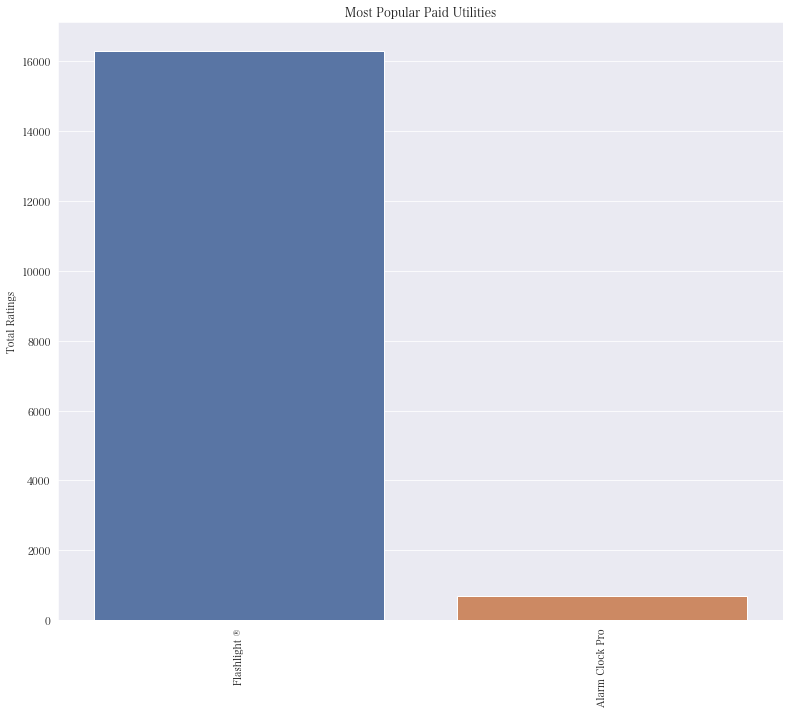

In [128]:
#top paid Utilities
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_utilities_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Utilities')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [129]:
#top free Utilities
top_free_utilities_apps =df[(df["category"] ==        '                  Utilities                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_utilities_apps.head(10)





age_rating  app_rating                                     category  \
4523          4         4.6                    Utilities                   
4519          4         4.3                    Utilities                   
4510          4         4.8                    Utilities                   
4503          4         4.5                    Utilities                   
4518          4         4.6                    Utilities                   
4466          4         4.7                    Utilities                   
4459          4         4.5                    Utilities                   
4515          1         4.7                    Utilities                   
4477          4         4.6                    Utilities                   
4487          4         4.7                    Utilities                   

                                          compatibility  \
4523  Requires iOS 11.0 or later. Compatible with iP...   
4519  Requires iOS 11.4 or later. Compatible with iP...   
4510  Requires iOS 11.3 or later. Compatible with iP...   
4503  Requires iOS 12.0 or later. Compatible with iP...   
4518  Requires iOS 9.0 and watchOS 3.0 or later. Com...   
4466  Requires iOS 12.0 or later. Compatible with iP...   
4459  Requires iOS 10.3 or later. Compatible with iP...   
4515  Requires iOS 9.0 or later. Compatible with iPh...   
4477  Requires iOS 9.0 or later. Compatible with iPh...   
4487  Requires iOS 8.0 or later. Compatible with iPh...   

                                              languages  \
4523                                   English, Spanish   
4519                                   English, Spanish   
4510                                   English, Spanish   
4503                                   English, Spanish   
4518  English, Danish, Dutch, Finnish, French, Germa...   
4466                                                nan   
4459                                            English   
4515  English, Arabic, Danish, Dutch, Filipino, Finn...   
4477  English, Arabic, Catalan, Croatian, Czech, Dan...   
4487  English, Arabic, Catalan, Chinese (Hong Kong),...   

                            name  price   rank  rating_count   size  \
4523                  My Verizon    0.0    6.0     2600000.0  117.3   
4519                      myAT&T    0.0   10.0     2000000.0  157.0   
4510                    T-Mobile    0.0   19.0     1900000.0   75.9   
4503            My Sprint Mobile    0.0   30.0      913100.0  167.0   
4518              The Calculator    0.0   98.0      768600.0  151.1   
4466                 My Spectrum    0.0   24.0      517500.0  134.9   
4459           AT&T Call Protect    0.0  189.0      478700.0   53.4   
4515                GIF Keyboard    0.0   32.0      453500.0   77.9   
4477  Free VPN by Free VPN .org™    0.0   97.0      281000.0   78.3   
4487                  TestFlight    0.0   44.0      261200.0   36.0   

      num_languages  boolean_rank  free_or_not  
4523              2          True         True  
4519              2          True         True  
4510              2          True         True  
4503              2          True         True  
4518             22          True         True  
4466              0          True         True  
4459              1          True         True  
4515             23          True         True  
4477             32          True         True  
4487             34          True         True

Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 1573 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 1573 missing from current font.
  font.set_text(s, 0, flags=flags)


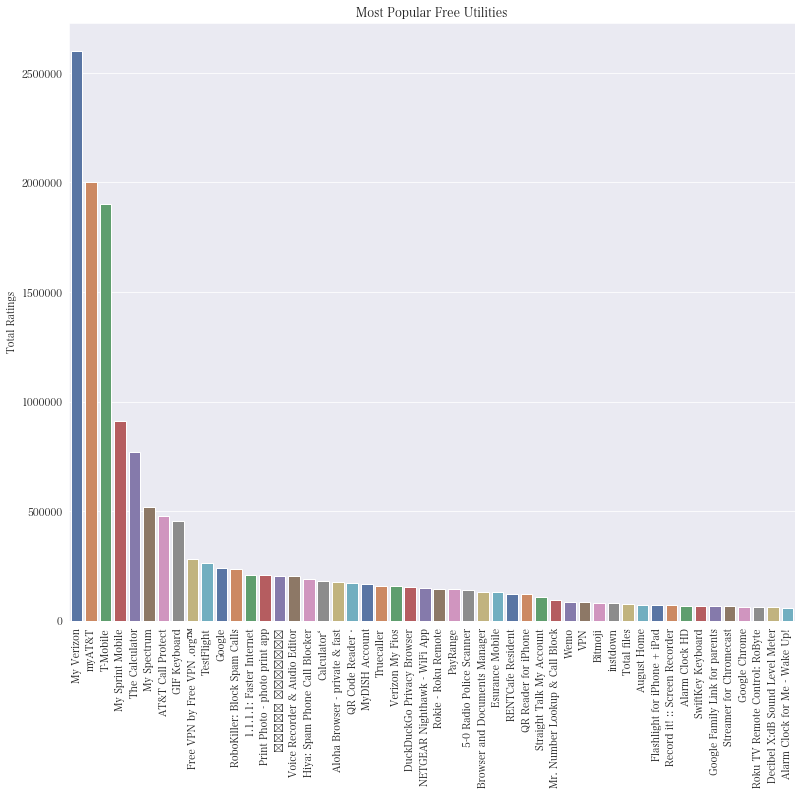

In [130]:
#top free Utilities
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_utilities_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Utilities')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [131]:
#top paid Weather
top_paid_weather_apps =df[(df["category"] ==        '                  Weather                ') & (df["price"]!=0)].sort_values(by='rating_count',ascending =False)
top_paid_weather_apps.head(10)









age_rating  app_rating                                   category  \
4261          4         4.7                    Weather                   
4276          4         4.4                    Weather                   
4258          4         4.7                    Weather                   
4255          4         4.7                    Weather                   
4185          4         4.8                    Weather                   
4235          4         4.8                    Weather                   
4218          1         4.7                    Weather                   
4266          4         4.6                    Weather                   
4269          4         4.8                    Weather                   
4252          4         4.6                    Weather                   

                                          compatibility  \
4261  Requires iOS 8.0 and watchOS 3.0 or later. Com...   
4276  Requires iOS 10.3 and watchOS 3.2 or later. Co...   
4258  Requires iOS 10.0 or later. Compatible with iP...   
4255  Requires iOS 9.0 and watchOS 2.0 or later. Com...   
4185  Requires iOS 9.0 or later. Compatible with iPh...   
4235  Requires iOS 11.0 and watchOS 5.0 or later. Co...   
4218  Requires iOS 12.0 and watchOS 4.0 or later. Co...   
4266  Requires iOS 9.0 and watchOS 3.0 or later. Com...   
4269  Requires iOS 10.0 or later. Compatible with iP...   
4252  Requires iOS 9.0 or later. Compatible with iPh...   

                                              languages  \
4261  English, Danish, French, German, Indonesian, I...   
4276                                            English   
4258                                   English, Spanish   
4255  English, French, German, Japanese, Portuguese,...   
4185                                            English   
4235  English, Dutch, French, German, Italian, Japan...   
4218                                            English   
4266  English, Dutch, French, German, Italian, Japan...   
4269  English, French, German, Italian, Japanese, Ko...   
4252  English, Arabic, Chinese, Dutch, French, Germa...   

                                name  price   rank  rating_count   size  \
4261  NOAA Radar Pro: Weather Alerts   4.99    9.0       77400.0   96.2   
4276                Dark Sky Weather   3.99    1.0       42100.0   62.1   
4258           NOAA Hi-Def Radar Pro   1.99    8.0       38500.0   42.4   
4255                WeatherBug Elite  19.99   16.0       25300.0  229.4   
4185               Hurricane Tracker   3.99  124.0       24100.0   25.6   
4235       MyRadar Weather Radar Pro   2.99    5.0       23800.0  201.0   
4218                  CARROT Weather   4.99    7.0       21500.0  152.8   
4266                        Weather+   3.99   51.0       19400.0  136.1   
4269  Living Earth - Clock & Weather   4.99   32.0       10400.0  177.9   
4252          Clear Day - Weather HD   3.99  123.0        6500.0  396.1   

      num_languages  boolean_rank  free_or_not  
4261             18          True        False  
4276              1          True        False  
4258              2          True        False  
4255              6          True        False  
4185              1          True        False  
4235              9          True        False  
4218              1          True        False  
4266             11          True        False  
4269             11          True        False  
4252             13          True        False

Text(0.5, 0, '')

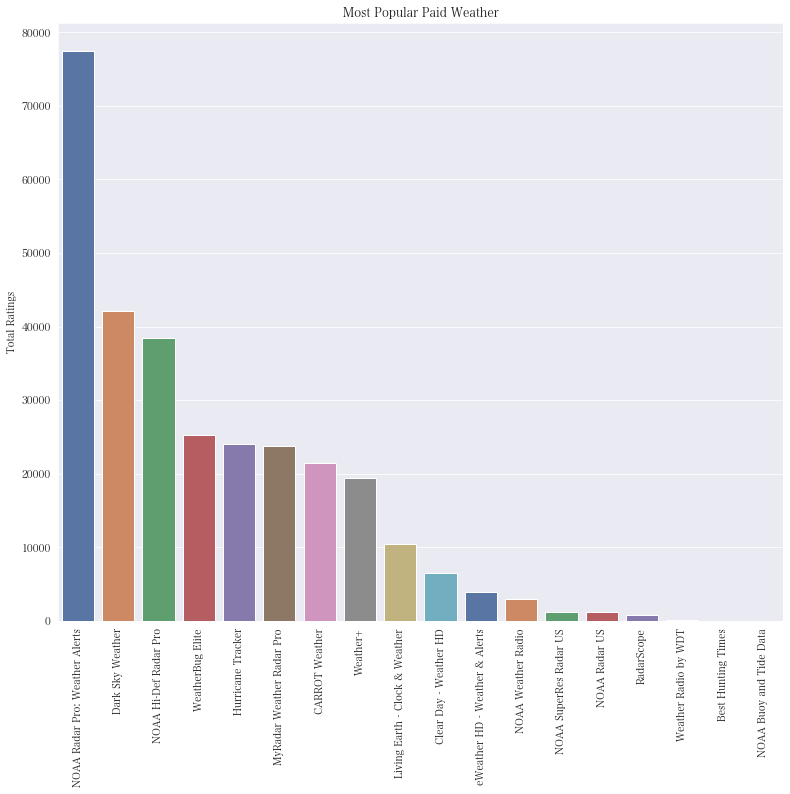

In [132]:
#top paid Weather
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_paid_weather_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Paid Weather')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [133]:
#top free Weather
top_free_weather_apps =df[(df["category"] ==        '                  Weather                ') & (df["price"]==0)].sort_values(by='rating_count',ascending =False)
top_free_weather_apps.head(10)






age_rating  app_rating                                   category  \
4287          4         4.7                    Weather                   
4289          4         4.6                    Weather                   
4286          4         4.7                    Weather                   
4288          4         4.8                    Weather                   
4285          4         4.4                    Weather                   
4281          4         4.6                    Weather                   
4275          4         4.5                    Weather                   
4277          4         4.6                    Weather                   
4282          4         4.6                    Weather                   
4273          4         4.6                    Weather                   

                                          compatibility  \
4287  Requires iOS 11.0 and watchOS 4.3 or later. Co...   
4289  Requires iOS 12.0 and watchOS 4.0 or later. Co...   
4286  Requires iOS 9.0 and watchOS 2.0 or later. Com...   
4288  Requires iOS 11.0 and watchOS 5.0 or later. Co...   
4285  Requires iOS 11.0 and watchOS 4.0 or later. Co...   
4281  Requires iOS 10.0 and watchOS 3.0 or later. Co...   
4275  Requires iOS 9.0 or later. Compatible with iPh...   
4277  Requires iOS 9.0 or later. Compatible with iPh...   
4282  Requires iOS 9.0 and watchOS 3.0 or later. Com...   
4273  Requires iOS 10.0 or later. Compatible with iP...   

                                              languages  \
4287  English, Arabic, Azerbaijani, Bulgarian, Catal...   
4289  English, Arabic, Catalan, Croatian, Czech, Dan...   
4286  English, French, German, Japanese, Portuguese,...   
4288  English, Dutch, French, German, Italian, Japan...   
4285  English, Danish, French, German, Indonesian, I...   
4281  English, Danish, Dutch, French, German, Indone...   
4275  English, Dutch, French, German, Italian, Japan...   
4277  English, Danish, Dutch, Finnish, French, Germa...   
4282  English, Dutch, French, German, Italian, Japan...   
4273  English, Dutch, French, German, Italian, Japan...   

                               name  price   rank  rating_count   size  \
4287   AccuWeather: Weather Tracker    0.0    8.0     1300000.0  223.0   
4289  Weather - The Weather Channel    0.0    1.0     1000000.0  258.3   
4286  WeatherBug – Weather Forecast    0.0   10.0      716400.0  245.2   
4288          MyRadar Weather Radar    0.0    3.0      536600.0  201.2   
4285        NOAA Weather Radar Live    0.0    2.0      528200.0  233.9   
4281                  Weather Live°    0.0   21.0      186700.0  152.9   
4275                      Weather ٞ    0.0   35.0      130900.0   72.3   
4277                Weather Radar ٞ    0.0   24.0      124700.0   89.7   
4282                       Weather⁺    0.0  137.0       82600.0  158.1   
4273                      Weather ·    0.0   30.0       52500.0  124.0   

      num_languages  boolean_rank  free_or_not  
4287             44          True         True  
4289             33          True         True  
4286              6          True         True  
4288              9          True         True  
4285             18          True         True  
4281             20          True         True  
4275             13          True         True  
4277             14          True         True  
4282             11          True         True  
4273             12          True         True

Text(0.5, 0, '')

/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8314 missing from current font.
  font.set_text(s, 0, flags=flags)


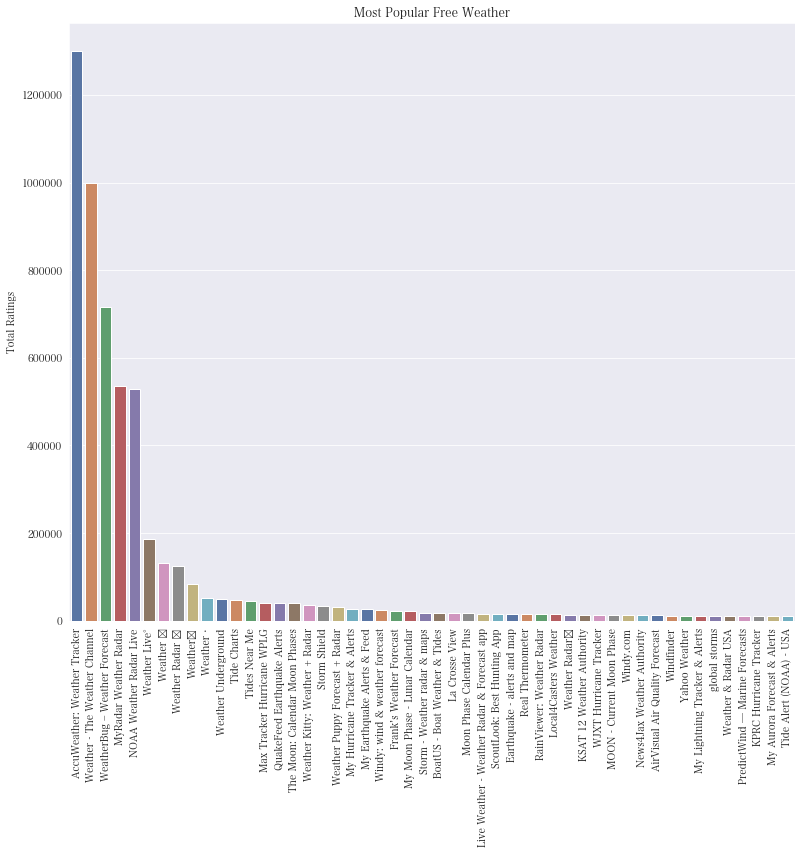

In [134]:
#top free Weather
fig, ax = pyplot.subplots(figsize=a2_dims)
plot=sns.barplot(data =top_free_weather_apps.head(50), x ='name',y ='rating_count',palette='deep')
plot=sns.set_style("ticks", {"xtick.major.size": 11})
plot=sns.set_style("darkgrid",{"font.sans-serif":['Hiragino Mincho ProN', 'Arial']})
plot=plt.xticks(rotation=90)
ax.set_title('Most Popular Free Weather')
ax.set_ylabel('Total Ratings')
ax.set_xlabel( '')

In [135]:
df[df['price']!=0].groupby('price').agg({'rating_count':'mean'}).sort_values(by='rating_count',ascending =False).reset_index()

price  rating_count
0    6.99  94166.666667
1    5.99  50247.000000
2    8.99  47900.000000
3   14.99  33153.666667
4   19.99  24500.000000
5    2.99  21239.714286
6    3.99  19816.863636
7    4.99  10801.071429
8    9.99  10762.400000
9   49.99  10400.000000
10  24.99   8100.000000
11   0.99   6407.333333
12   1.99   4460.555556
13   7.99    509.500000
14  16.99     69.000000

Text(0.5, 1.0, 'Average No. Ratings in Paid Apps')

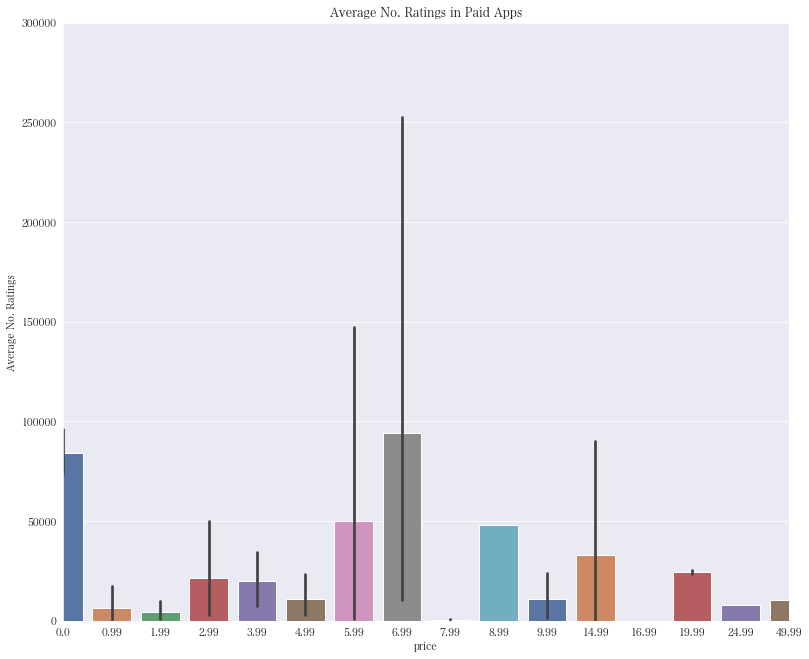

In [146]:

a2_dims = (13, 11)
fig, ax = pyplot.subplots(figsize=a2_dims)
sns.barplot(x='price',y='rating_count',data=df,palette='deep')
plt.xlim(0,15) 
plt.ylim(0,300000)
plt.ylabel("Average No. Ratings")
plt.title("Average No. Ratings in Paid Apps")

In [147]:

df[df['price']== '0'].groupby('price').agg({'rating_count':'mean'})

Empty DataFrame
Columns: [rating_count]
Index: []